## PFA HOUSING PROJECT

Problem statement:- Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not

In [789]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [790]:
df = pd.read_csv(r"C:\Users\HP\Desktop\train.csv",engine='python')

In [791]:
df1 = pd.read_csv(r"C:\Users\HP\Desktop\test.csv",engine='python')

In [792]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [793]:
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [794]:
df.shape

(1168, 81)

In [795]:
df1.shape

(292, 80)

__The train dataset has 1168 rows and 81 columns. 2. The test dataset has 292 rows and 80 columns__

In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [797]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [798]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [799]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 18
Missing values in the dataset : 
  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0          NaN   NaN       None         0.0       Gd       TA           No   
1         95.0   NaN       None         0.0       TA       Gd           Gd   
2         92.0   NaN       None         0.0       Gd       TA           Av   
3        105.0   NaN    BrkFace       480.0       Gd       TA           No   
4          NaN   NaN      Stone       126.0       Gd       TA           No   

  BsmtFinType1 BsmtFinType2 FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0          ALQ          Unf          TA     Attchd       1977.0          RFn   
1          ALQ          Rec          TA     Attchd       1970.0          Unf   
2          GLQ          Unf          TA     Attchd       1997.0          Unf   
3          BLQ          Unf          TA     Attchd       1977.0          RFn   
4          ALQ          Unf          TA     Attchd       1977.0          Fin   

  GarageQual GarageCond PoolQC  Fence MiscFeature  
0         TA         TA    NaN    NaN         NaN  
1         TA         TA    NaN    NaN         NaN  
2         TA         TA    NaN    NaN         NaN  
3         TA         TA    NaN  MnPrv         NaN  
4         TA         TA    NaN    NaN         NaN

In [800]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

LotFrontage 18.3219 % Missing Values
Alley 93.4075 % Missing Values
MasVnrType 0.5993 % Missing Values
MasVnrArea 0.5993 % Missing Values
BsmtQual 2.5685 % Missing Values
BsmtCond 2.5685 % Missing Values
BsmtExposure 2.6541 % Missing Values
BsmtFinType1 2.5685 % Missing Values
BsmtFinType2 2.6541 % Missing Values
FireplaceQu 47.1747 % Missing Values
GarageType 5.4795 % Missing Values
GarageYrBlt 5.4795 % Missing Values
GarageFinish 5.4795 % Missing Values
GarageQual 5.4795 % Missing Values
GarageCond 5.4795 % Missing Values
PoolQC 99.4007 % Missing Values
Fence 79.7089 % Missing Values
MiscFeature 96.2329 % Missing Values


In [801]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

__Feature engineering__

In [802]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

__LETS GO WITH SINGLE VARIATE ANALYSIS__

__ID__

In [803]:
df.Id.value_counts()

1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64

its just a id column , it wont help during model building so let us drop this column id

In [804]:
df.drop(['Id'],axis=1,inplace=True)
df1.drop(['Id'],axis=1,inplace=True)


In [805]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

__MSSubClass__

In [806]:
df.MSSubClass.value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

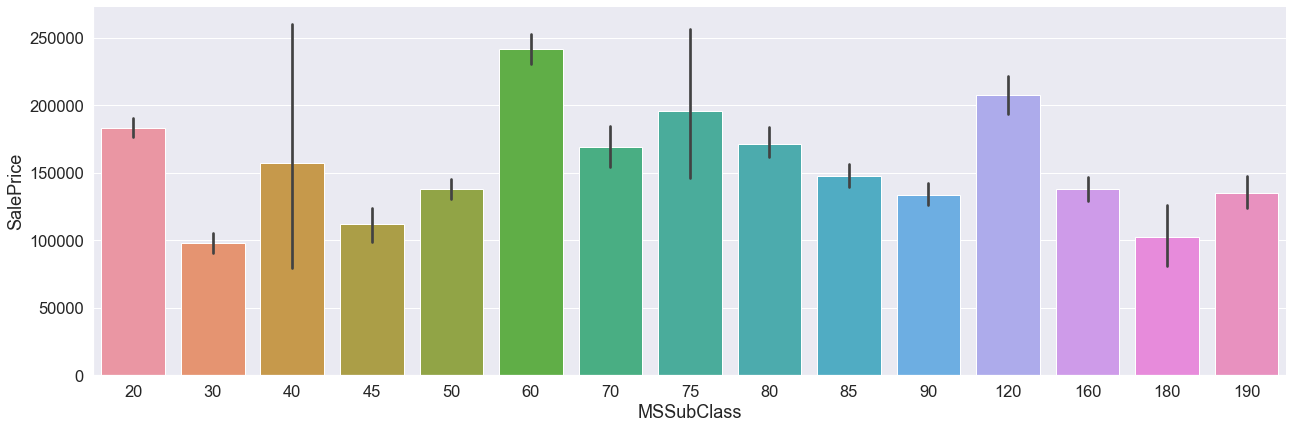

In [807]:
sns.catplot(y='SalePrice',x='MSSubClass',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '20'),
  Text(1, 0, '30'),
  Text(2, 0, '40'),
  Text(3, 0, '45'),
  Text(4, 0, '50'),
  Text(5, 0, '60'),
  Text(6, 0, '70'),
  Text(7, 0, '75'),
  Text(8, 0, '80'),
  Text(9, 0, '85'),
  Text(10, 0, '90'),
  Text(11, 0, '120'),
  Text(12, 0, '160'),
  Text(13, 0, '180'),
  Text(14, 0, '190')])

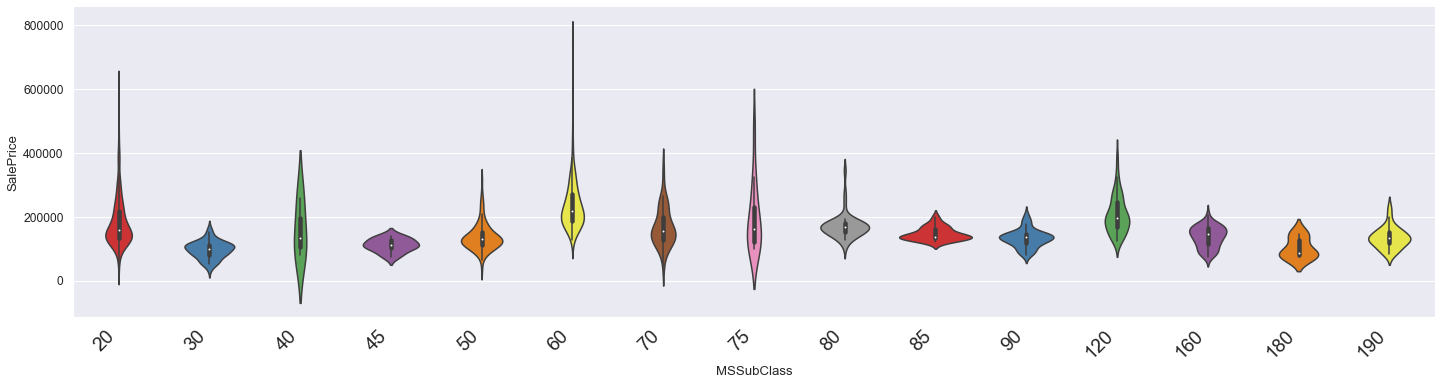

In [808]:
sns.set(font_scale=1.1)
sns.catplot(x='MSSubClass',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

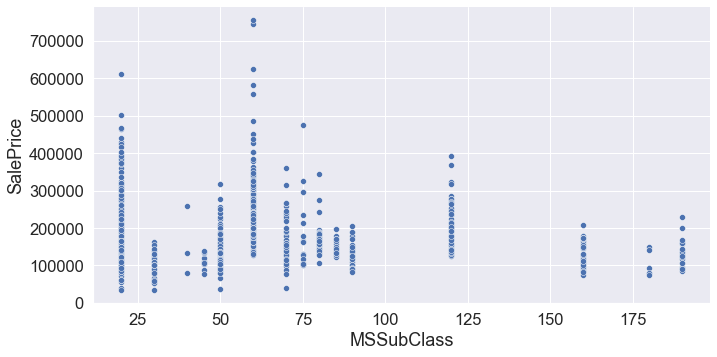

In [809]:
sns.set(font_scale=1.5)
sns.relplot(x='MSSubClass',y='SalePrice',data=df,aspect=2,palette='Set1')

graph shows that maximum count and also the sale price is maximum in ms subclasses below 75 that is 

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES

__MSZoning__

In [810]:
df.MSZoning.value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

MSZoning: Identifies the general zoning classification of the sale.
		
      
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

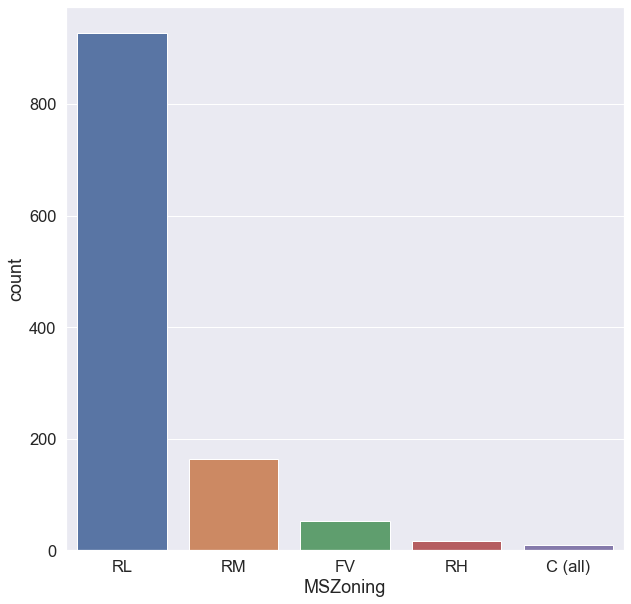

In [811]:
plt.figure(figsize=(10,10))
sns.countplot(df.MSZoning)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'FV'),
  Text(3, 0, 'RH'),
  Text(4, 0, 'C (all)')])

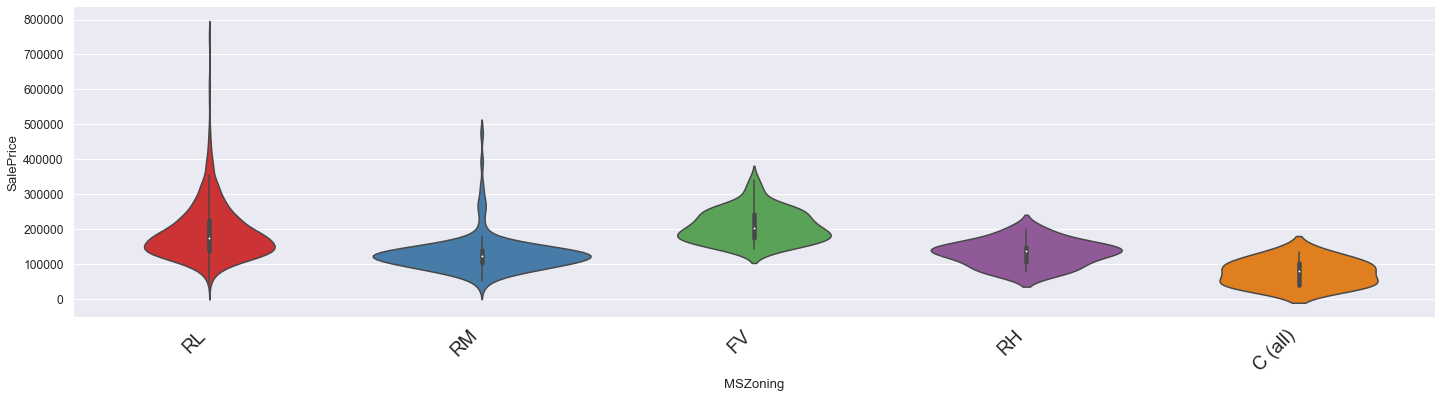

In [812]:
sns.set(font_scale=1.1)
sns.catplot(x='MSZoning',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

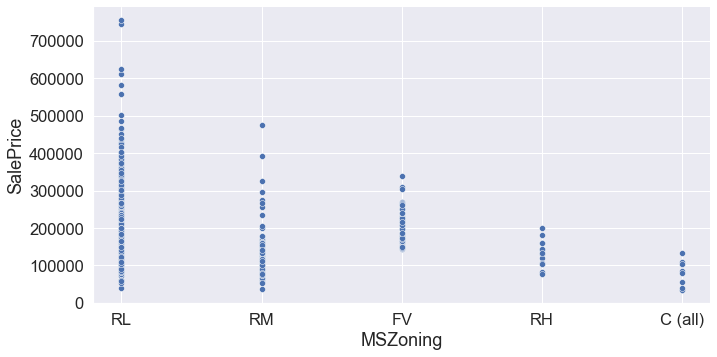

In [813]:
sns.set(font_scale=1.5)
sns.relplot(x='MSZoning',y='SalePrice',data=df,aspect=2,palette='Set1')

FV is between 100000-40000 range of sale price only, where as others have very less sale price but residential low density have maximum count and also range of sale price meaning maximum people live in residential society.

__LotFrontage__

__LotFrontage: Linear feet of street connected to property__

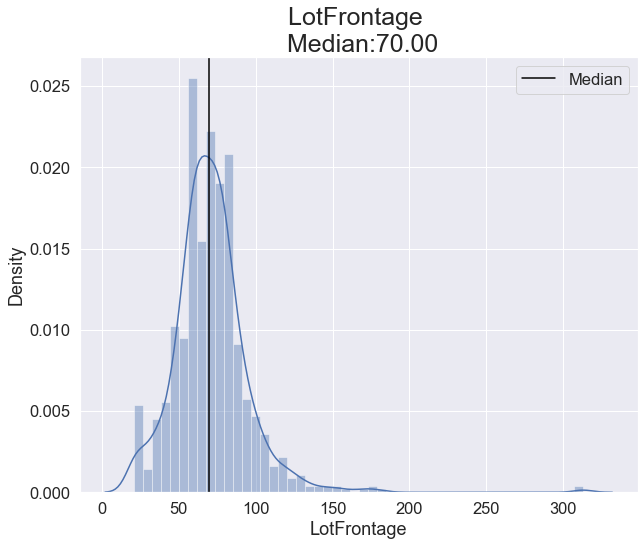

In [814]:
plt.figure(figsize=(10,8))
sns.distplot(df['LotFrontage'])
plt.title('LotFrontage \n Median:{0:.2f}'.format(df['LotFrontage'].median()),size=25)
plt.axvline(df["LotFrontage"].median(),color='black',label='Median')
plt.legend()

<AxesSubplot:xlabel='LotFrontage'>

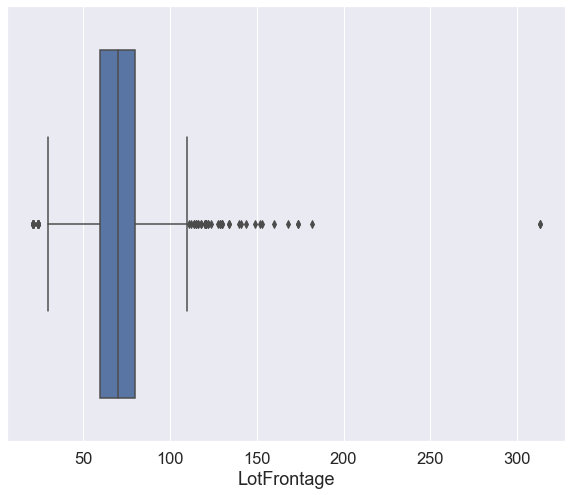

In [815]:
plt.figure(figsize=(10,8))
sns.boxplot(df["LotFrontage"])


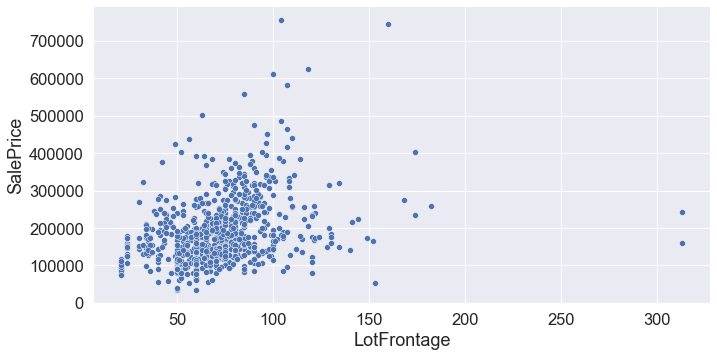

In [816]:
sns.set(font_scale=1.5)
sns.relplot(x='LotFrontage',y='SalePrice',data=df,aspect=2,palette='Set1')

In [817]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [818]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 17
Missing values in the dataset : 
  ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0   NaN       None         0.0       Gd       TA           No          ALQ   
1   NaN       None         0.0       TA       Gd           Gd          ALQ   
2   NaN       None         0.0       Gd       TA           Av          GLQ   
3   NaN    BrkFace       480.0       Gd       TA           No          BLQ   
4   NaN      Stone       126.0       Gd       TA           No          ALQ   

  BsmtFinType2 FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual  \
0          Unf          TA     Attchd       1977.0          RFn         TA   
1          Rec          TA     Attchd       1970.0          Unf         TA   
2          Unf          TA     Attchd       1997.0          Unf         TA   
3          Unf          TA     Attchd       1977.0          RFn         TA   
4          Unf          TA     Attchd       1977.0          Fin         TA   

  GarageCond PoolQC  Fence MiscFeature  
0         TA    NaN    NaN         NaN  
1         TA    NaN    NaN         NaN  
2         TA    NaN    NaN         NaN  
3         TA    NaN  MnPrv         NaN  
4         TA    NaN    NaN         NaN

In [819]:
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)

In [820]:
## lets handle Categorical features which are missing
features_nan_test=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes=='O']

for feature in features_nan_test:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean()*100,4)))

Alley: 95.2055% missing values
BsmtQual: 2.3973% missing values
BsmtCond: 2.3973% missing values
BsmtExposure: 2.3973% missing values
BsmtFinType1: 2.3973% missing values
BsmtFinType2: 2.3973% missing values
FireplaceQu: 47.6027% missing values
GarageType: 5.8219% missing values
GarageFinish: 5.8219% missing values
GarageQual: 5.8219% missing values
GarageCond: 5.8219% missing values
Fence: 84.9315% missing values
MiscFeature: 96.5753% missing values


__the linear feet connected to properties is between 50-90 feet ,having median value 70 feet, but do have outliers as well,so overall, having average linear feet is almost propotional to average sale price from scattel plot__

In [821]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

__LotArea__

LotArea: Lot size in square feet

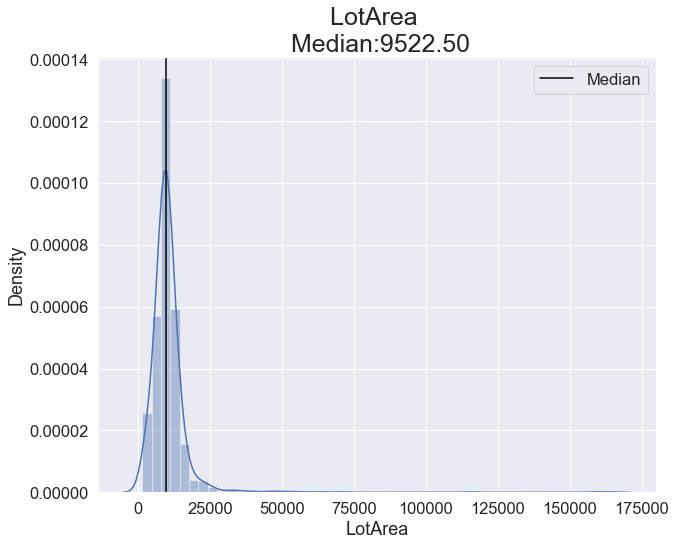

In [822]:
plt.figure(figsize=(10,8))
sns.distplot(df['LotArea'])
plt.title('LotArea \n Median:{0:.2f}'.format(df['LotArea'].median()),size=25)
plt.axvline(df["LotArea"].median(),color='black',label='Median')
plt.legend()

<AxesSubplot:xlabel='LotArea'>

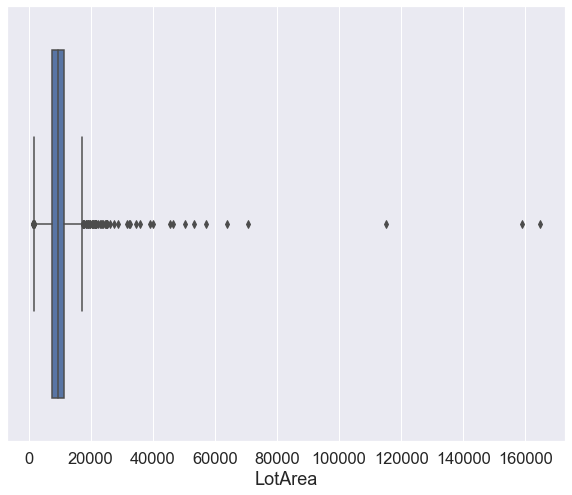

In [823]:
plt.figure(figsize=(10,8))
sns.boxplot(df["LotArea"])


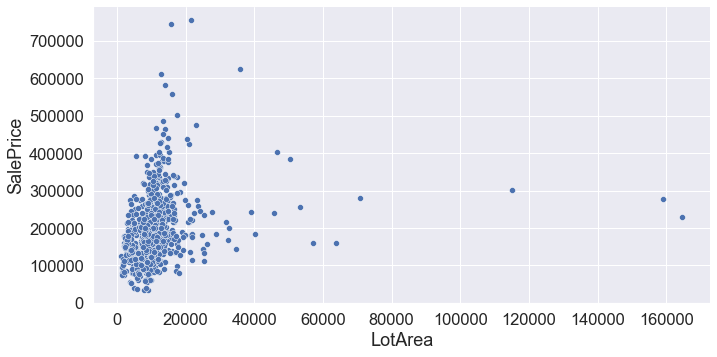

In [824]:
sns.set(font_scale=1.5)
sns.relplot(x='LotArea',y='SalePrice',data=df,aspect=2,palette='Set1')

__mostly lot area is between 0-20000 sq feet only for more that 95% records, with median of almost 10000 sq feet.__

__Street__

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

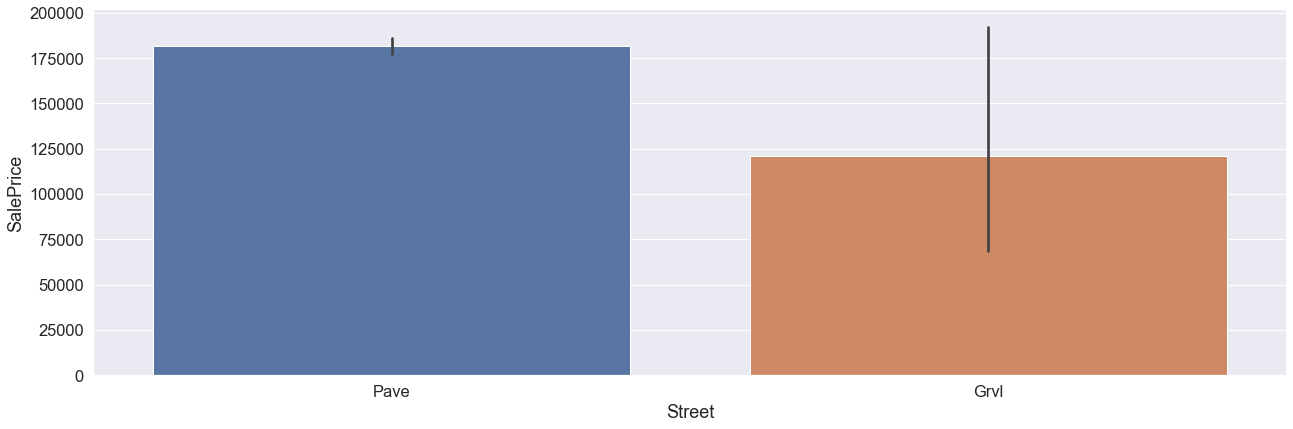

In [825]:
sns.catplot(y='SalePrice',x='Street',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Street', ylabel='count'>

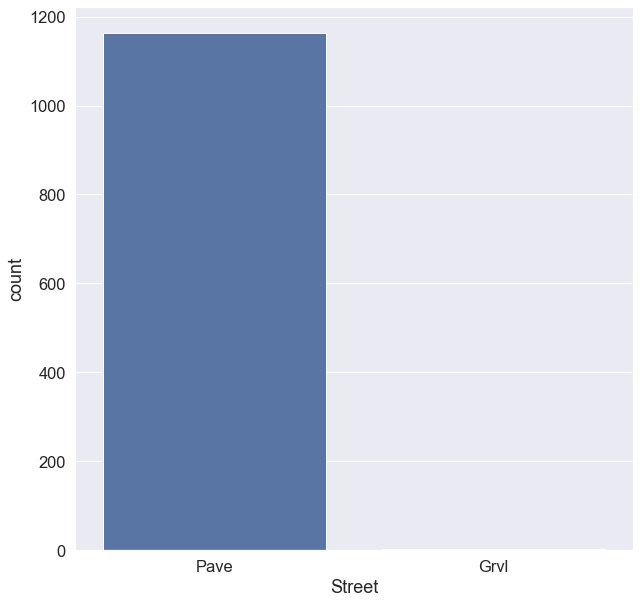

In [826]:
plt.figure(figsize=(10,10))
sns.countplot(df.Street)

(array([0, 1]), [Text(0, 0, 'Pave'), Text(1, 0, 'Grvl')])

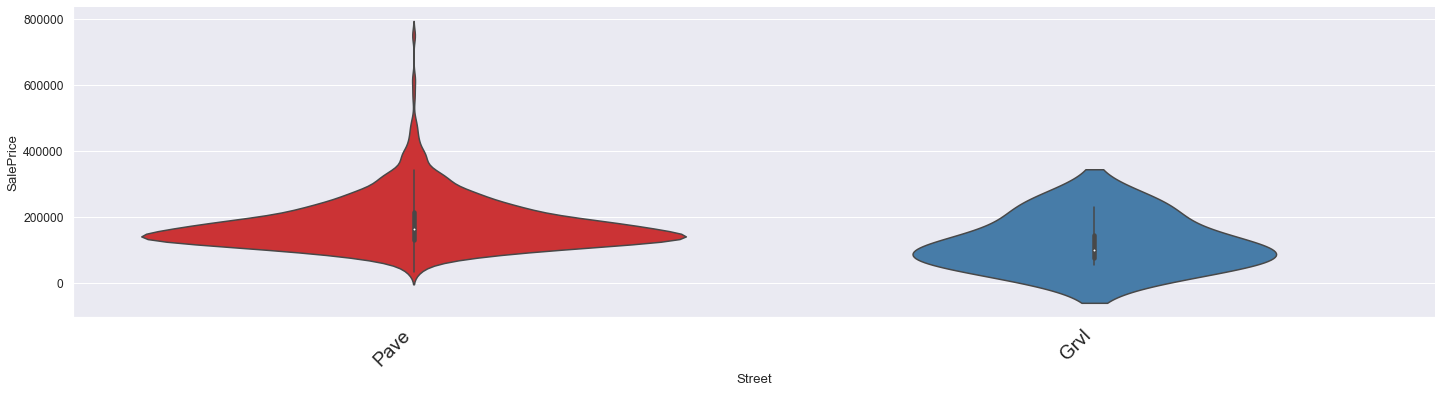

In [827]:
sns.set(font_scale=1.1)
sns.catplot(x='Street',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

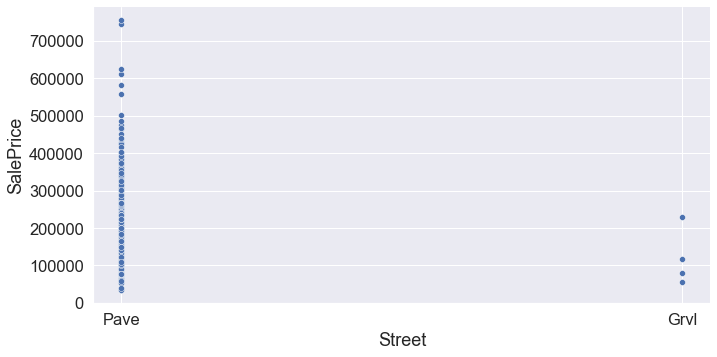

In [828]:
sns.set(font_scale=1.5)
sns.relplot(x='Street',y='SalePrice',data=df,aspect=2,palette='Set1')

In [829]:
countpave= len(df[df.Street == 'Pave'])
print("Percentage of pave: {:.2f}%".format((countpave / (len(df.Street))*100)))
countgrvl = len(df[df.Street == 'Grvl'])
print("Percentage of gravel: {:.2f}%".format((countgrvl / (len(df.Street))*100)))

Percentage of pave: 99.66%
Percentage of gravel: 0.34%


__mostly everyone prefer type of road  to be PAVED__

__Alley__

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [830]:
df.Alley.value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

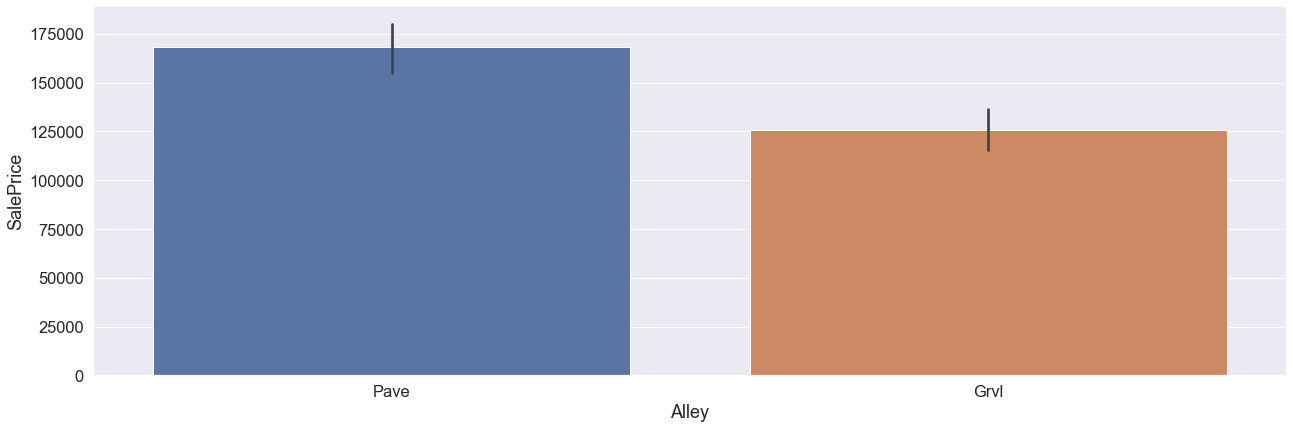

In [831]:
sns.catplot(y='SalePrice',x='Alley',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Alley', ylabel='count'>

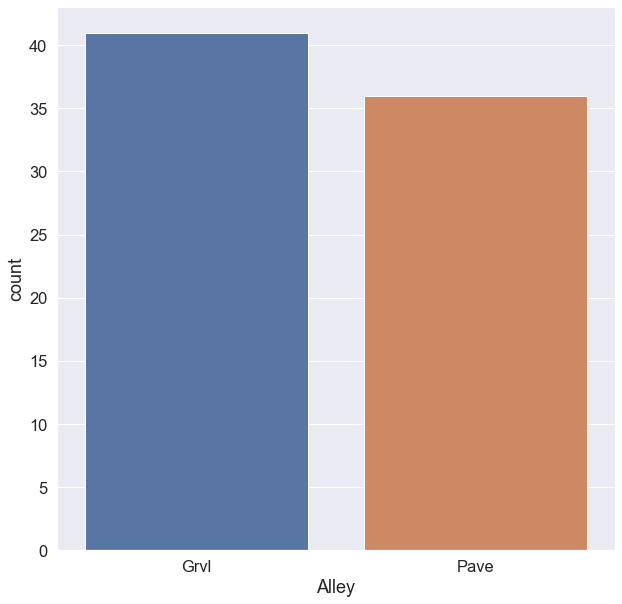

In [832]:
plt.figure(figsize=(10,10))
sns.countplot(df.Alley)

(array([0, 1]), [Text(0, 0, 'Grvl'), Text(1, 0, 'Pave')])

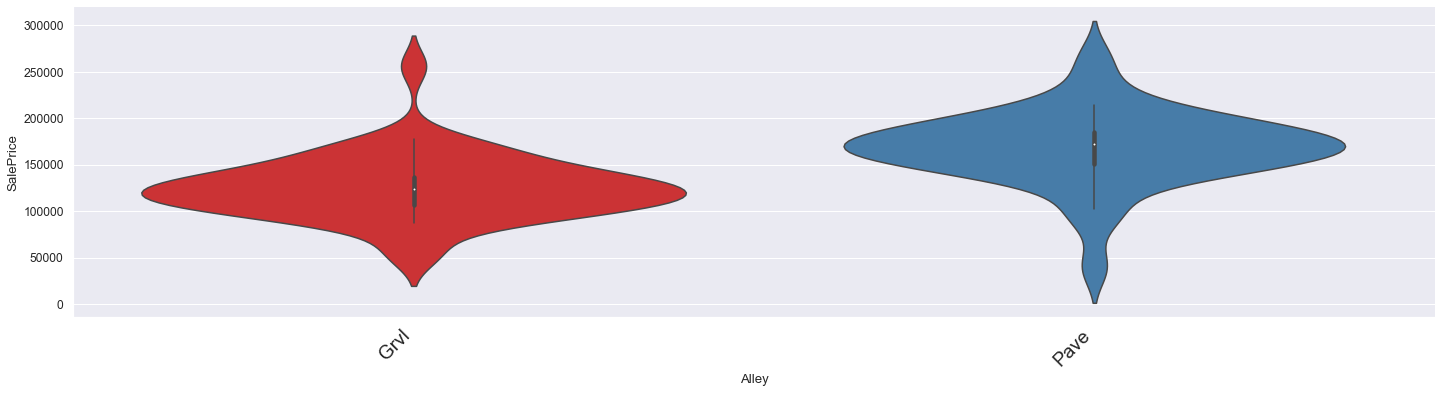

In [833]:
sns.set(font_scale=1.1)
sns.catplot(x='Alley',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

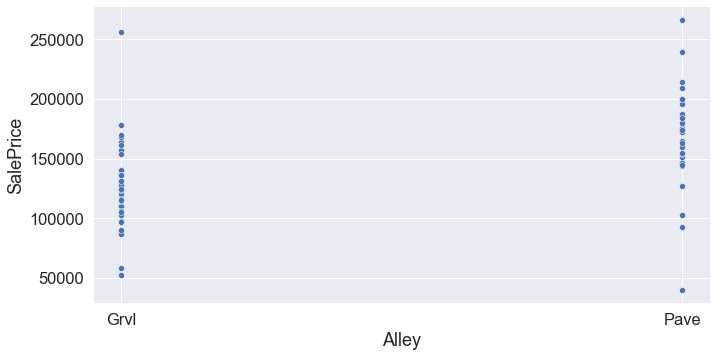

In [834]:
sns.set(font_scale=1.5)
sns.relplot(x='Alley',y='SalePrice',data=df,aspect=2,palette='Set1')


In [835]:
countpave= len(df[df.Alley == 'Pave'])
print("Percentage of pave: {:.2f}%".format((countpave / (len(df.Alley))*100)))
countgrvl = len(df[df.Alley == 'Grvl'])
print("Percentage of gravel: {:.2f}%".format((countgrvl / (len(df.Alley))*100)))

Percentage of pave: 3.08%
Percentage of gravel: 3.51%


In [836]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

Alley 93.4075 % Missing Values
MasVnrType 0.5993 % Missing Values
MasVnrArea 0.5993 % Missing Values
BsmtQual 2.5685 % Missing Values
BsmtCond 2.5685 % Missing Values
BsmtExposure 2.6541 % Missing Values
BsmtFinType1 2.5685 % Missing Values
BsmtFinType2 2.6541 % Missing Values
FireplaceQu 47.1747 % Missing Values
GarageType 5.4795 % Missing Values
GarageYrBlt 5.4795 % Missing Values
GarageFinish 5.4795 % Missing Values
GarageQual 5.4795 % Missing Values
GarageCond 5.4795 % Missing Values
PoolQC 99.4007 % Missing Values
Fence 79.7089 % Missing Values
MiscFeature 96.2329 % Missing Values


as 96% data is missing so let us drop the column.

In [837]:
df.drop(['Alley'],axis=1,inplace=True)

In [838]:
df1.drop(['Alley'],axis=1,inplace=True)

In [839]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

__LotShape__

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [840]:
df.LotShape.value_counts()


Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

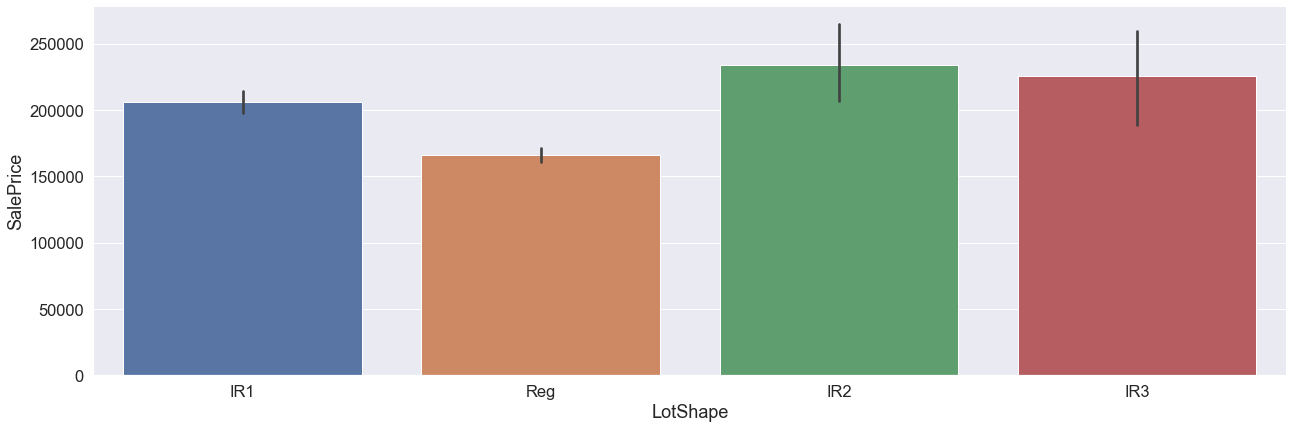

In [841]:
sns.catplot(y='SalePrice',x='LotShape',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='LotShape', ylabel='count'>

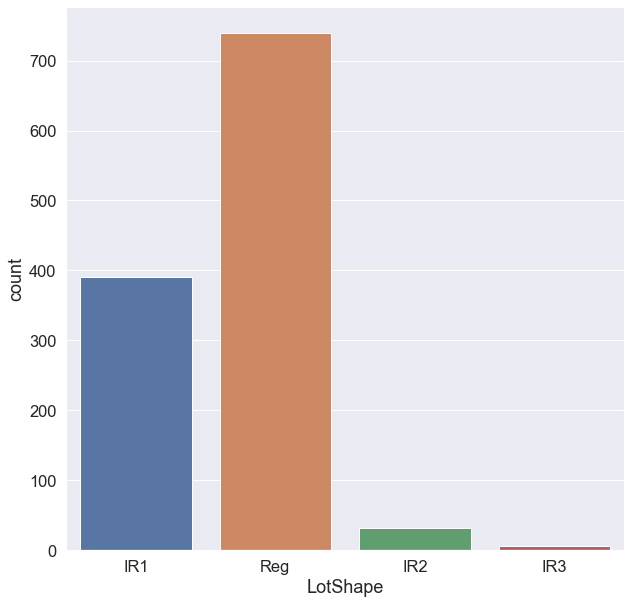

In [842]:
plt.figure(figsize=(10,10))
sns.countplot(df.LotShape)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'IR1'), Text(1, 0, 'Reg'), Text(2, 0, 'IR2'), Text(3, 0, 'IR3')])

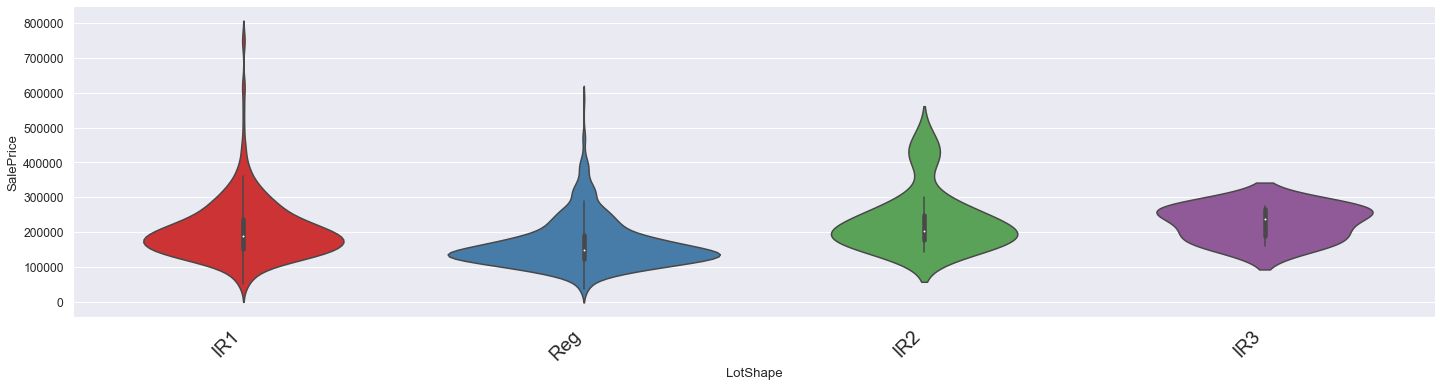

In [843]:
sns.set(font_scale=1.1)
sns.catplot(x='LotShape',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

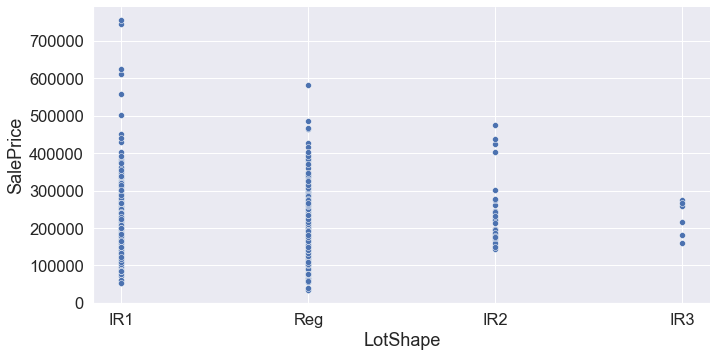

In [844]:
sns.set(font_scale=1.5)
sns.relplot(x='LotShape',y='SalePrice',data=df,aspect=2,palette='Set1')


__mostly propertly are either regularly shaped or slightly irregularly shaped properties only,makes it easy to have a good sale price if the shape is regular__

__LandContour__

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

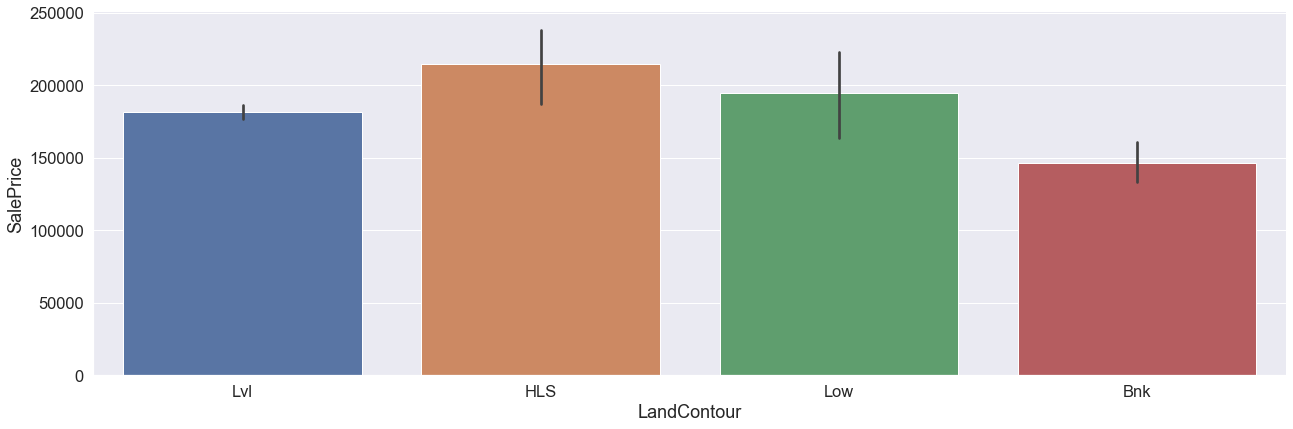

In [845]:
df.LandContour.value_counts()

sns.catplot(y='SalePrice',x='LandContour',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='LandContour', ylabel='count'>

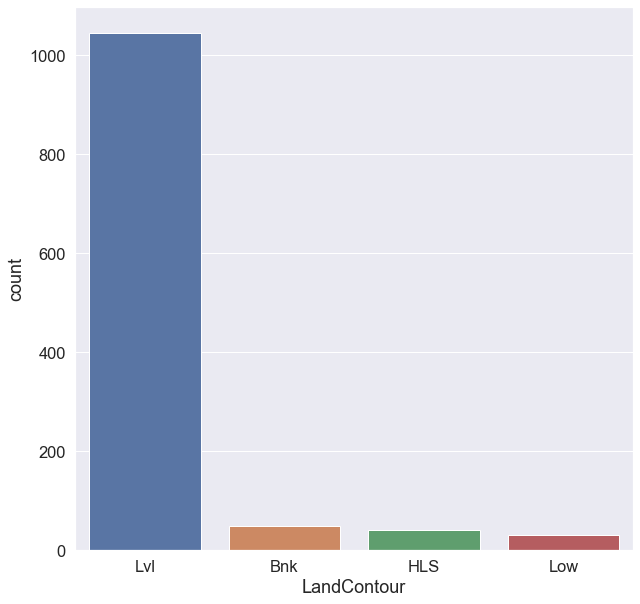

In [846]:
plt.figure(figsize=(10,10))
sns.countplot(df.LandContour)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lvl'), Text(1, 0, 'Bnk'), Text(2, 0, 'HLS'), Text(3, 0, 'Low')])

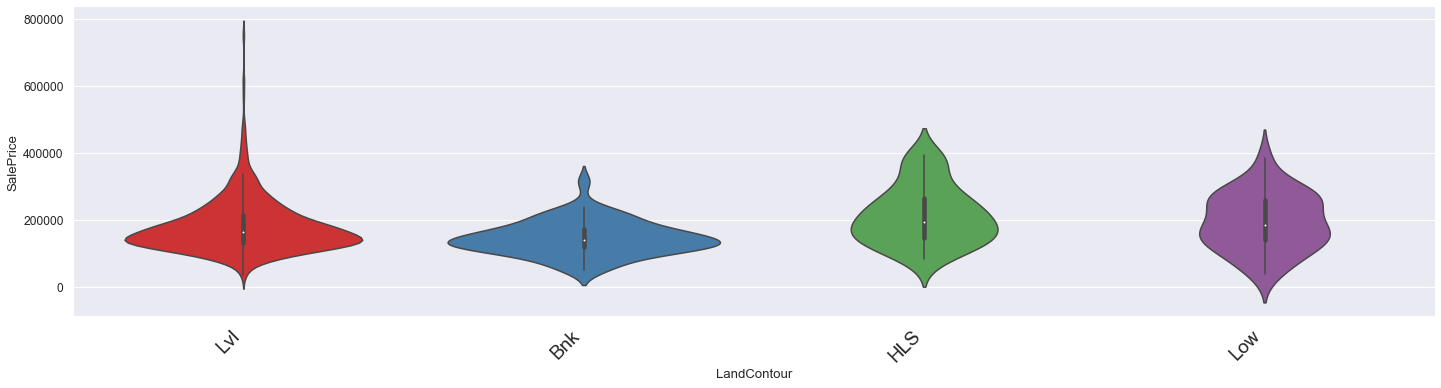

In [847]:
sns.set(font_scale=1.1)
sns.catplot(x='LandContour',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

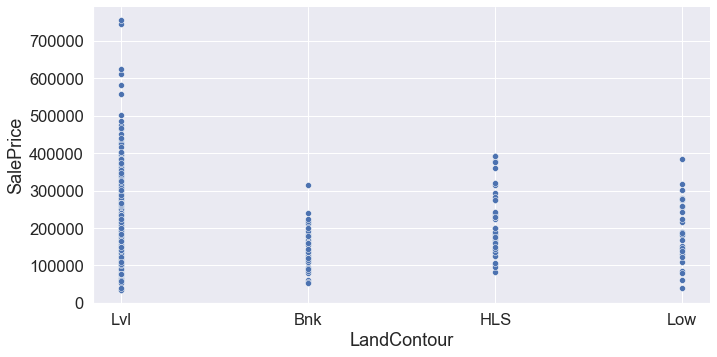

In [848]:
sns.set(font_scale=1.5)
sns.relplot(x='LandContour',y='SalePrice',data=df,aspect=2,palette='Set1')

In [849]:
countlvl= len(df[df.LandContour == 'Lvl'])
print("Percentage of level: {:.2f}%".format((countlvl/ (len(df.LandContour))*100)))

Percentage of level: 89.55%


mostly flatness of the properties is leveled up only means all properties are on basic level and have good sale prices, rest others have prices below 400000 only.

__Utilities__

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	

In [850]:
df.Utilities.value_counts()


AllPub    1168
Name: Utilities, dtype: int64

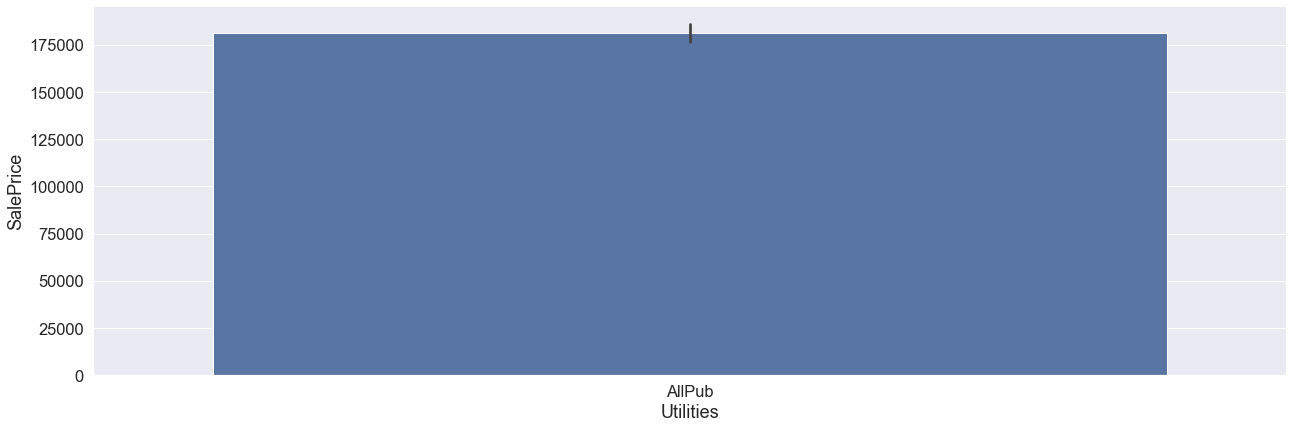

In [851]:
sns.catplot(y='SalePrice',x='Utilities',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Utilities', ylabel='count'>

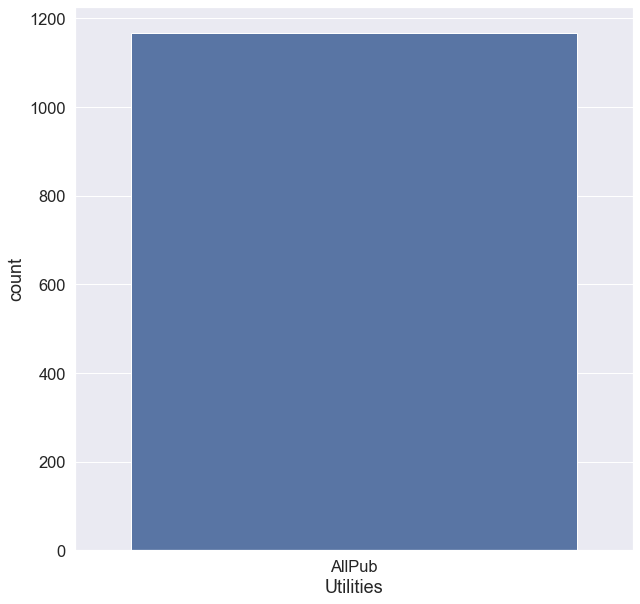

In [852]:
plt.figure(figsize=(10,10))
sns.countplot(df.Utilities)

(array([0]), [Text(0, 0, 'AllPub')])

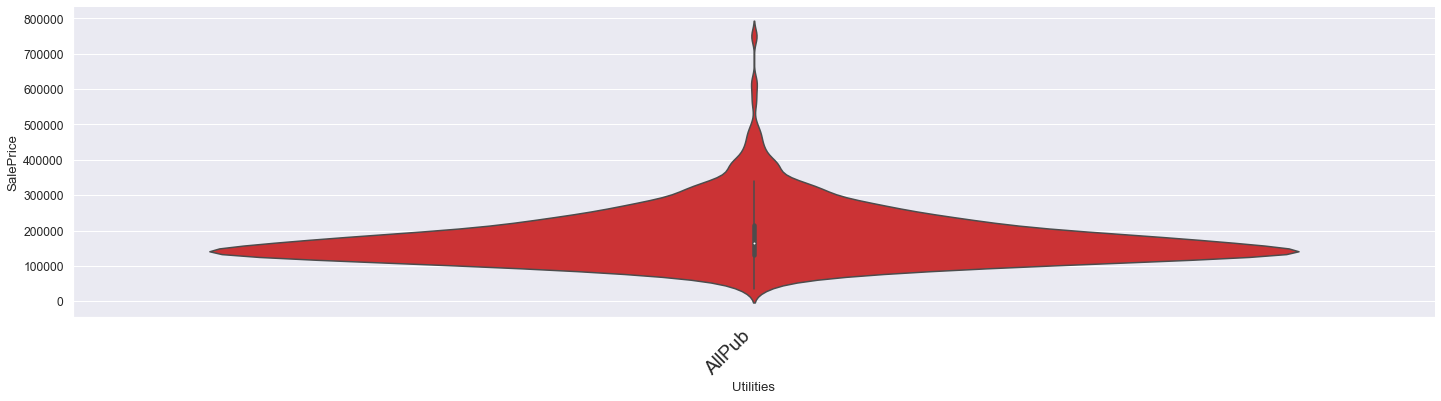

In [853]:
sns.set(font_scale=1.1)
sns.catplot(x='Utilities',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

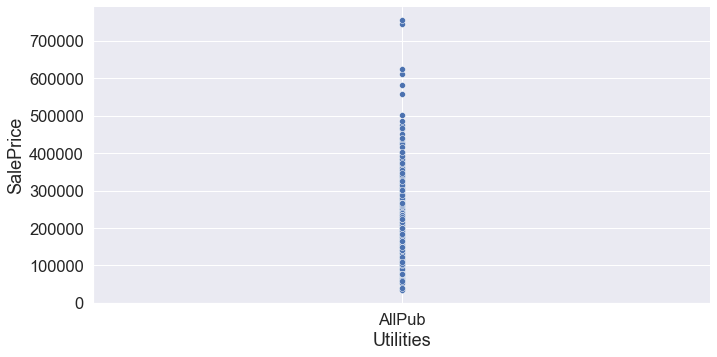

In [854]:
sns.set(font_scale=1.5)
sns.relplot(x='Utilities',y='SalePrice',data=df,aspect=2,palette='Set1')

as it has only one value so lets just drop the column

In [855]:
df.drop(['Utilities'],axis=1,inplace=True)

In [856]:
df1.drop(['Utilities'],axis=1,inplace=True)

__LotConfig__

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [857]:
df.LotConfig.value_counts()


Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

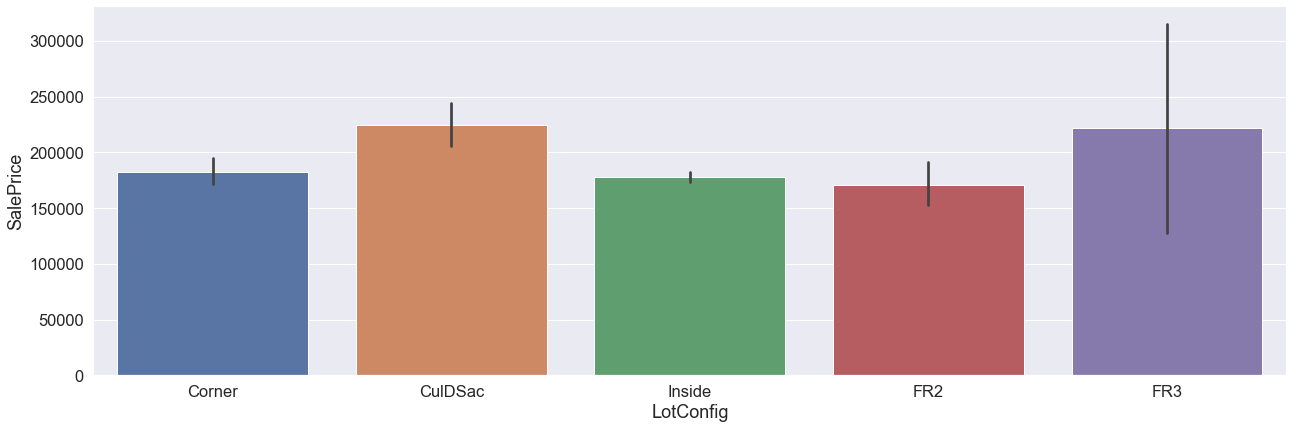

In [858]:
sns.catplot(y='SalePrice',x='LotConfig',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

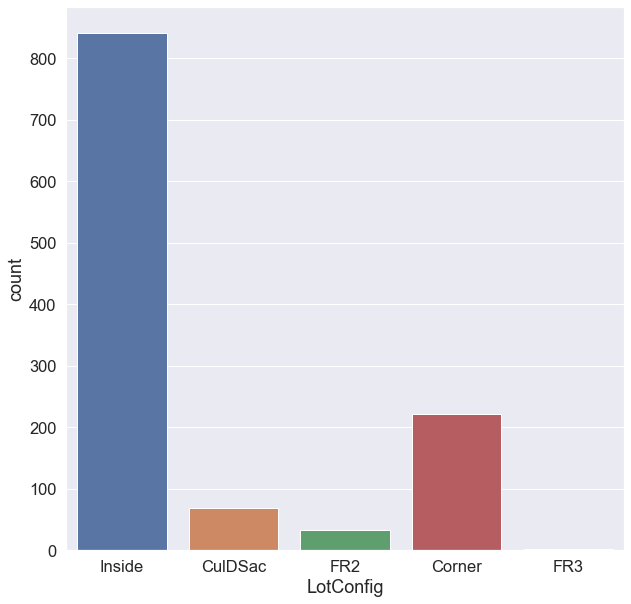

In [859]:
plt.figure(figsize=(10,10))
sns.countplot(df.LotConfig)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Inside'),
  Text(1, 0, 'CulDSac'),
  Text(2, 0, 'FR2'),
  Text(3, 0, 'Corner'),
  Text(4, 0, 'FR3')])

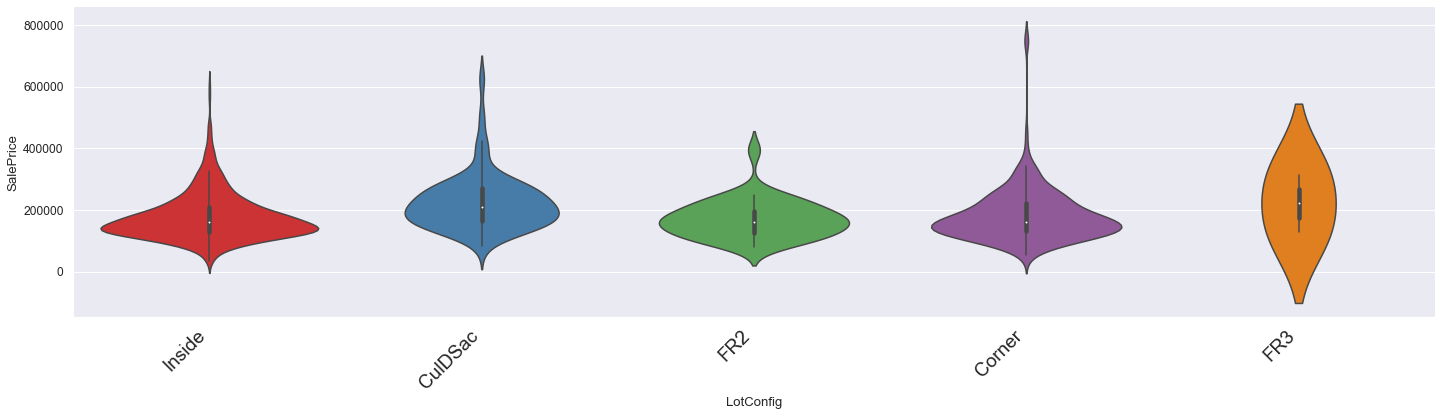

In [860]:
sns.set(font_scale=1.1)
sns.catplot(x='LotConfig',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

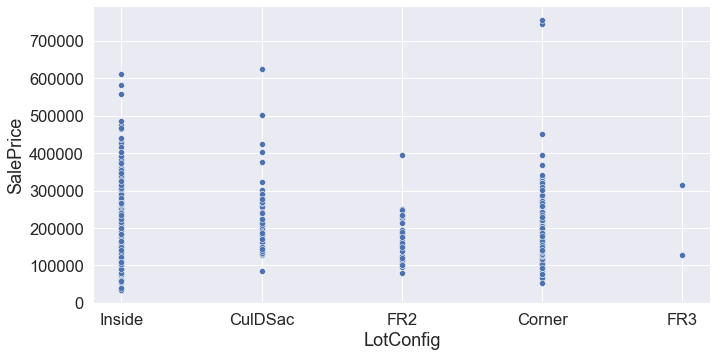

In [861]:
sns.set(font_scale=1.5)
sns.relplot(x='LotConfig',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly inside lot had a count, fr2 and fr3 are cheaper than others with less counts..also few people selling corner lot houses as well

__LandSlope__

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [862]:
df.LandSlope.value_counts()


Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

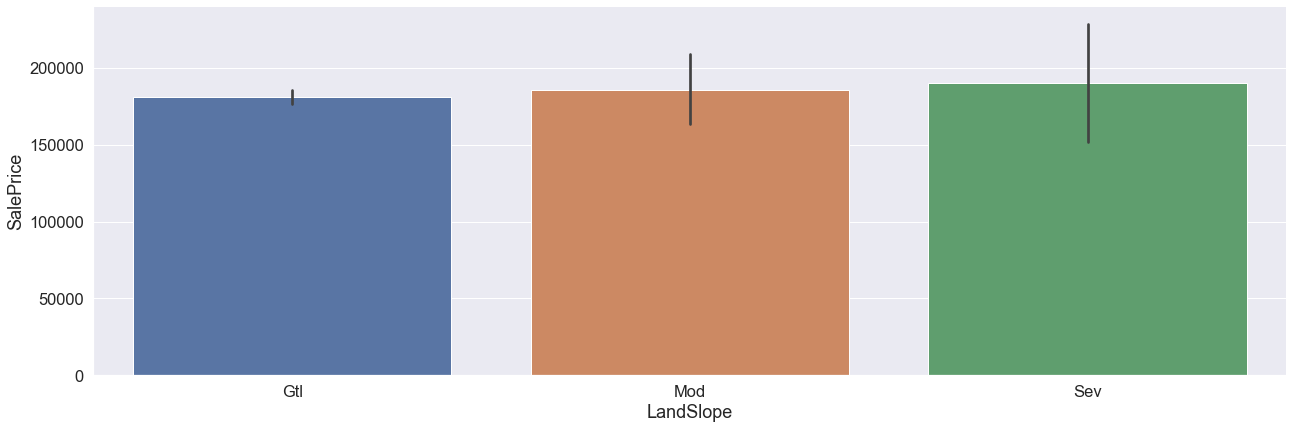

In [863]:
sns.catplot(y='SalePrice',x='LandSlope',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

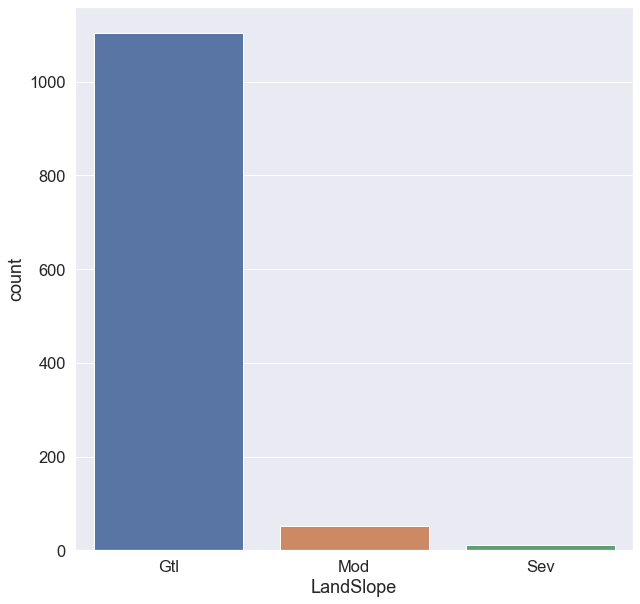

In [864]:
plt.figure(figsize=(10,10))
sns.countplot(df.LandSlope)

(array([0, 1, 2]), [Text(0, 0, 'Gtl'), Text(1, 0, 'Mod'), Text(2, 0, 'Sev')])

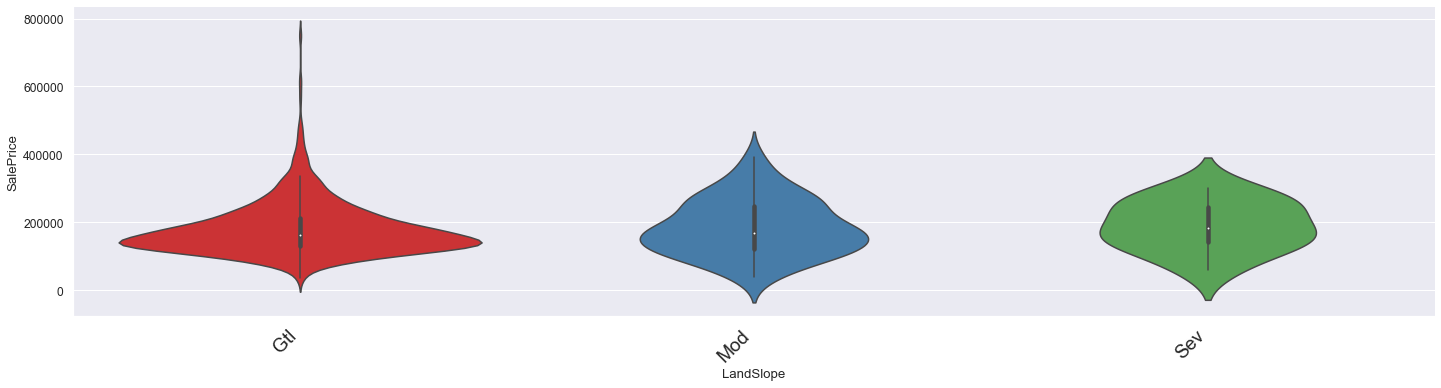

In [865]:
sns.set(font_scale=1.1)
sns.catplot(x='LandSlope',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

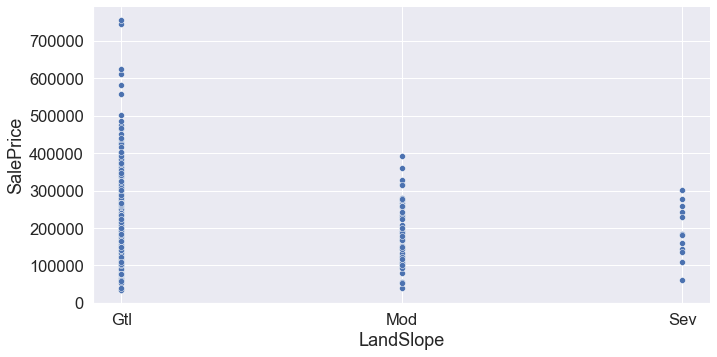

In [866]:
sns.set(font_scale=1.5)
sns.relplot(x='LandSlope',y='SalePrice',data=df,aspect=2,palette='Set1')

 mostly people have gentle slope only and have count more than 1100, more than 95%

In [867]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

__Neighborhood__

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [868]:
df.Neighborhood.value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

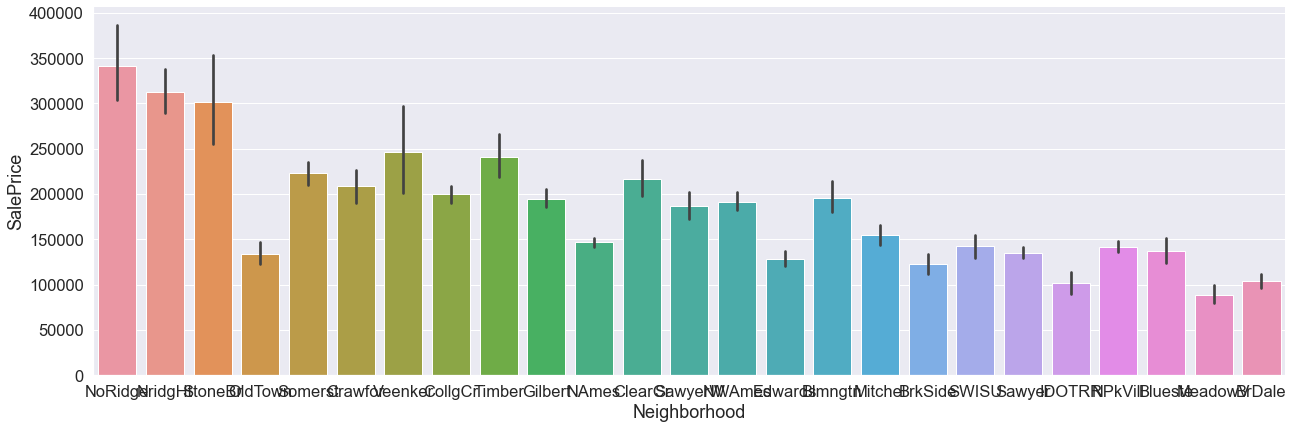

In [869]:
sns.catplot(y='SalePrice',x='Neighborhood',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

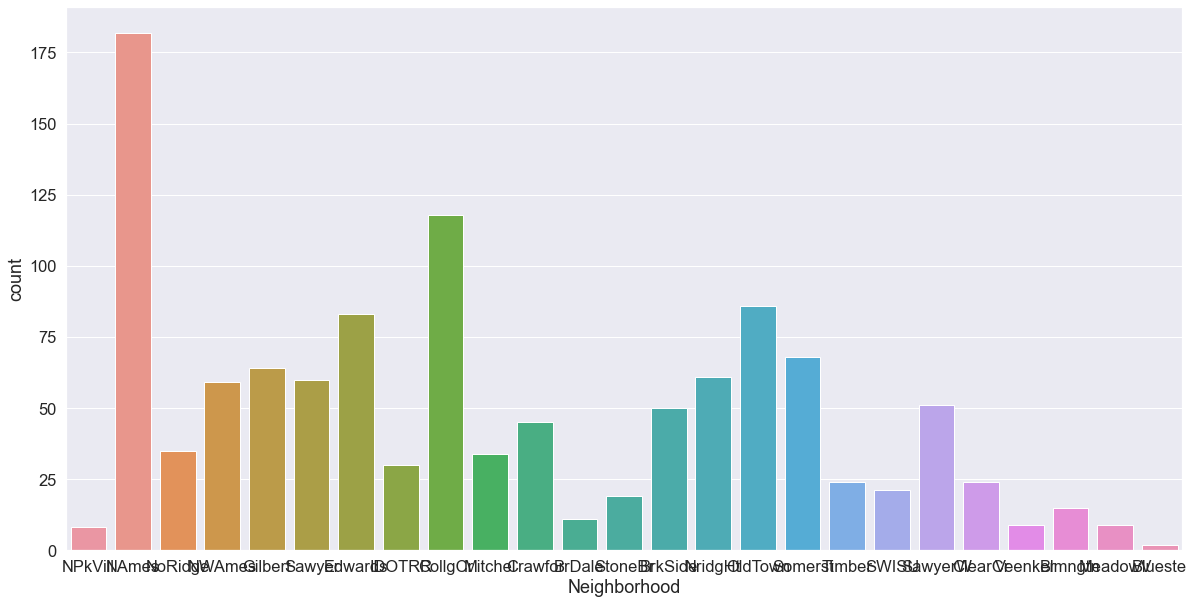

In [870]:
plt.figure(figsize=(20,10))
sns.countplot(df.Neighborhood)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

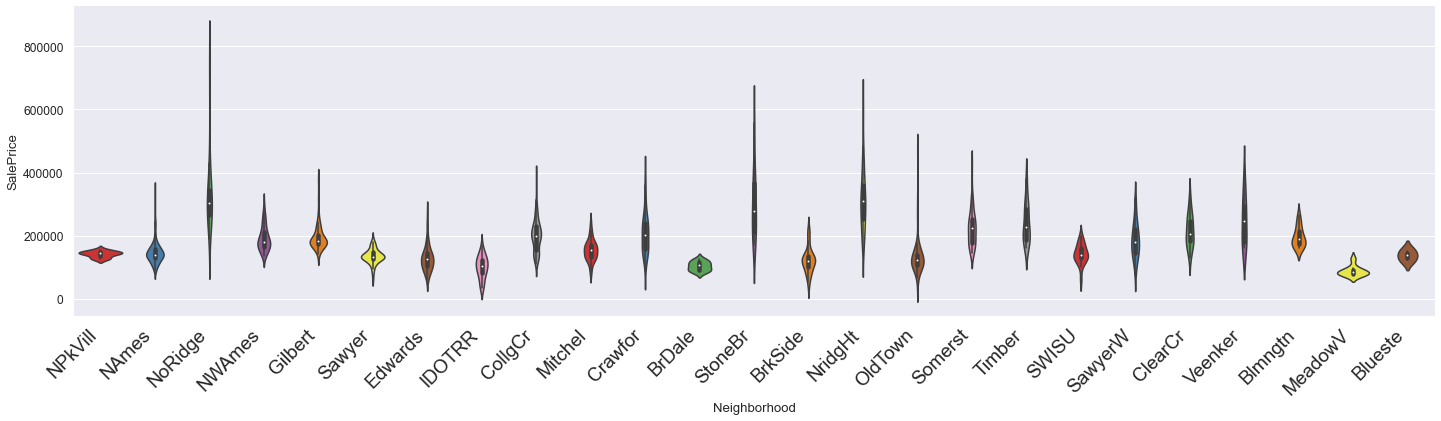

In [871]:
sns.set(font_scale=1.1)
sns.catplot(x='Neighborhood',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

north ames and college creek are mostly neighbourhood places with less sales prices of house

__Condition1__

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [872]:
df.Condition1.value_counts()


Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='count'>

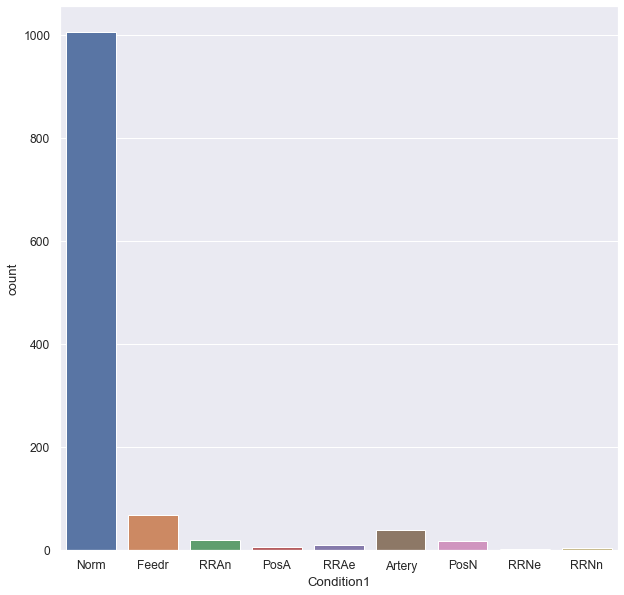

In [873]:
plt.figure(figsize=(10,10))
sns.countplot(df.Condition1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Feedr'),
  Text(2, 0, 'RRAn'),
  Text(3, 0, 'PosA'),
  Text(4, 0, 'RRAe'),
  Text(5, 0, 'Artery'),
  Text(6, 0, 'PosN'),
  Text(7, 0, 'RRNe'),
  Text(8, 0, 'RRNn')])

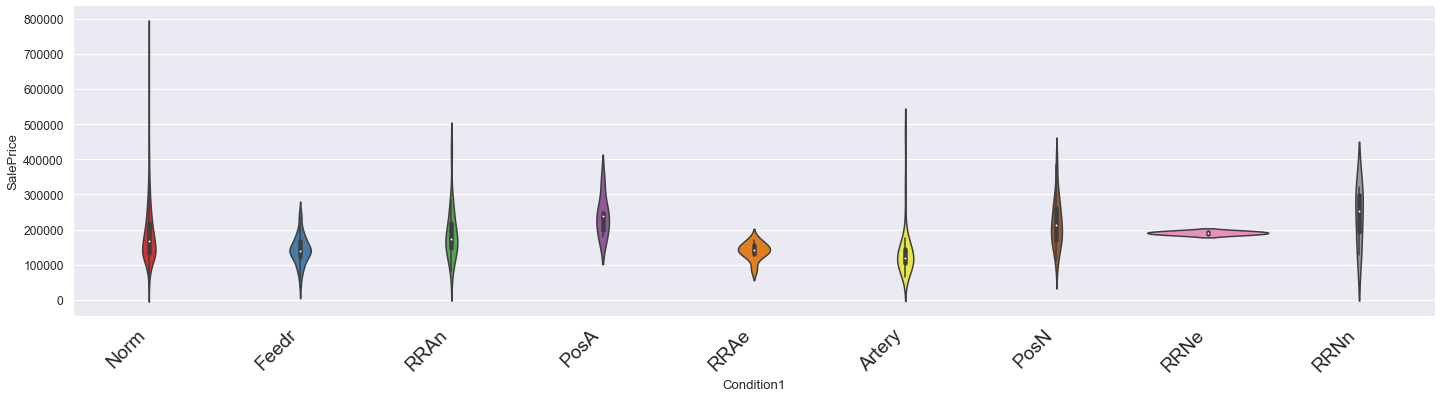

In [874]:
sns.set(font_scale=1.1)
sns.catplot(x='Condition1',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

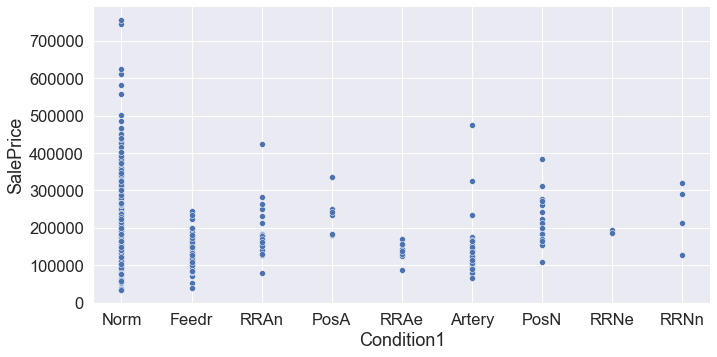

In [875]:
sns.set(font_scale=1.5)
sns.relplot(x='Condition1',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly proximity is normal for the area of house.

__Condition2__

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [876]:
df.Condition2.value_counts()

Norm      1154
Feedr        6
Artery       2
PosN         2
RRAn         1
PosA         1
RRNn         1
RRAe         1
Name: Condition2, dtype: int64

<AxesSubplot:xlabel='Condition2', ylabel='count'>

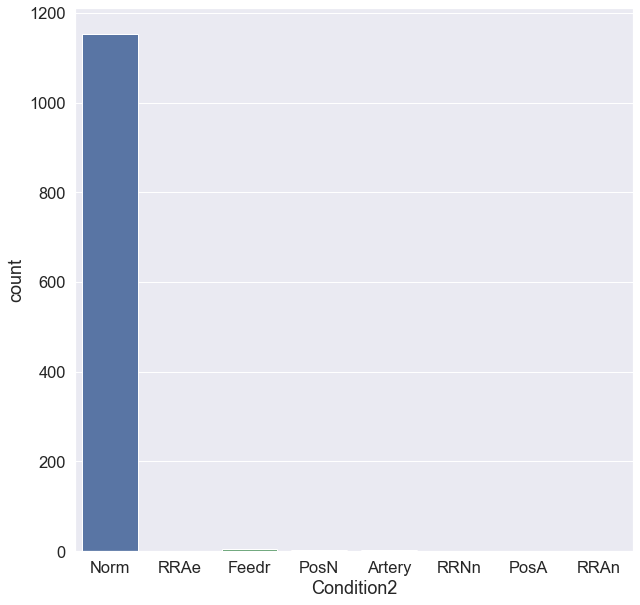

In [877]:
plt.figure(figsize=(10,10))
sns.countplot(df.Condition2)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'RRAe'),
  Text(2, 0, 'Feedr'),
  Text(3, 0, 'PosN'),
  Text(4, 0, 'Artery'),
  Text(5, 0, 'RRNn'),
  Text(6, 0, 'PosA'),
  Text(7, 0, 'RRAn')])

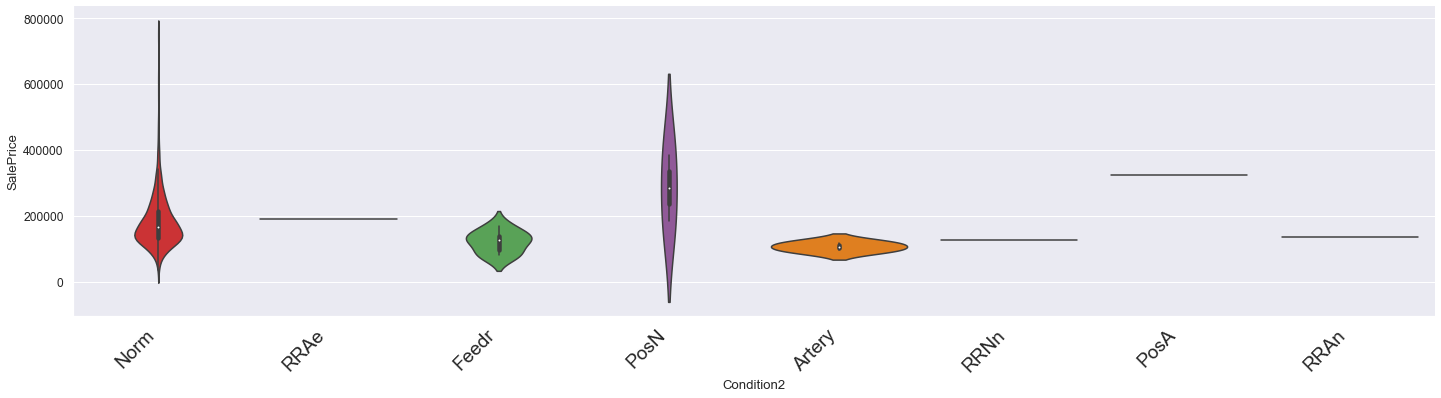

In [878]:
sns.set(font_scale=1.1)
sns.catplot(x='Condition2',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


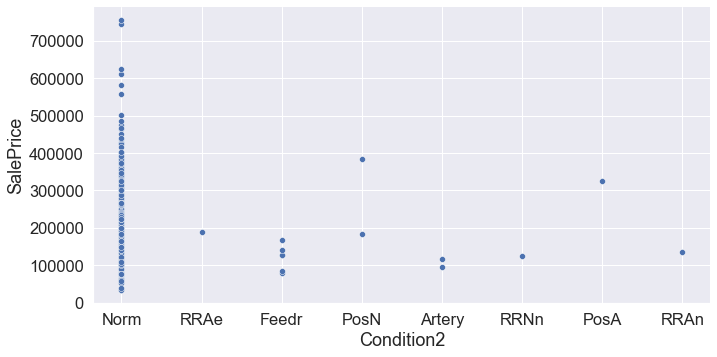

In [879]:
sns.set(font_scale=1.5)
sns.relplot(x='Condition2',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly proximity is normal for the area of house.

__BldgType__

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [880]:
df.BldgType.value_counts()


1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

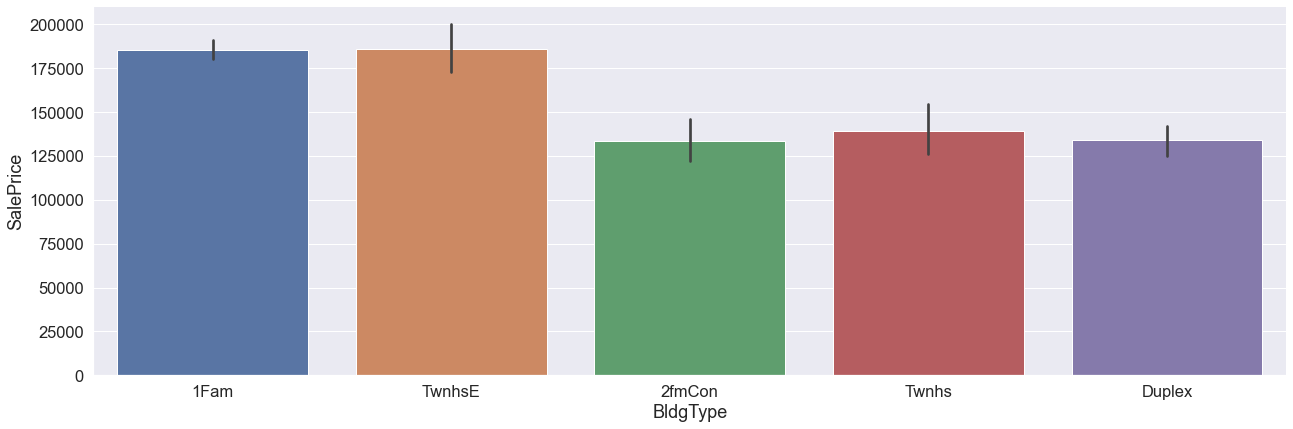

In [881]:
sns.catplot(y='SalePrice',x='BldgType',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BldgType', ylabel='count'>

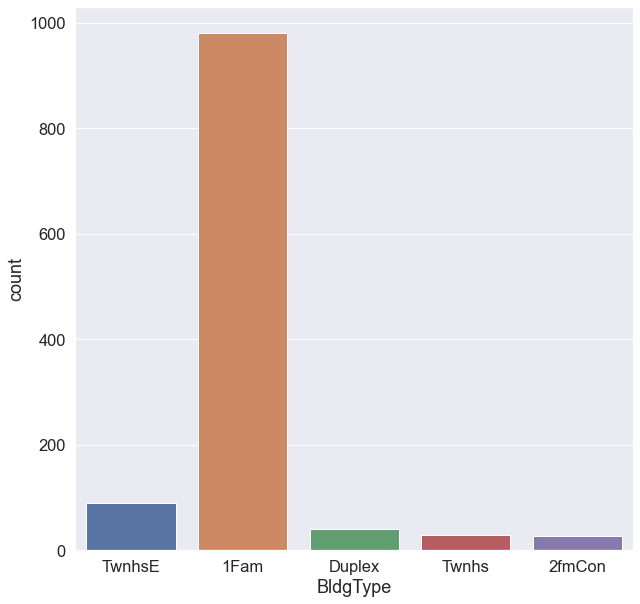

In [882]:
plt.figure(figsize=(10,10))
sns.countplot(df.BldgType)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TwnhsE'),
  Text(1, 0, '1Fam'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'Twnhs'),
  Text(4, 0, '2fmCon')])

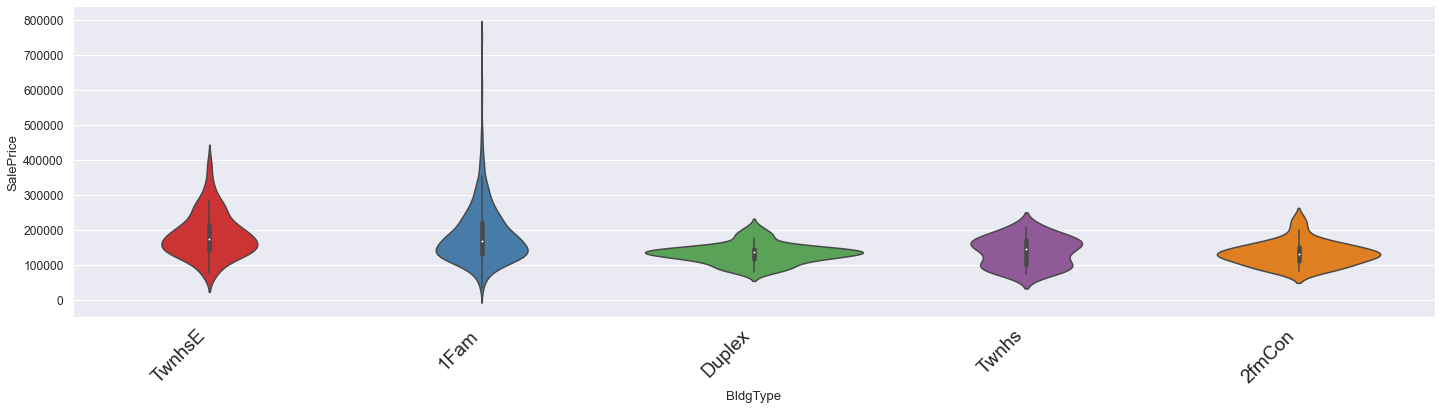

In [883]:
sns.set(font_scale=1.1)
sns.catplot(x='BldgType',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

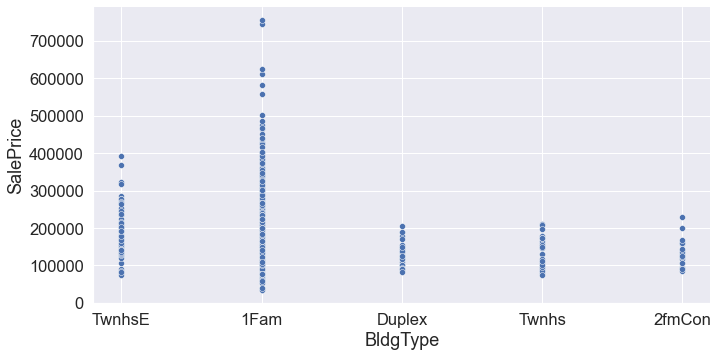

In [884]:
sns.set(font_scale=1.5)
sns.relplot(x='BldgType',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly its is single family detached type of dwelling of houses with more thann 900 count

__HouseStyle__

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [885]:
df.HouseStyle.value_counts()


1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

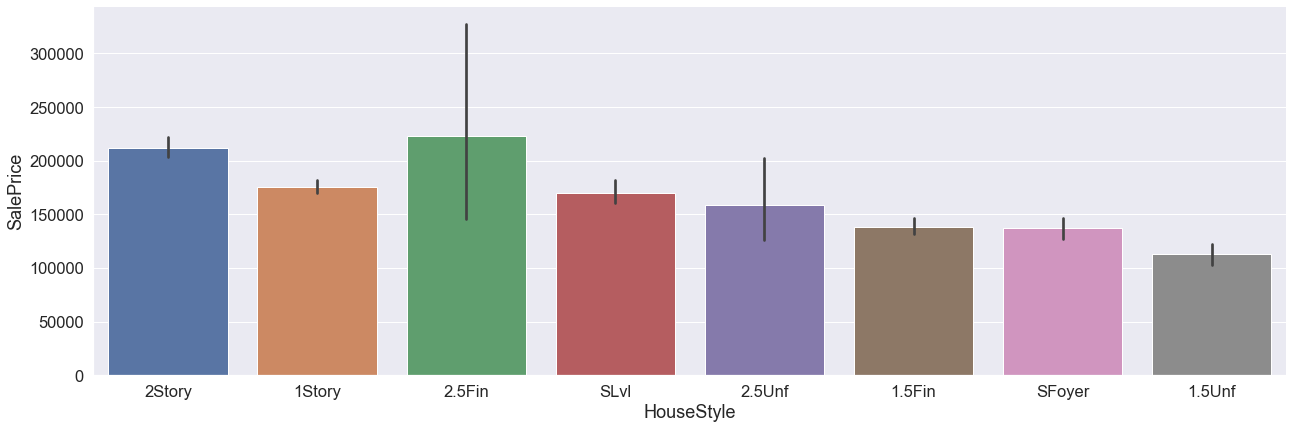

In [886]:
sns.catplot(y='SalePrice',x='HouseStyle',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

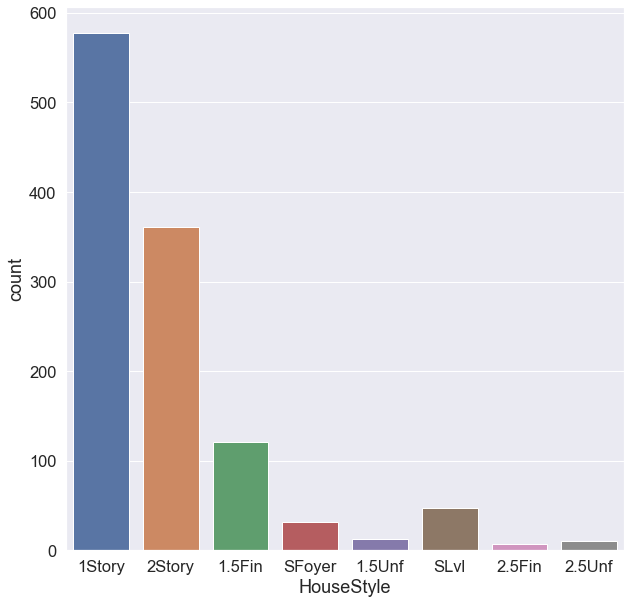

In [887]:
plt.figure(figsize=(10,10))
sns.countplot(df.HouseStyle)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1Story'),
  Text(1, 0, '2Story'),
  Text(2, 0, '1.5Fin'),
  Text(3, 0, 'SFoyer'),
  Text(4, 0, '1.5Unf'),
  Text(5, 0, 'SLvl'),
  Text(6, 0, '2.5Fin'),
  Text(7, 0, '2.5Unf')])

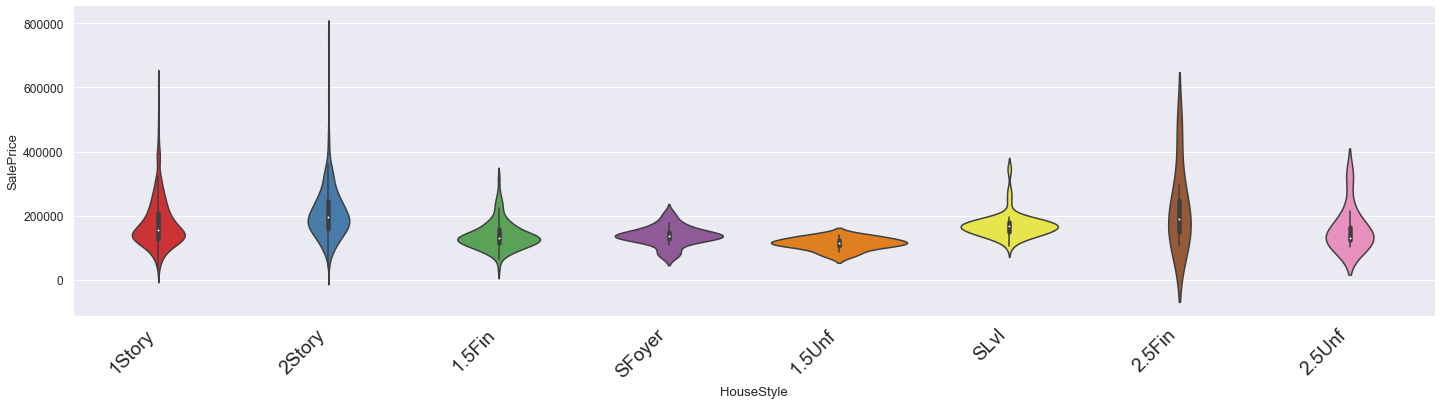

In [888]:
sns.set(font_scale=1.1)
sns.catplot(x='HouseStyle',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

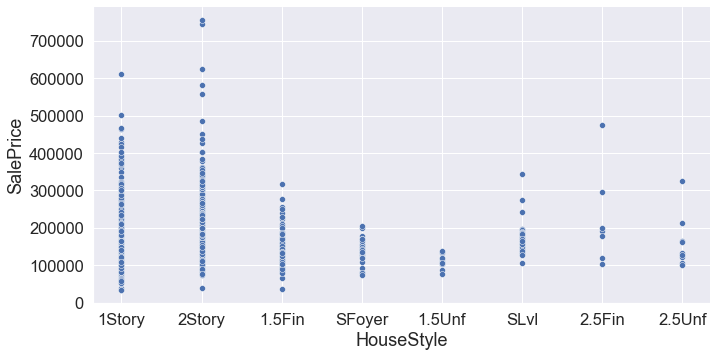

In [889]:
sns.set(font_scale=1.5)
sns.relplot(x='HouseStyle',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly it is single story buildings or two story buildings, where few of building of two story is almost equal to single story.

__OverallQual__

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [890]:
df.OverallQual.value_counts()


5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

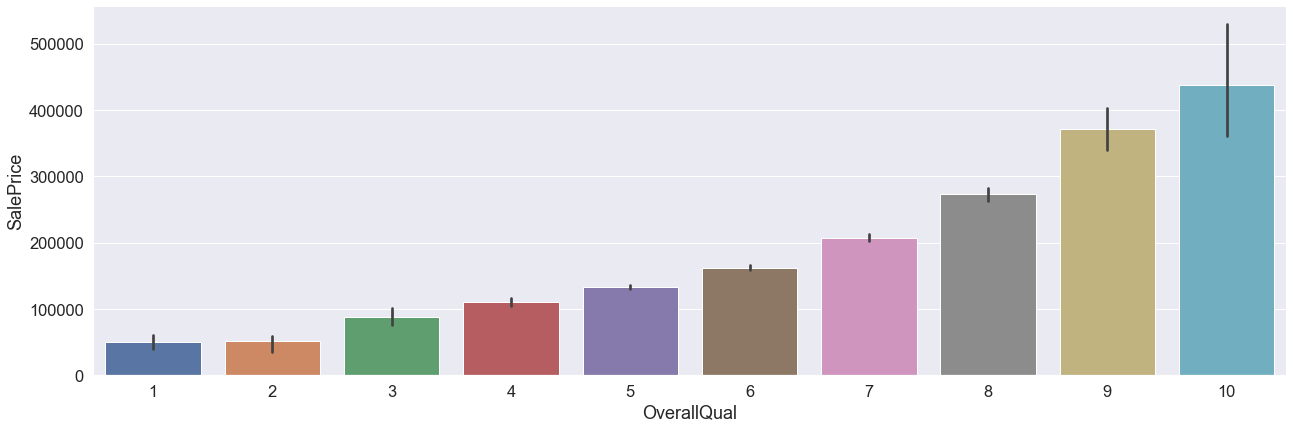

In [891]:
sns.catplot(y='SalePrice',x='OverallQual',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

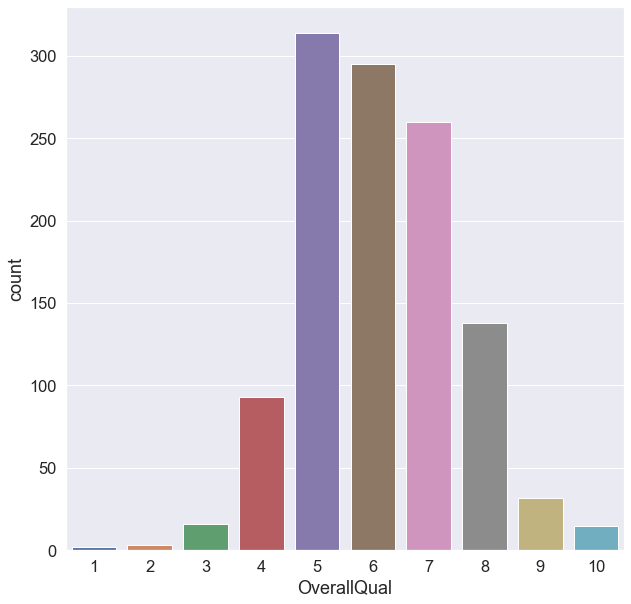

In [892]:
plt.figure(figsize=(10,10))
sns.countplot(df.OverallQual)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

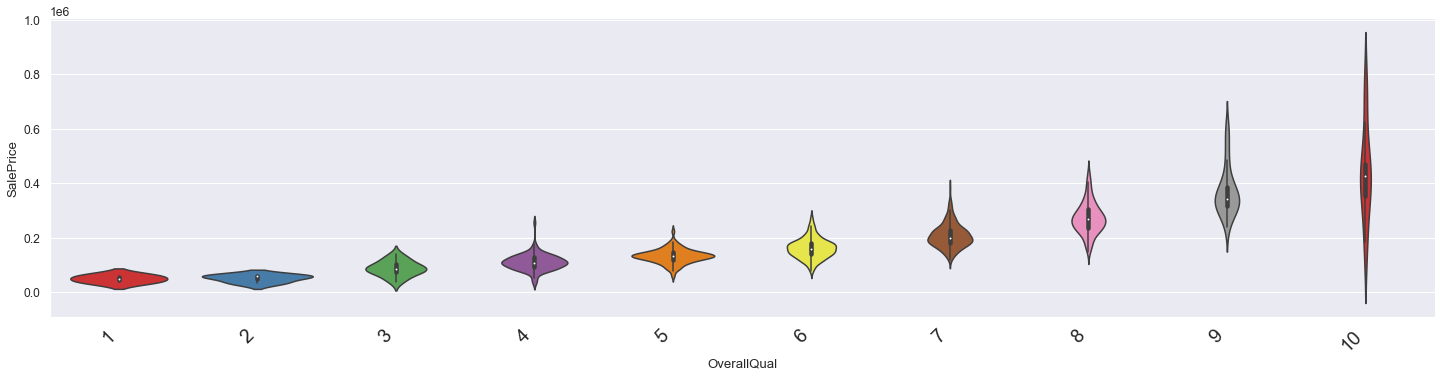

In [893]:
sns.set(font_scale=1.1)
sns.catplot(x='OverallQual',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

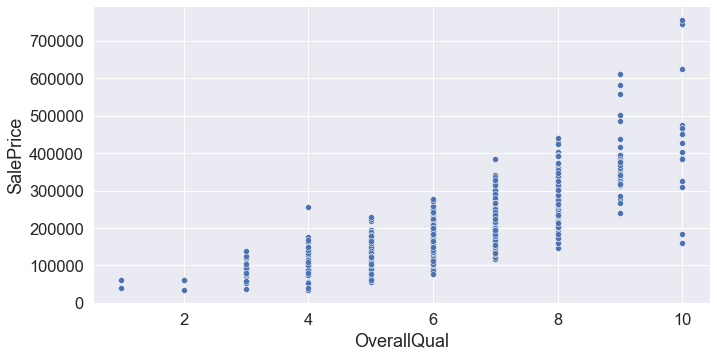

In [894]:
sns.set(font_scale=1.5)
sns.relplot(x='OverallQual',y='SalePrice',data=df,aspect=2,palette='Set1')


here the graphs are linear in shape, as per the prices , over all quality increases and vice versa, mostly almost 500 counts are having average quality of 5-6

__OverallCond__

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [895]:
df.OverallCond.value_counts()


5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

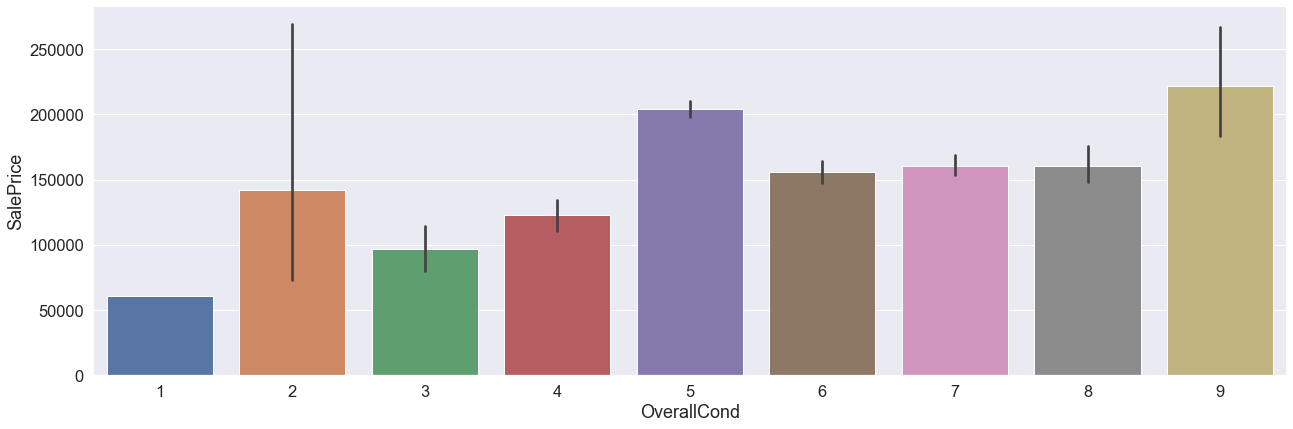

In [896]:
sns.catplot(y='SalePrice',x='OverallCond',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

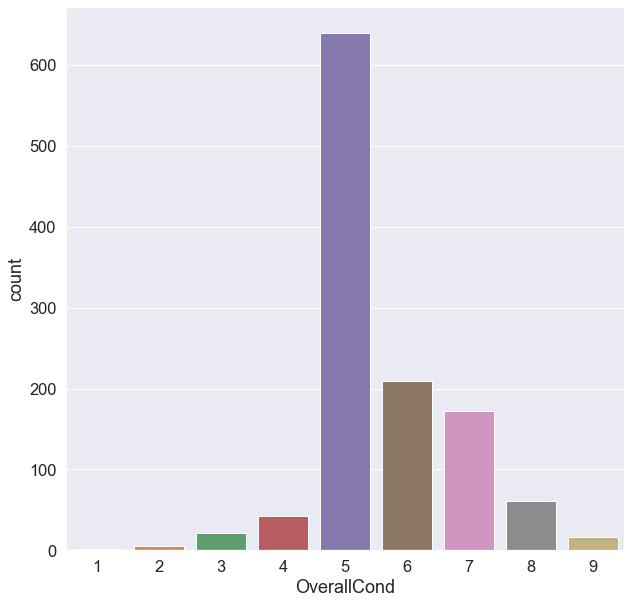

In [897]:
plt.figure(figsize=(10,10))
sns.countplot(df.OverallCond)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

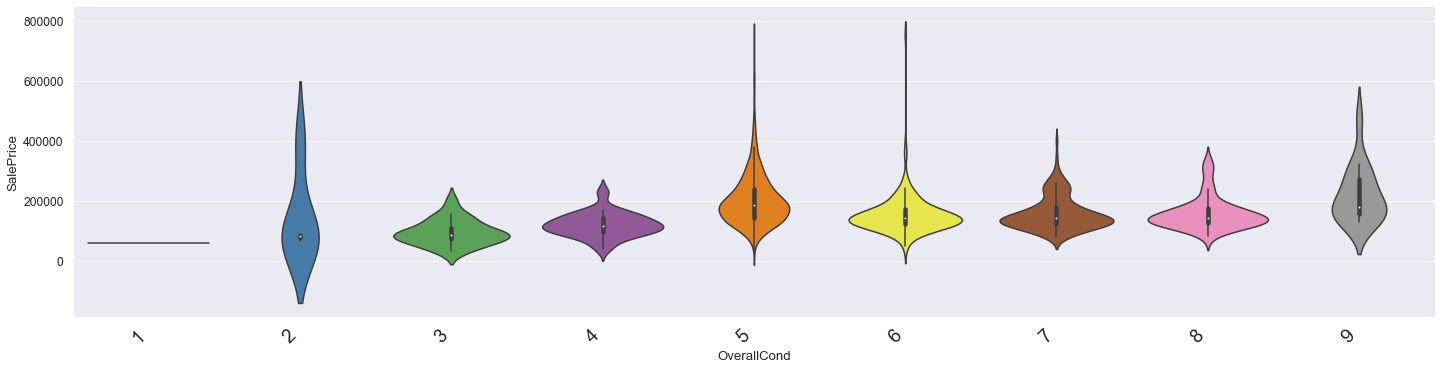

In [898]:
sns.set(font_scale=1.1)
sns.catplot(x='OverallCond',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

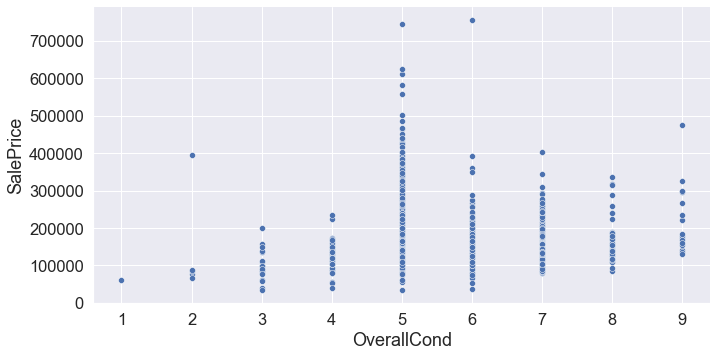

In [899]:
sns.set(font_scale=1.5)
sns.relplot(x='OverallCond',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly over all conditions are between 5-7 , strangly few houses have high prices with over all condition 2 and no house has very excellent condition with rating 10

__YearBuilt: Original construction date__


In [900]:
df.YearBuilt.value_counts()


2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1913     1
1917     1
1927     1
1989     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64

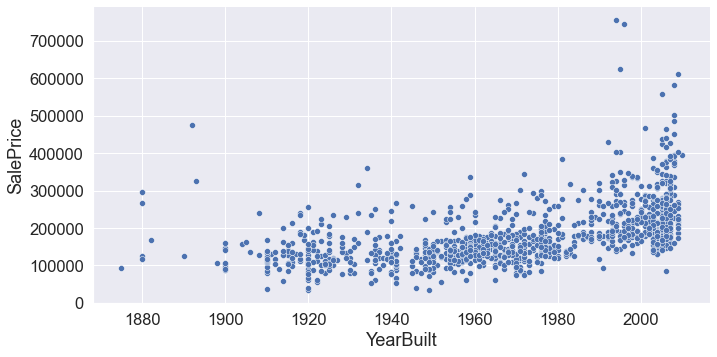

In [901]:
sns.set(font_scale=1.5)
sns.relplot(x='YearBuilt',y='SalePrice',data=df,aspect=2,palette='Set1')

few houses built in 1900 as well, but having less count, mostly built year is 1970 and more

__YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)__

In [902]:
df.YearRemodAdd.value_counts()


1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

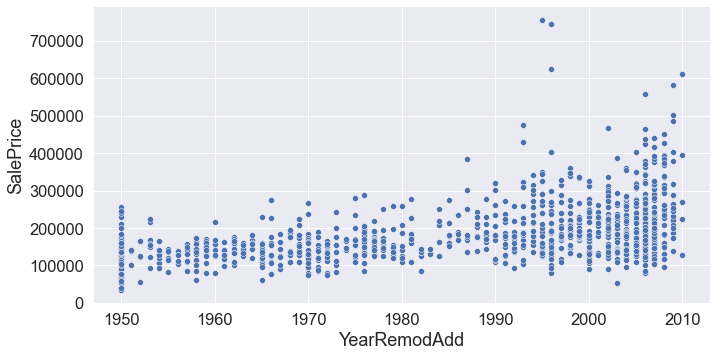

In [903]:
sns.set(font_scale=1.5)
sns.relplot(x='YearRemodAdd',y='SalePrice',data=df,aspect=2,palette='Set1')

during course of years went by, remodeling has been done and few werent done

__RoofStyle__

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [904]:
df.RoofStyle.value_counts()


Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

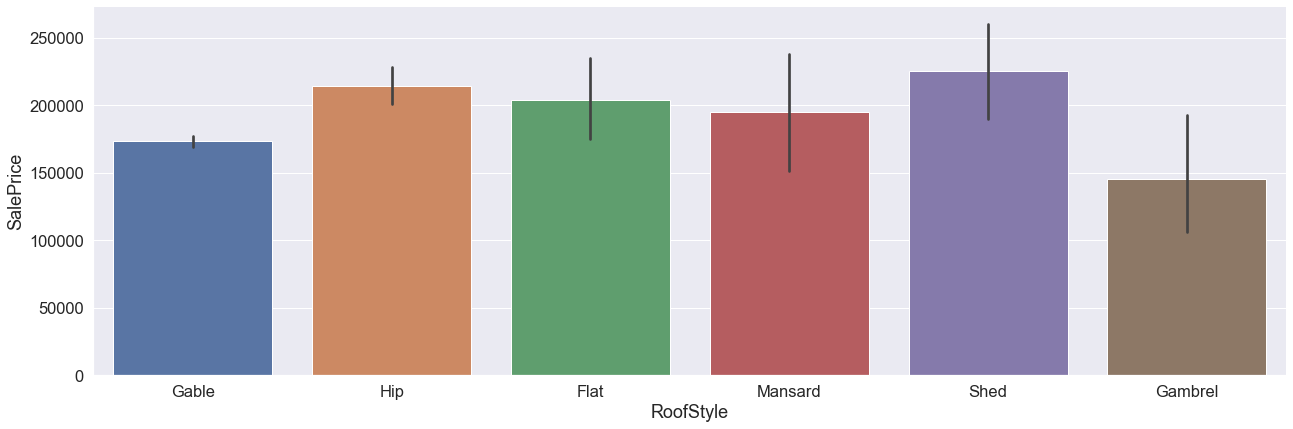

In [905]:
sns.catplot(y='SalePrice',x='RoofStyle',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

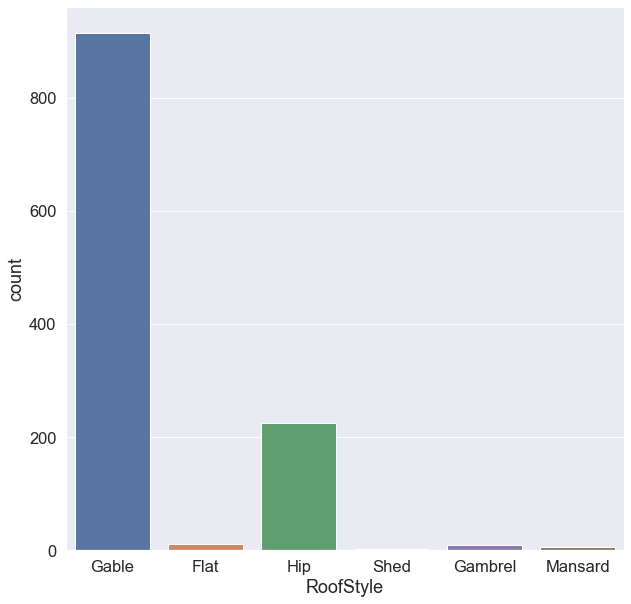

In [906]:
plt.figure(figsize=(10,10))
sns.countplot(df.RoofStyle)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Gable'),
  Text(1, 0, 'Flat'),
  Text(2, 0, 'Hip'),
  Text(3, 0, 'Shed'),
  Text(4, 0, 'Gambrel'),
  Text(5, 0, 'Mansard')])

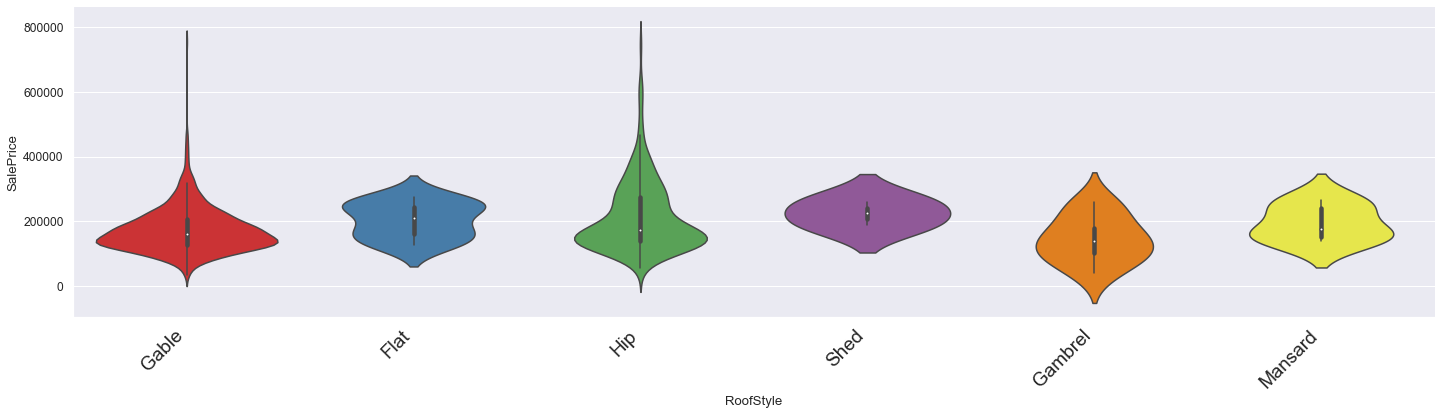

In [907]:
sns.set(font_scale=1.1)
sns.catplot(x='RoofStyle',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

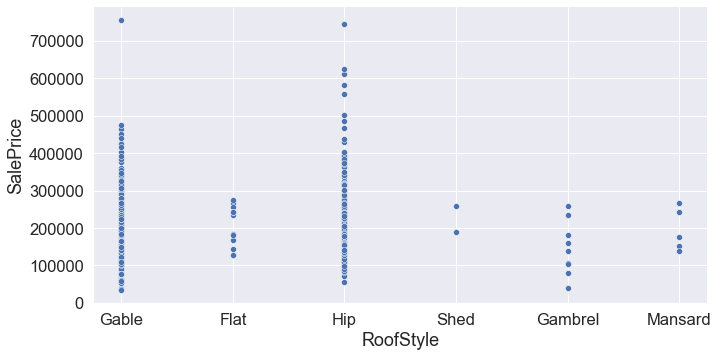

In [908]:
sns.set(font_scale=1.5)
sns.relplot(x='RoofStyle',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses rooftops are gable or hip


__RoofMatl__

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		

In [909]:
df.RoofMatl.value_counts()


CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

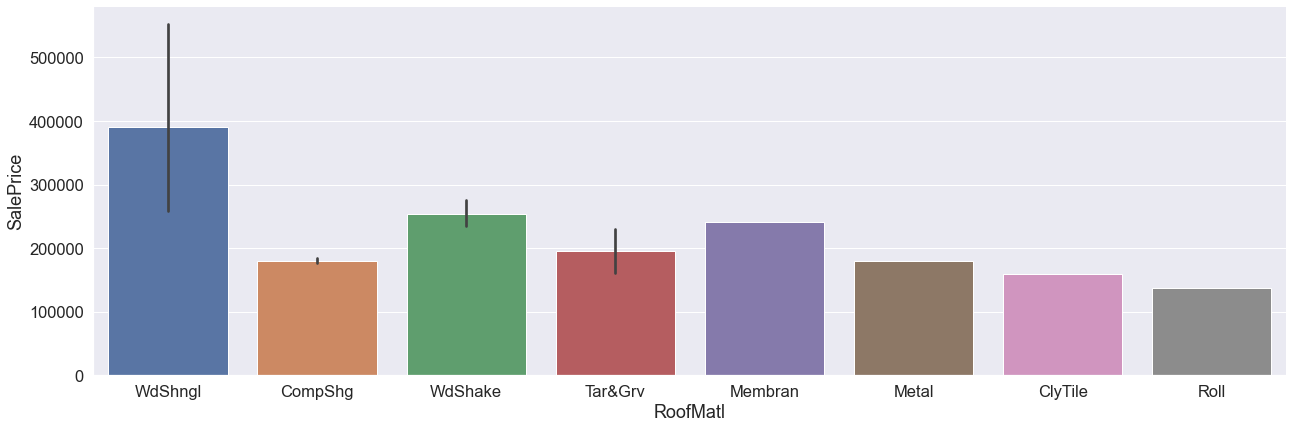

In [910]:
sns.catplot(y='SalePrice',x='RoofMatl',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

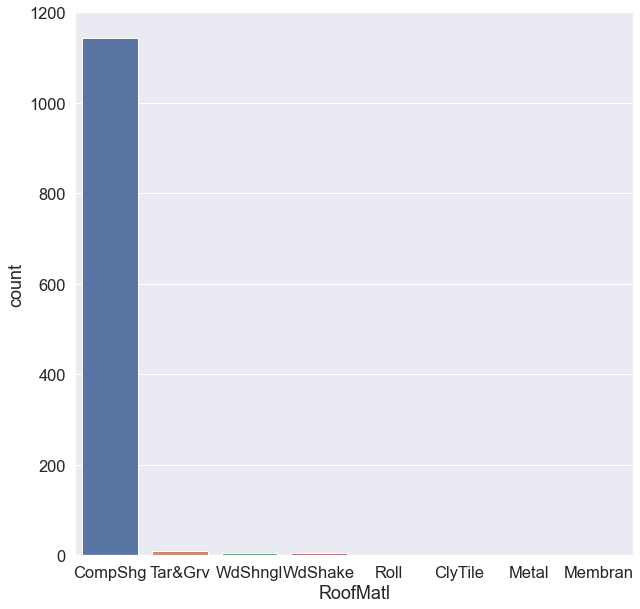

In [911]:
plt.figure(figsize=(10,10))
sns.countplot(df.RoofMatl)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'Tar&Grv'),
  Text(2, 0, 'WdShngl'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Roll'),
  Text(5, 0, 'ClyTile'),
  Text(6, 0, 'Metal'),
  Text(7, 0, 'Membran')])

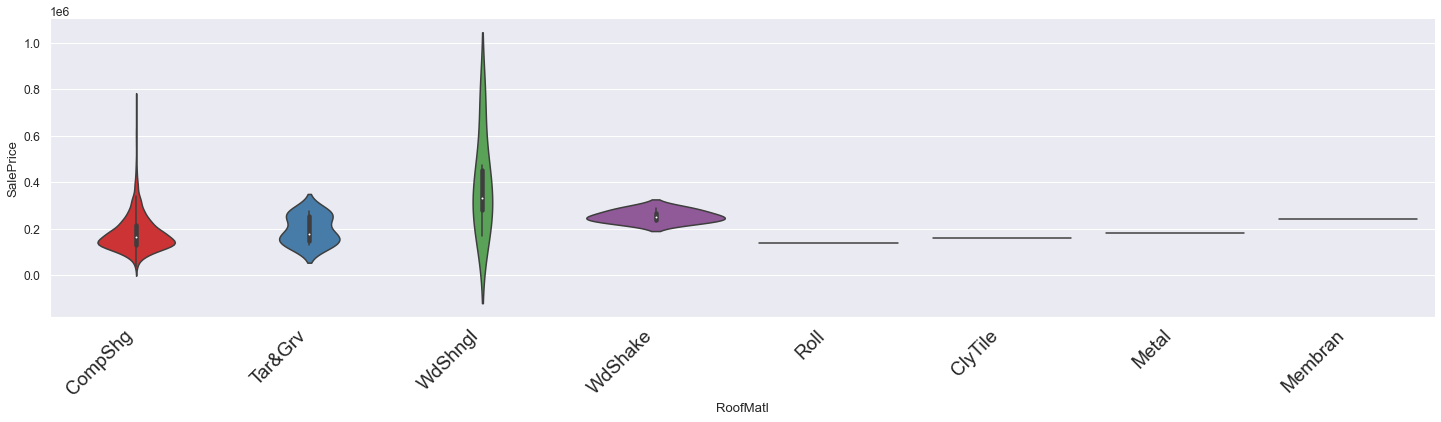

In [912]:
sns.set(font_scale=1.1)
sns.catplot(x='RoofMatl',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

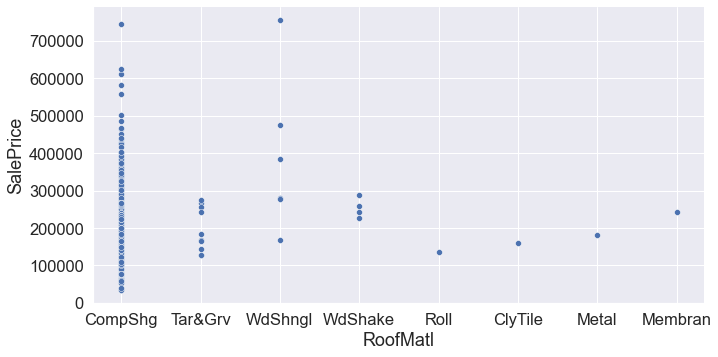

In [913]:
sns.set(font_scale=1.5)
sns.relplot(x='RoofMatl',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly standard composite shingle is the rooftop material is been used in most of the houses

__Exterior1st__

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [914]:
df.Exterior1st.value_counts()


VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
ImStucc      1
BrkComm      1
AsphShn      1
Name: Exterior1st, dtype: int64

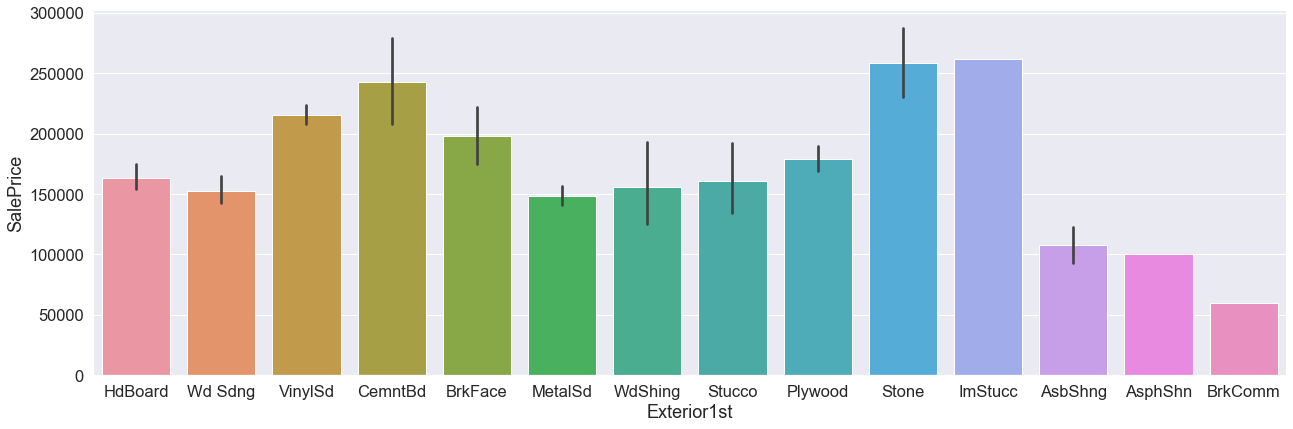

In [915]:
sns.catplot(y='SalePrice',x='Exterior1st',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

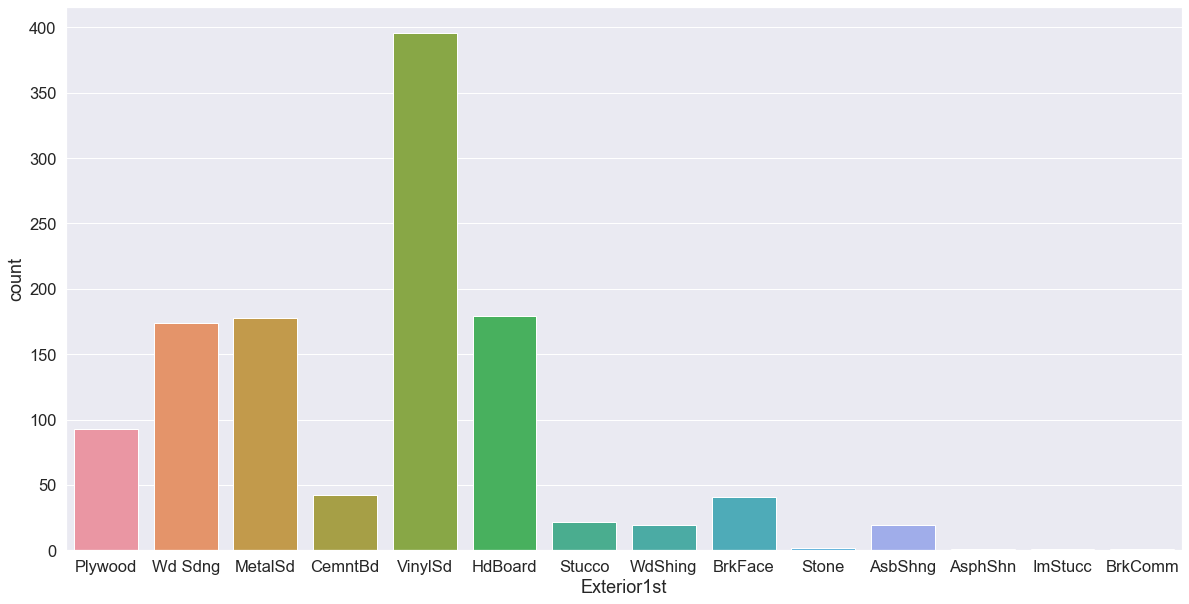

In [916]:
plt.figure(figsize=(20,10))
sns.countplot(df.Exterior1st)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Stucco'),
  Text(7, 0, 'WdShing'),
  Text(8, 0, 'BrkFace'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'AsbShng'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'ImStucc'),
  Text(13, 0, 'BrkComm')])

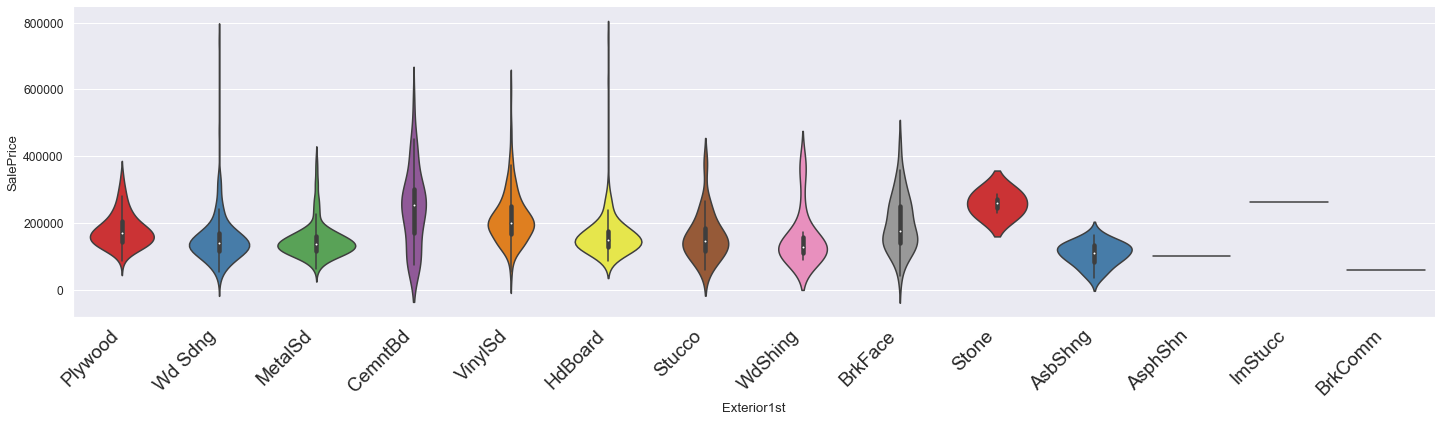

In [917]:
sns.set(font_scale=1.1)
sns.catplot(x='Exterior1st',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

mostly the exterior covering houses are Vinyl Siding,Metal Siding,Hard Board,Wood Siding

__Exterior2nd__

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       

In [918]:
df.Exterior2nd.value_counts()


VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

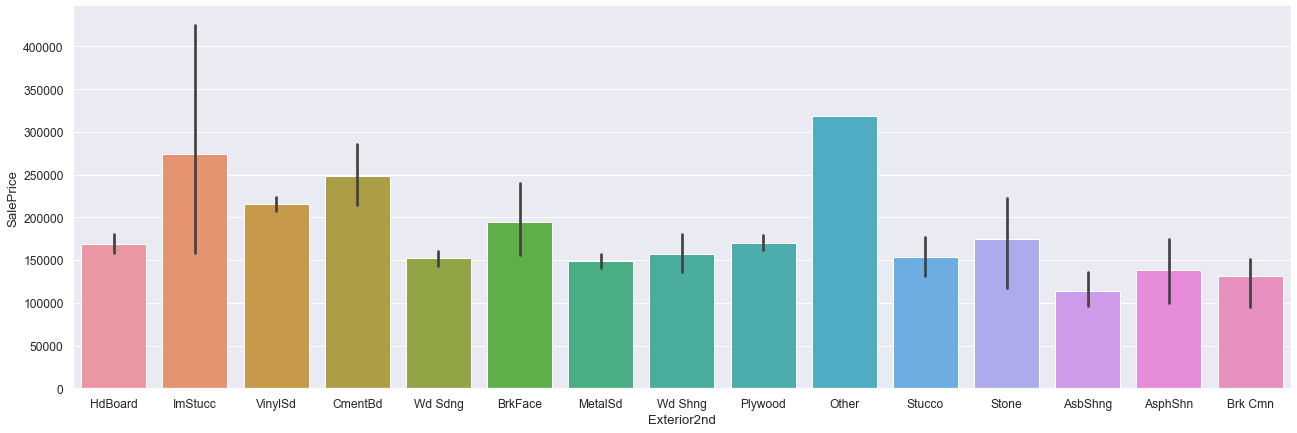

In [919]:
sns.catplot(y='SalePrice',x='Exterior2nd',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

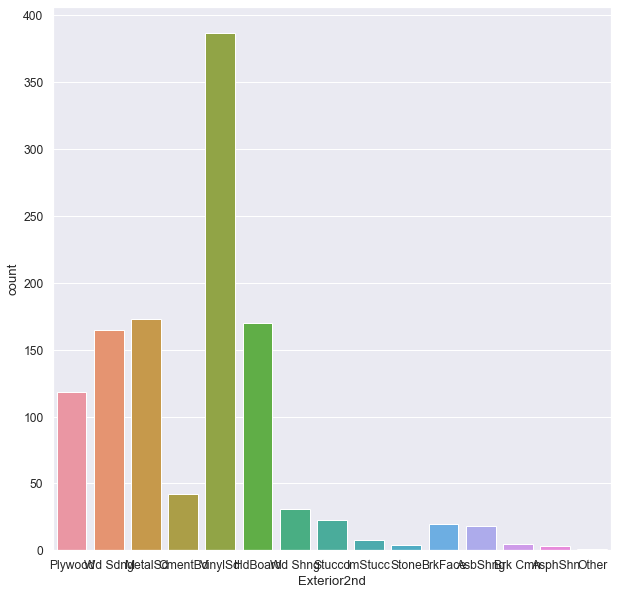

In [920]:
plt.figure(figsize=(10,10))
sns.countplot(df.Exterior2nd)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'AsbShng'),
  Text(12, 0, 'Brk Cmn'),
  Text(13, 0, 'AsphShn'),
  Text(14, 0, 'Other')])

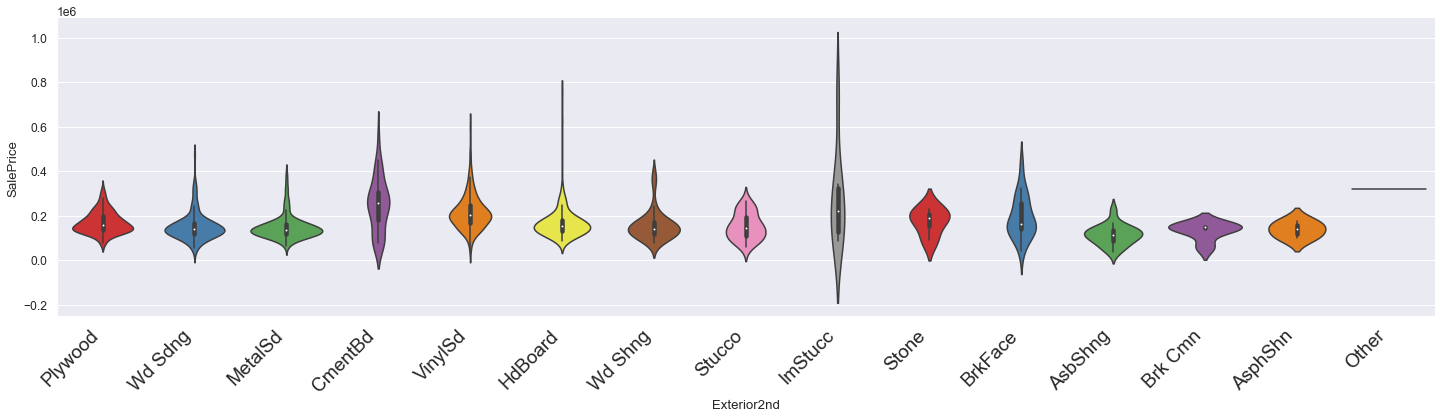

In [921]:
sns.set(font_scale=1.1)
sns.catplot(x='Exterior2nd',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

mostly the exterior covering houses , other than one material are Vinyl Siding,Metal Siding,Hard Board,Wood Siding,plywood

__MasVnrType__

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [922]:
df.MasVnrType.value_counts()


None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [923]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 16
Missing values in the dataset : 
  ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       None         0.0       Gd       TA           No          ALQ   
1       None         0.0       TA       Gd           Gd          ALQ   
2       None         0.0       Gd       TA           Av          GLQ   
3    BrkFace       480.0       Gd       TA           No          BLQ   
4      Stone       126.0       Gd       TA           No          ALQ   

  BsmtFinType2 FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual  \
0          Unf          TA     Attchd       1977.0          RFn         TA   
1          Rec          TA     Attchd       1970.0          Unf         TA   
2          Unf          TA     Attchd       1997.0          Unf         TA   
3          Unf          TA     Attchd       1977.0          RFn         TA   
4          Unf          TA     Attchd       1977.0          Fin         TA   

  GarageCond PoolQC  Fence MiscFeature  
0         TA    NaN    NaN         NaN  
1         TA    NaN    NaN         NaN  
2         TA    NaN    NaN         NaN  
3         TA    NaN  MnPrv         NaN  
4         TA    NaN    NaN         NaN

In [924]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

MasVnrType 0.5993 % Missing Values
MasVnrArea 0.5993 % Missing Values
BsmtQual 2.5685 % Missing Values
BsmtCond 2.5685 % Missing Values
BsmtExposure 2.6541 % Missing Values
BsmtFinType1 2.5685 % Missing Values
BsmtFinType2 2.6541 % Missing Values
FireplaceQu 47.1747 % Missing Values
GarageType 5.4795 % Missing Values
GarageYrBlt 5.4795 % Missing Values
GarageFinish 5.4795 % Missing Values
GarageQual 5.4795 % Missing Values
GarageCond 5.4795 % Missing Values
PoolQC 99.4007 % Missing Values
Fence 79.7089 % Missing Values
MiscFeature 96.2329 % Missing Values


In [925]:
df.dropna(subset = ['MasVnrType'],how ='all',inplace =True)
df1.dropna(subset = ['MasVnrType'],how ='all',inplace =True)


In [926]:
df['MasVnrType'].isnull().sum()

0

In [927]:
df.MasVnrType.value_counts()


None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

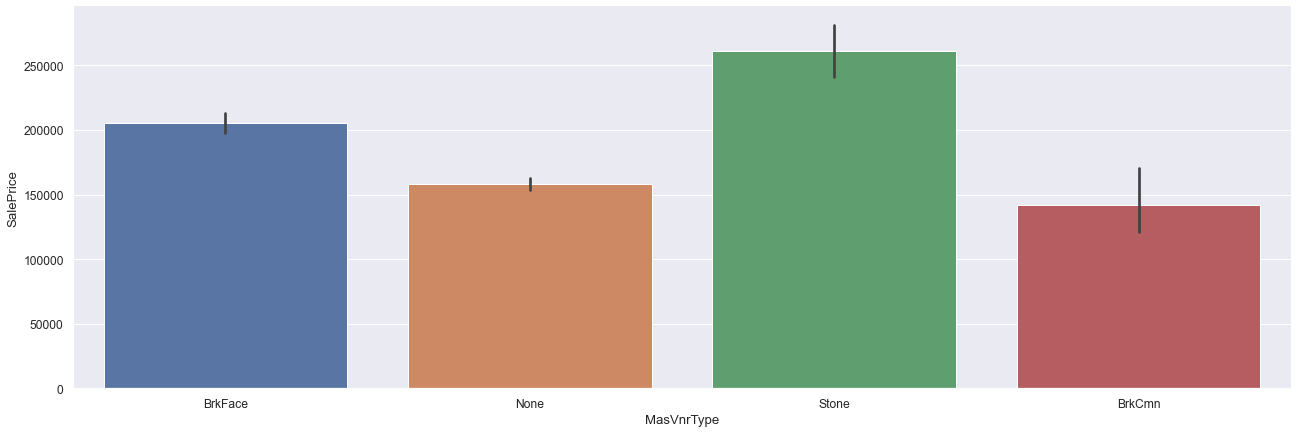

In [928]:
sns.catplot(y='SalePrice',x='MasVnrType',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

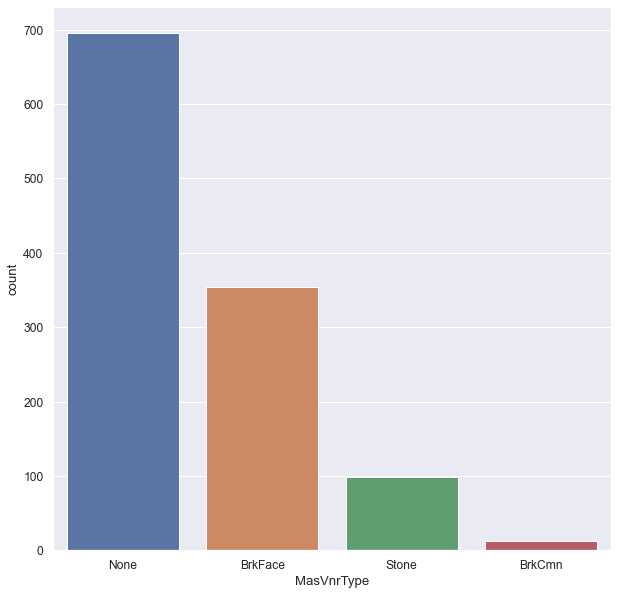

In [929]:
plt.figure(figsize=(10,10))
sns.countplot(df.MasVnrType)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'None'),
  Text(1, 0, 'BrkFace'),
  Text(2, 0, 'Stone'),
  Text(3, 0, 'BrkCmn')])

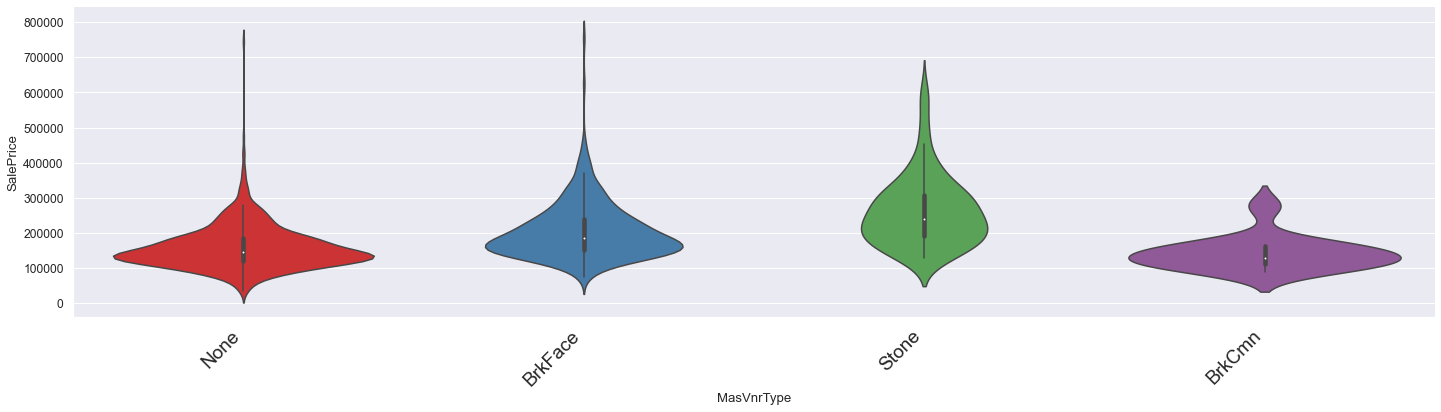

In [930]:
sns.set(font_scale=1.1)
sns.catplot(x='MasVnrType',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

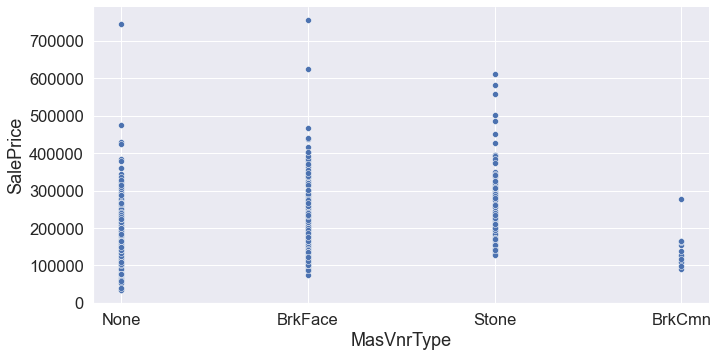

In [931]:
sns.set(font_scale=1.5)
sns.relplot(x='MasVnrType',y='SalePrice',data=df,aspect=2,palette='Set1')


in few cases stone Masonry veneer type is costlier than brick face ,mostly people dont have Masonry veneer type

__MasVnrArea: Masonry veneer area in square feet__

In [932]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode(),inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].mode(),inplace=True)


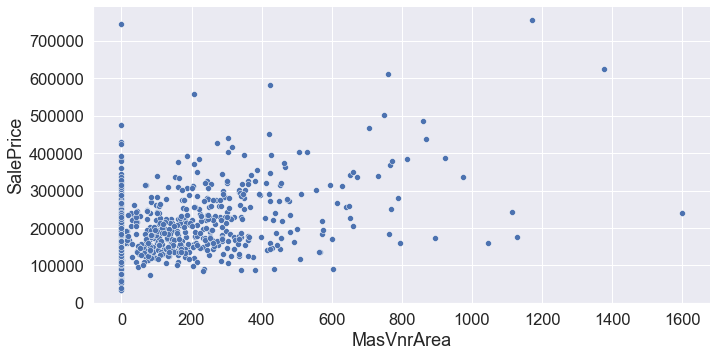

In [933]:
sns.set(font_scale=1.5)
sns.relplot(x='MasVnrArea',y='SalePrice',data=df,aspect=2,palette='Set1')

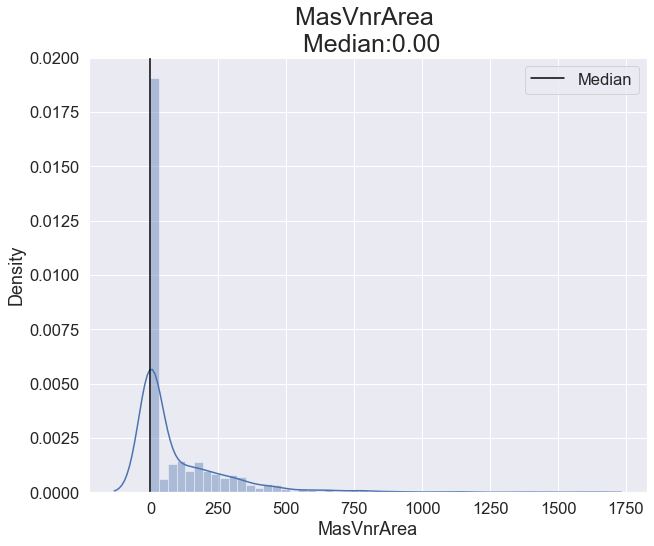

In [934]:
plt.figure(figsize=(10,8))
sns.distplot(df['MasVnrArea'])
plt.title('MasVnrArea \n Median:{0:.2f}'.format(df['MasVnrArea'].median()),size=25)
plt.axvline(df["MasVnrArea"].median(),color='black',label='Median')
plt.legend()

if mansory veneer is used, then thats square foot area used bu house is mostly between 0-400 square foot only, although maximum house doesnt have it

In [935]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

__ExterQual__

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [936]:
df.ExterQual.value_counts()


TA    717
Gd    391
Ex     42
Fa     11
Name: ExterQual, dtype: int64

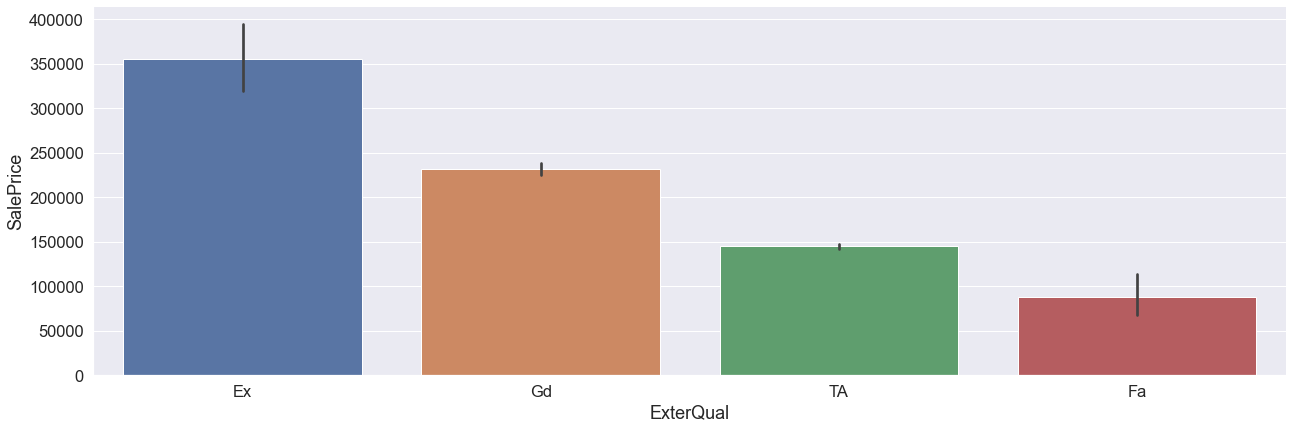

In [937]:
sns.catplot(y='SalePrice',x='ExterQual',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

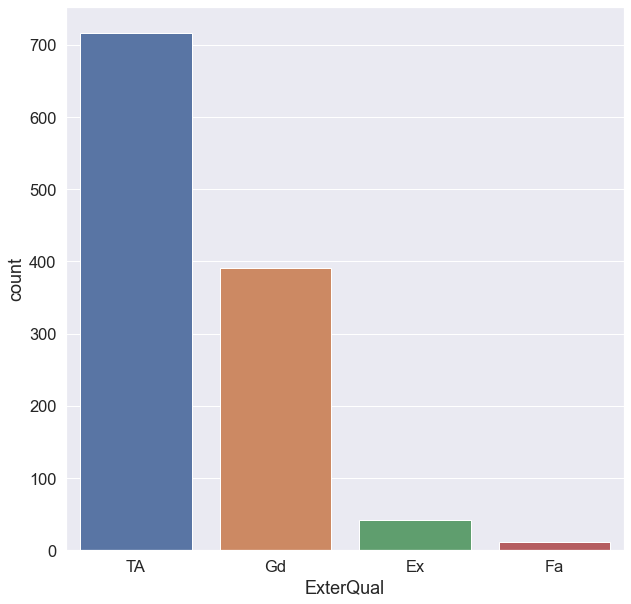

In [938]:
plt.figure(figsize=(10,10))
sns.countplot(df.ExterQual)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

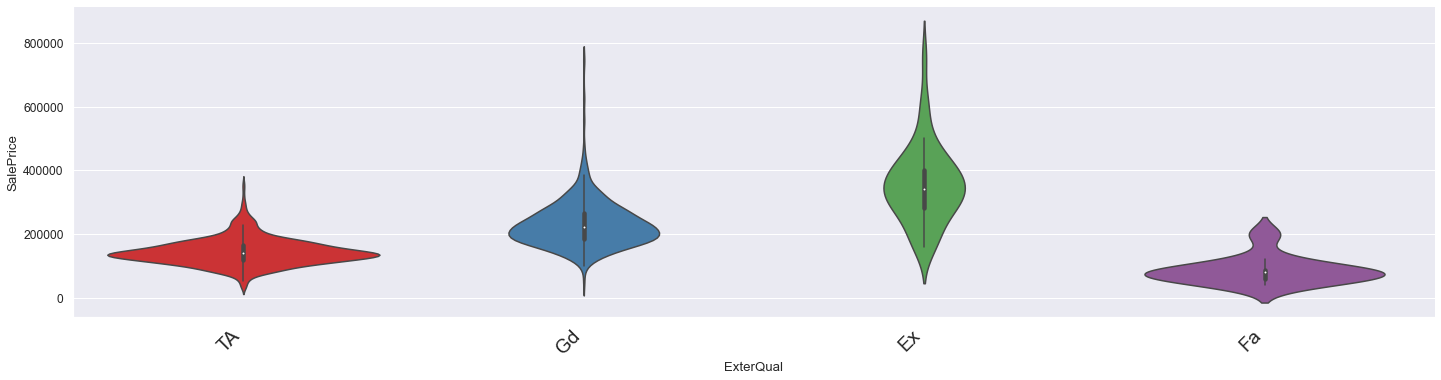

In [939]:
sns.set(font_scale=1.1)
sns.catplot(x='ExterQual',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

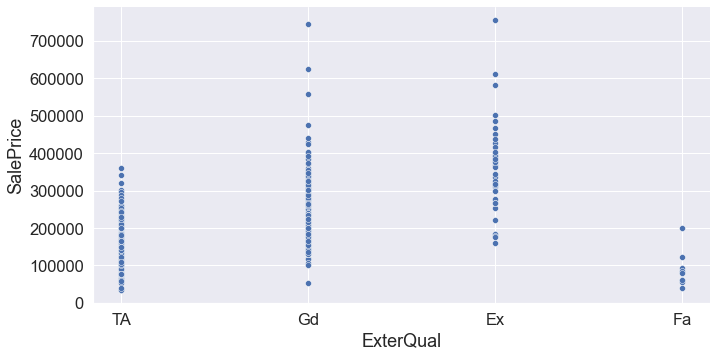

In [940]:
sns.set(font_scale=1.5)
sns.relplot(x='ExterQual',y='SalePrice',data=df,aspect=2,palette='Set1')


 quality of the material on the exterior is mostly average or good, if the  quality of the material on the exterior is good or excellent, a higher range of sales prices are there for houses

__ExterCond__

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [941]:
df.ExterCond.value_counts()


TA    1015
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

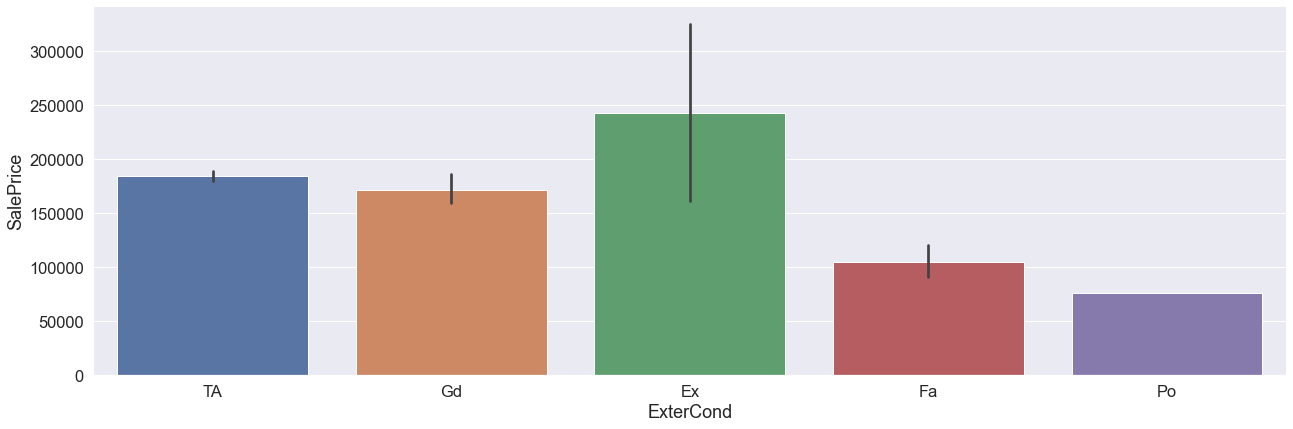

In [942]:
sns.catplot(y='SalePrice',x='ExterCond',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

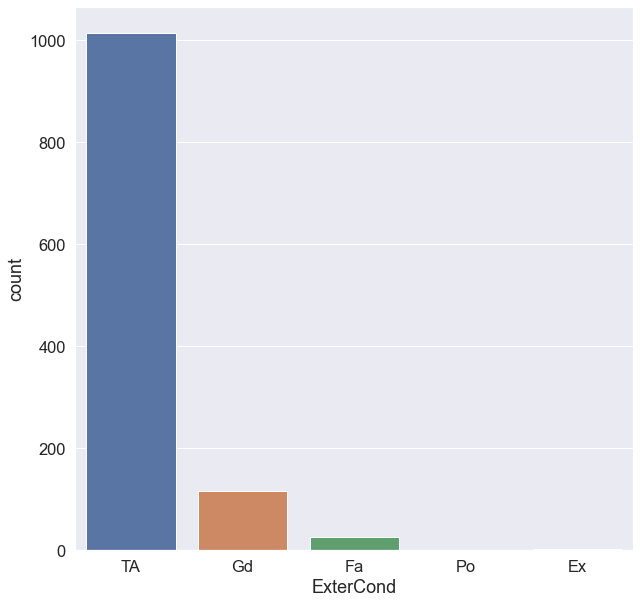

In [943]:
plt.figure(figsize=(10,10))
sns.countplot(df.ExterCond)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'Fa'),
  Text(3, 0, 'Po'),
  Text(4, 0, 'Ex')])

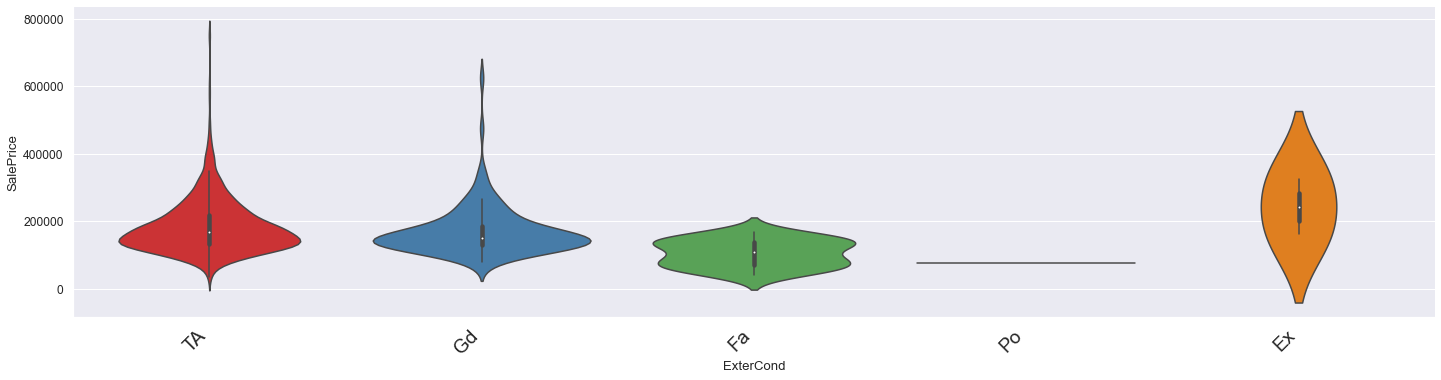

In [944]:
sns.set(font_scale=1.1)
sns.catplot(x='ExterCond',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

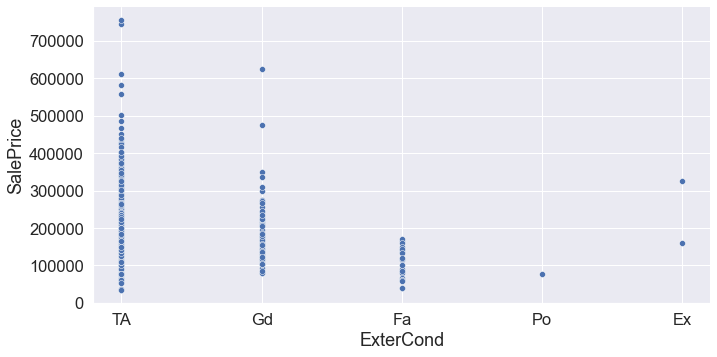

In [945]:
sns.set(font_scale=1.5)
sns.relplot(x='ExterCond',y='SalePrice',data=df,aspect=2,palette='Set1')

the present condition of the material on the exterior is mostly average or good and typical the present condition of the material on the exterior have high ranges of sale prices as well

__Foundation__

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [946]:
df.Foundation.value_counts()


CBlock    516
PConc     506
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

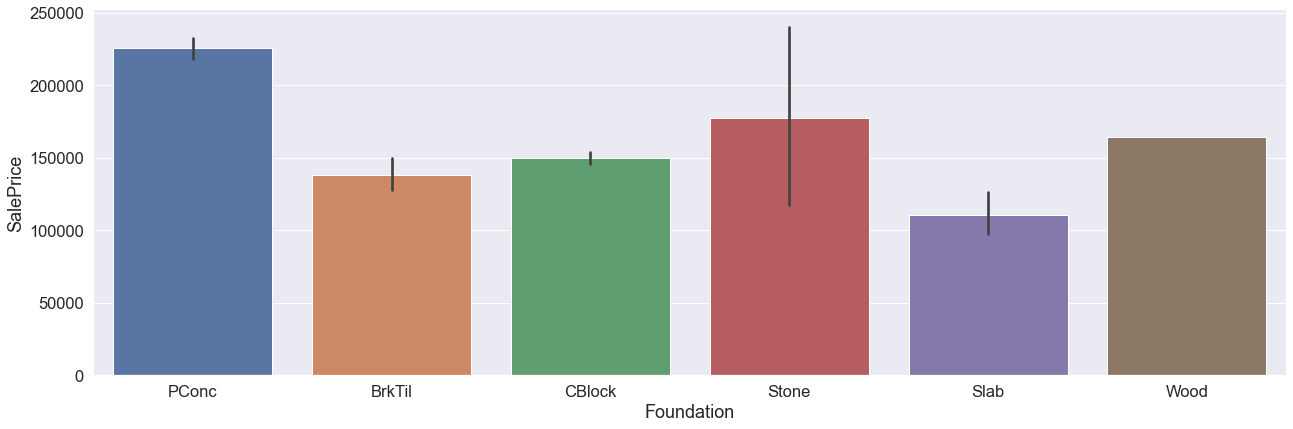

In [947]:
sns.catplot(y='SalePrice',x='Foundation',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Foundation', ylabel='count'>

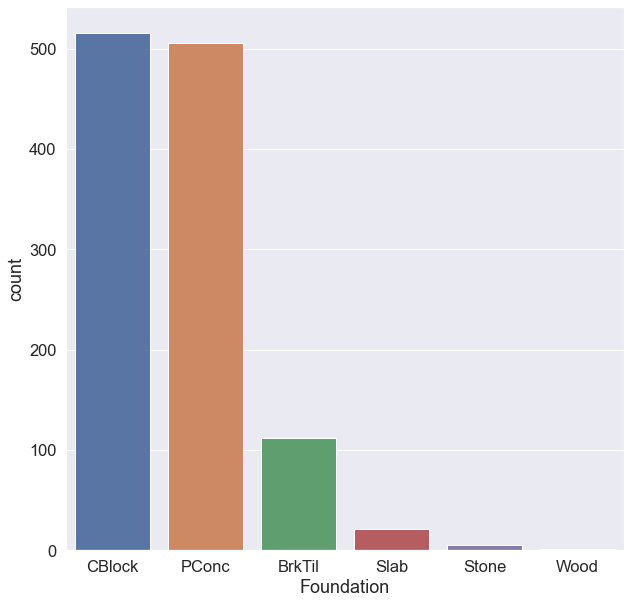

In [948]:
plt.figure(figsize=(10,10))
sns.countplot(df.Foundation)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CBlock'),
  Text(1, 0, 'PConc'),
  Text(2, 0, 'BrkTil'),
  Text(3, 0, 'Slab'),
  Text(4, 0, 'Stone'),
  Text(5, 0, 'Wood')])

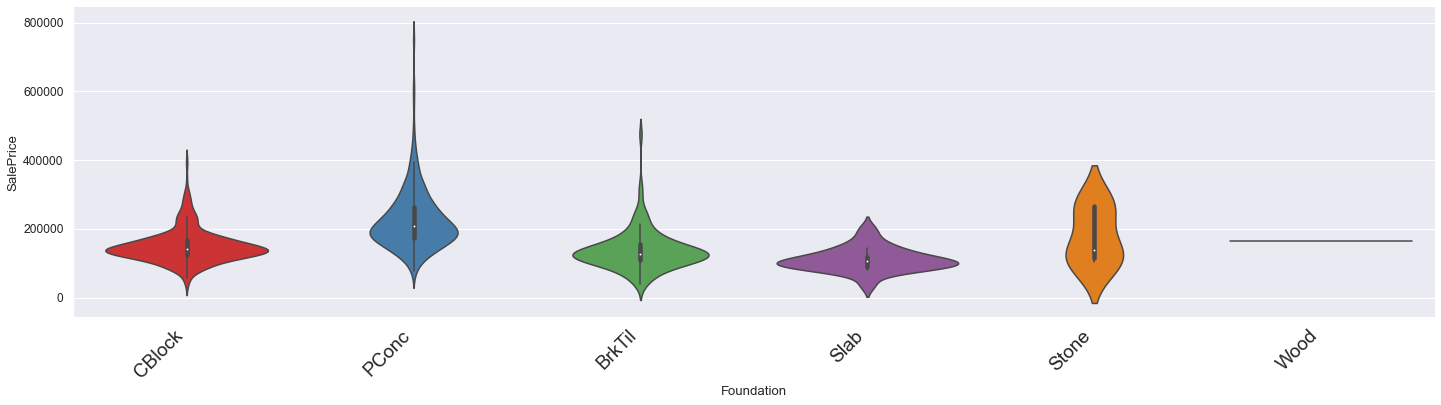

In [949]:
sns.set(font_scale=1.1)
sns.catplot(x='Foundation',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

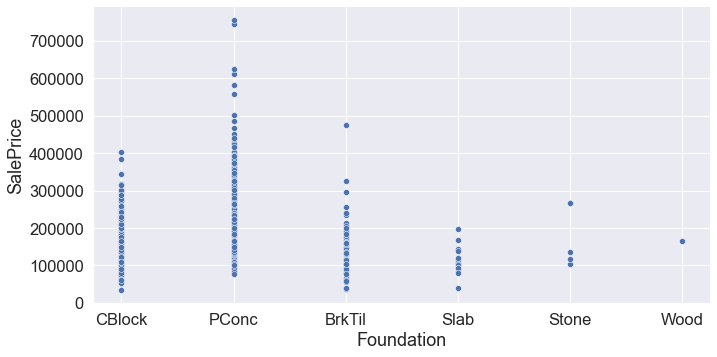

In [950]:
sns.set(font_scale=1.5)
sns.relplot(x='Foundation',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly the type of foundation used while construction is Cinder Block and Poured Contrete

__BsmtQual__

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [951]:
df.dropna(subset = ['BsmtQual'],how ='all',inplace =True)
df.dropna(subset = ['BsmtQual'],how ='all',inplace =True)


In [952]:
df.BsmtQual.value_counts()


TA    516
Gd    493
Ex     93
Fa     29
Name: BsmtQual, dtype: int64

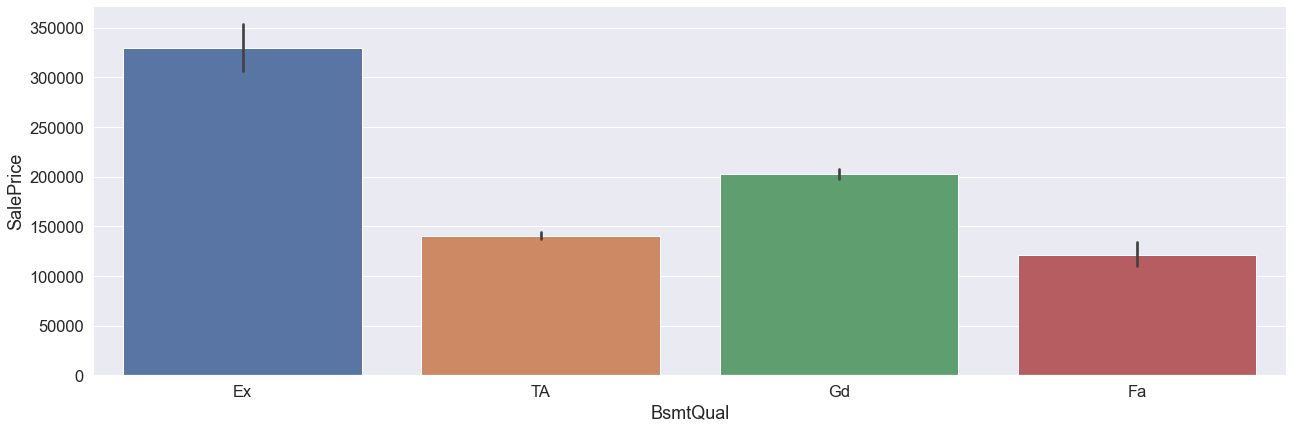

In [953]:
sns.catplot(y='SalePrice',x='BsmtQual',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

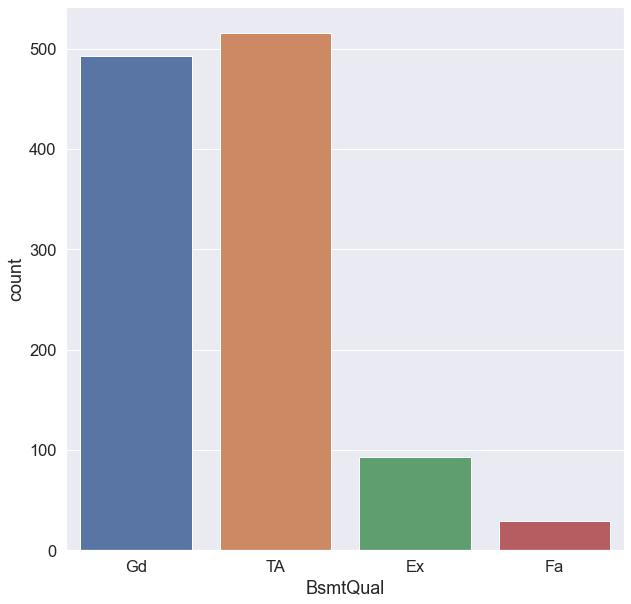

In [954]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtQual)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

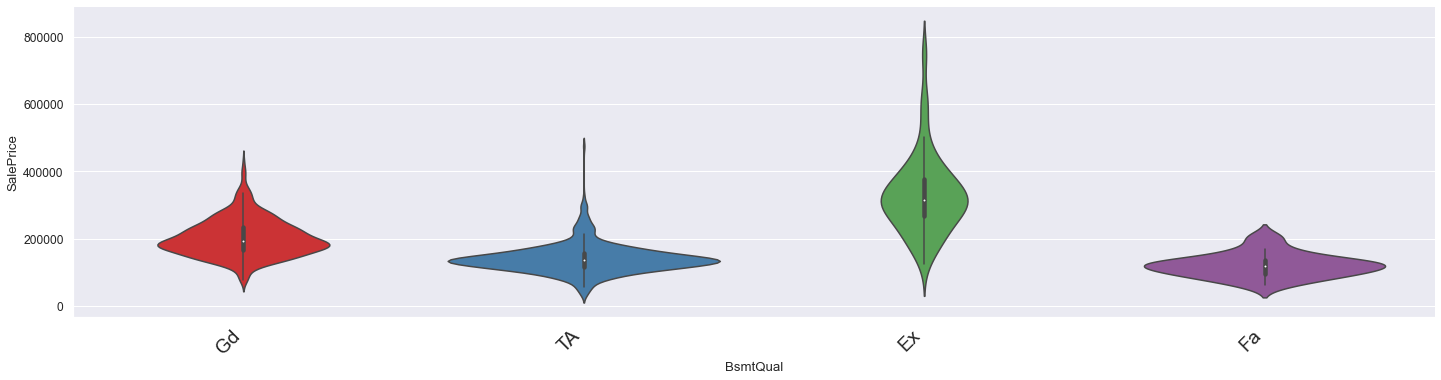

In [955]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtQual',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

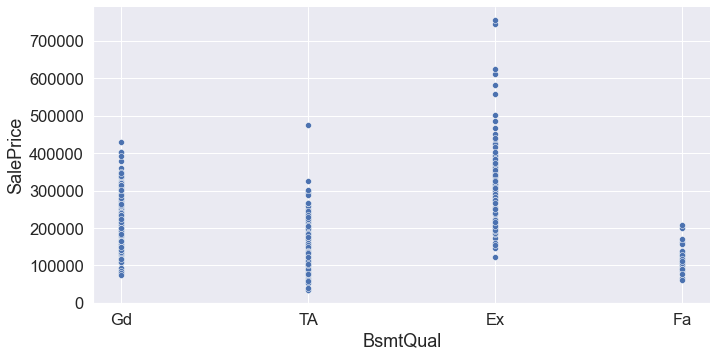

In [956]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtQual',y='SalePrice',data=df,aspect=2,palette='Set1')

the height of the basement is mostly typical or good between 80-100 inces , having excellent quality is ranging in higher sale prices.

__BsmtCond__

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [957]:
df.dropna(subset = ['BsmtCond'],how ='all',inplace =True)
df.dropna(subset = ['BsmtCond'],how ='all',inplace =True)


In [958]:
df.BsmtCond.value_counts()


TA    1035
Gd      55
Fa      39
Po       2
Name: BsmtCond, dtype: int64

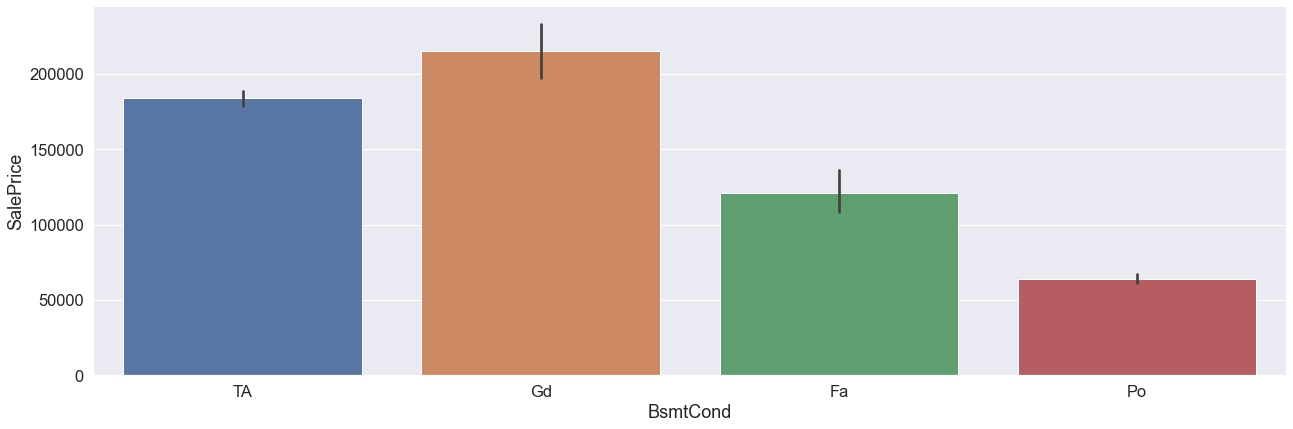

In [959]:
sns.catplot(y='SalePrice',x='BsmtCond',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

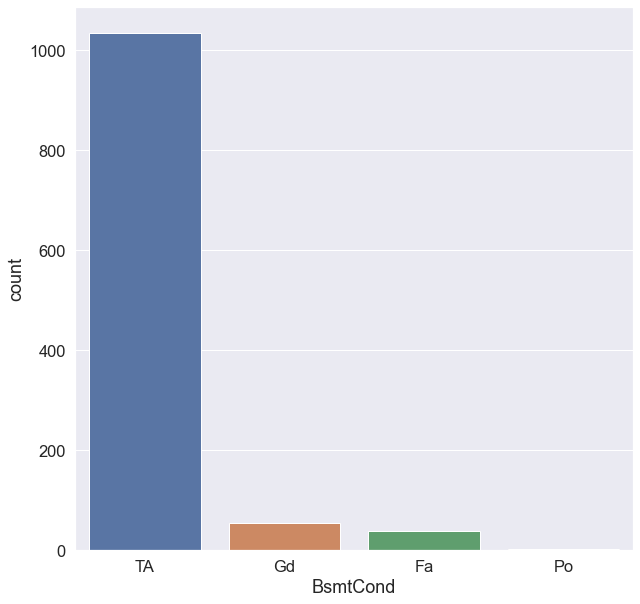

In [960]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtCond)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Fa'), Text(3, 0, 'Po')])

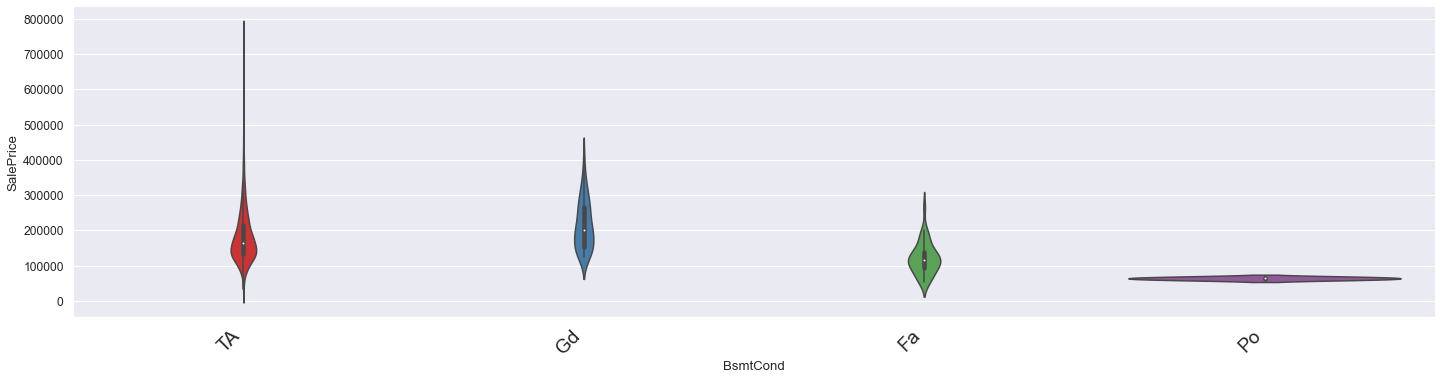

In [961]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtCond',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

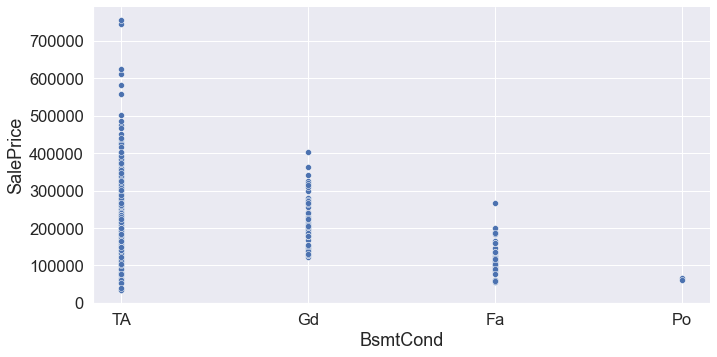

In [962]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtCond',y='SalePrice',data=df,aspect=2,palette='Set1')

the general condition of the basement mostly is typical where slightly dampness is allowed in most of the houses

__BsmtExposure__

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [963]:
df.dropna(subset = ['BsmtExposure'],how ='all',inplace =True)
df.dropna(subset = ['BsmtExposure'],how ='all',inplace =True)


In [964]:
df.BsmtExposure.value_counts()


No    750
Av    180
Gd    107
Mn     93
Name: BsmtExposure, dtype: int64

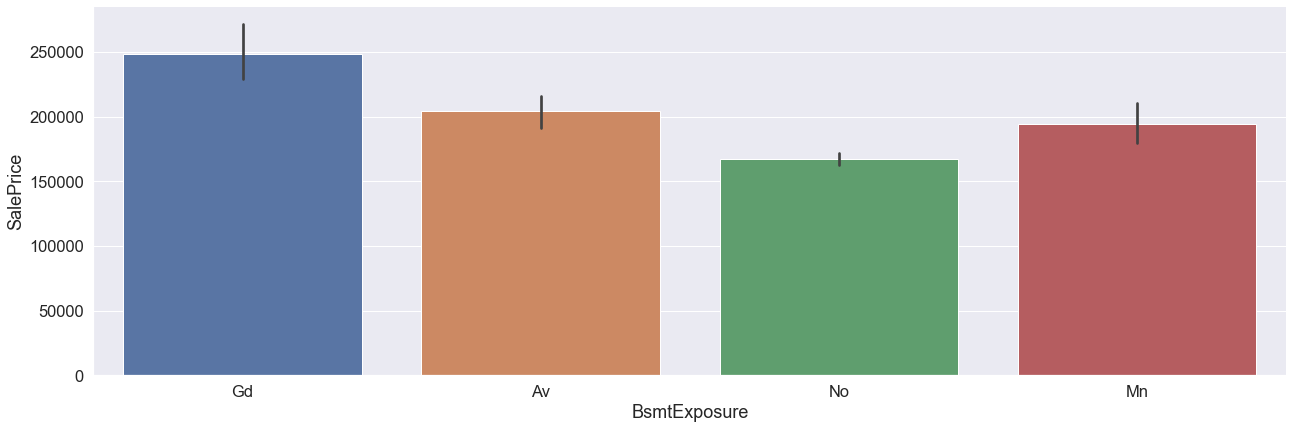

In [965]:
sns.catplot(y='SalePrice',x='BsmtExposure',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

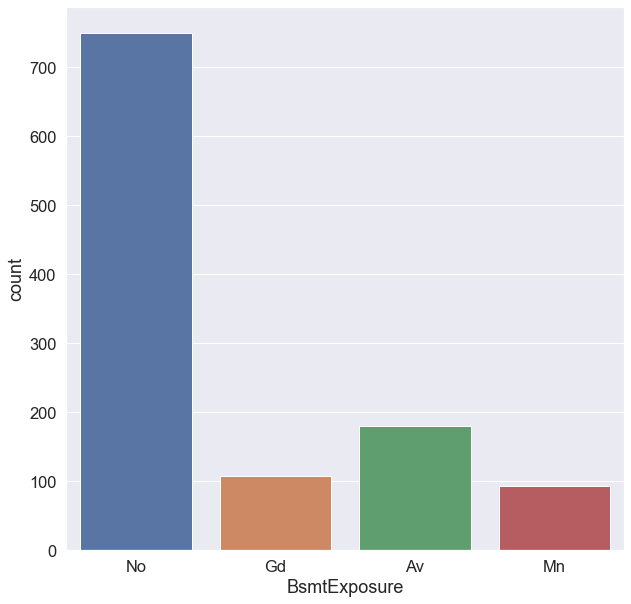

In [966]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtExposure)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Av'), Text(3, 0, 'Mn')])

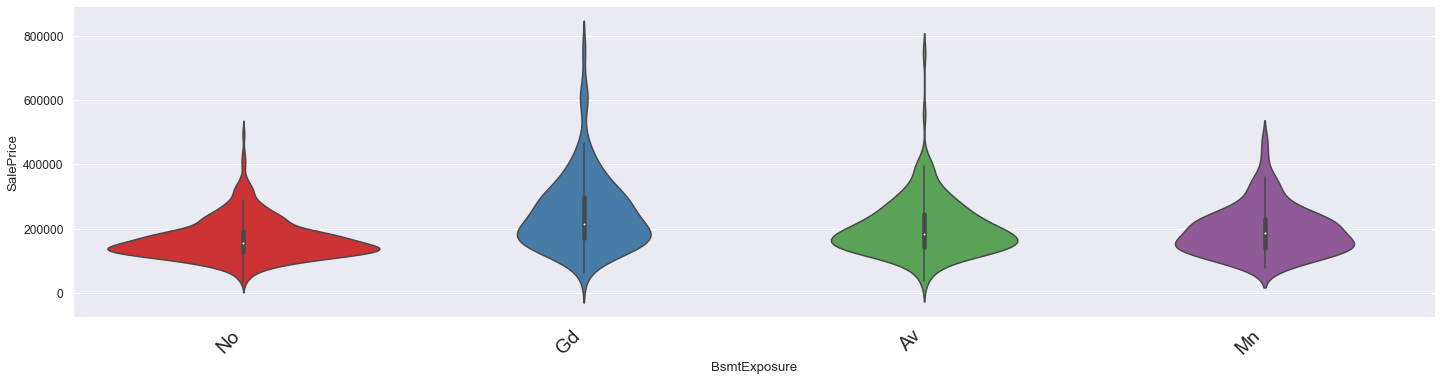

In [967]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtExposure',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

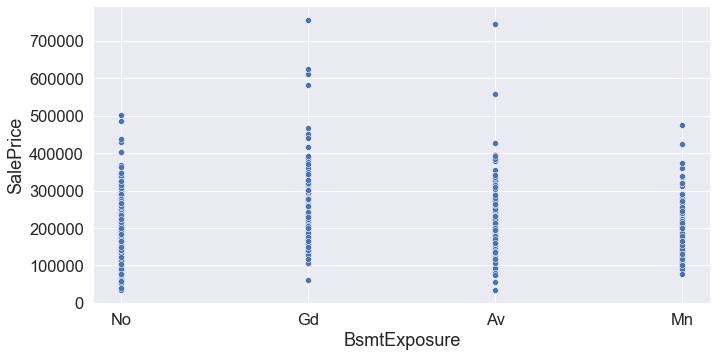

In [968]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtExposure',y='SalePrice',data=df,aspect=2,palette='Set1')


walkout or garden level walls mostly isnt there in maximum houses, only 200 houses have typical or good exposure

In [969]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 9
Missing values in the dataset : 
  ['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  \
0          TA     Attchd       1977.0          RFn         TA         TA   
1          TA     Attchd       1970.0          Unf         TA         TA   
2          TA     Attchd       1997.0          Unf         TA         TA   
3          TA     Attchd       1977.0          RFn         TA         TA   
4          TA     Attchd       1977.0          Fin         TA         TA   

  PoolQC  Fence MiscFeature  
0    NaN    NaN         NaN  
1    NaN    NaN         NaN  
2    NaN    NaN         NaN  
3    NaN  MnPrv         NaN  
4    NaN    NaN         NaN

In [970]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

FireplaceQu 46.5487 % Missing Values
GarageType 5.1327 % Missing Values
GarageYrBlt 5.1327 % Missing Values
GarageFinish 5.1327 % Missing Values
GarageQual 5.1327 % Missing Values
GarageCond 5.1327 % Missing Values
PoolQC 99.3805 % Missing Values
Fence 79.3805 % Missing Values
MiscFeature 96.2832 % Missing Values


__BsmtFinType1__

Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [971]:
df.BsmtFinType1.value_counts()


Unf    342
GLQ    326
ALQ    174
BLQ    121
Rec    108
LwQ     59
Name: BsmtFinType1, dtype: int64

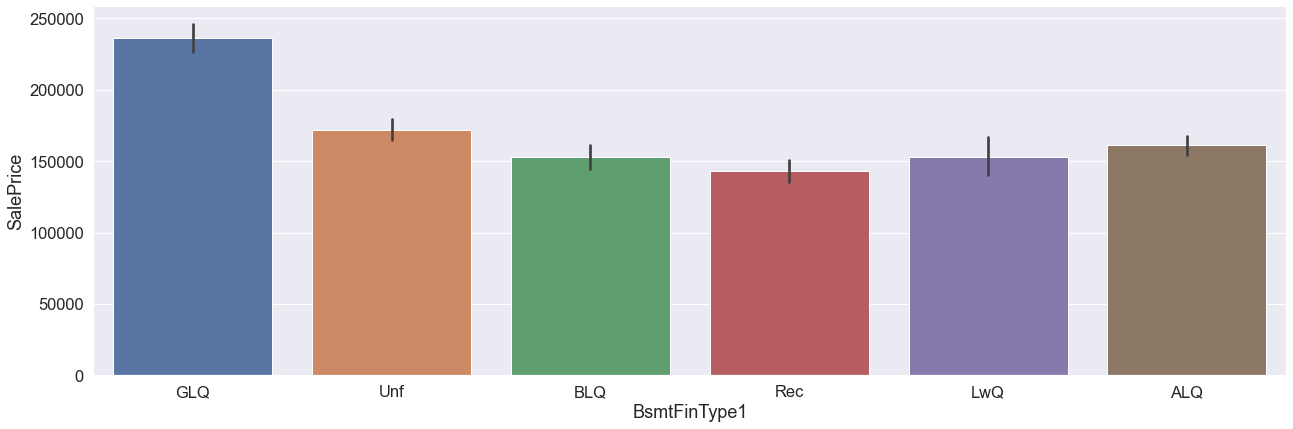

In [972]:
sns.catplot(y='SalePrice',x='BsmtFinType1',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

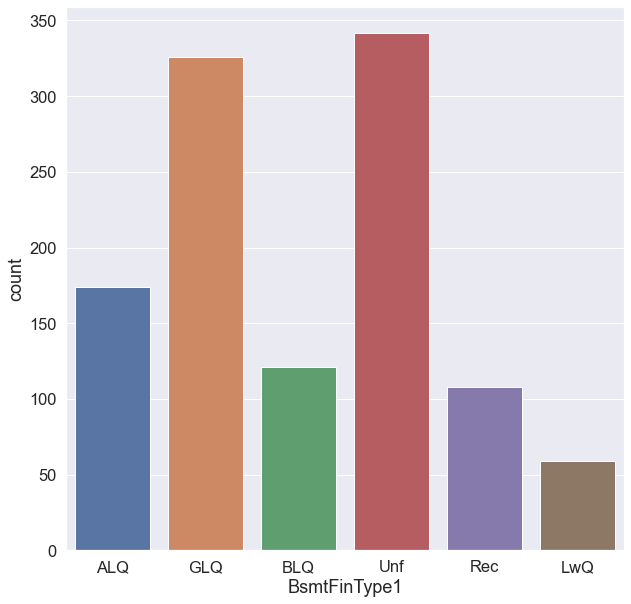

In [973]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtFinType1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ALQ'),
  Text(1, 0, 'GLQ'),
  Text(2, 0, 'BLQ'),
  Text(3, 0, 'Unf'),
  Text(4, 0, 'Rec'),
  Text(5, 0, 'LwQ')])

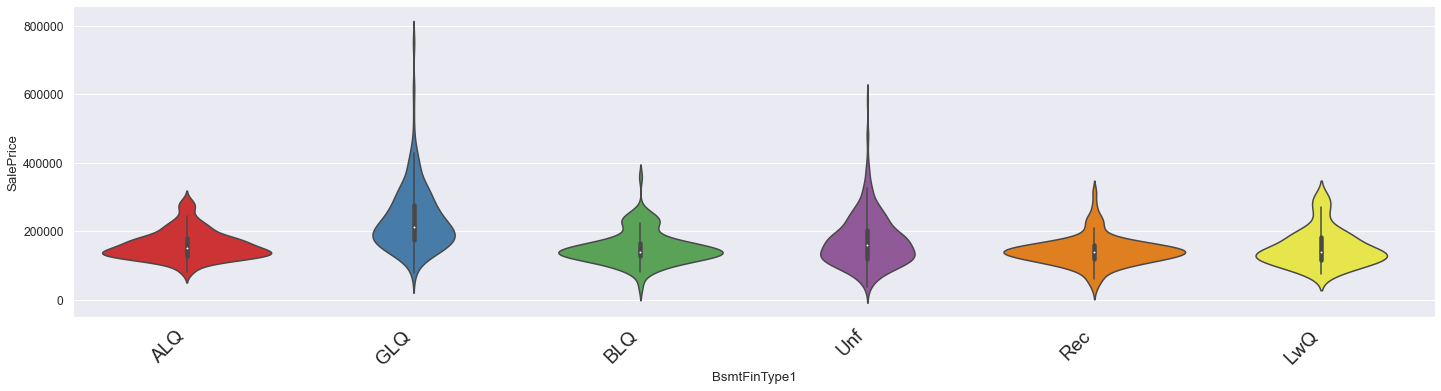

In [974]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtFinType1',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

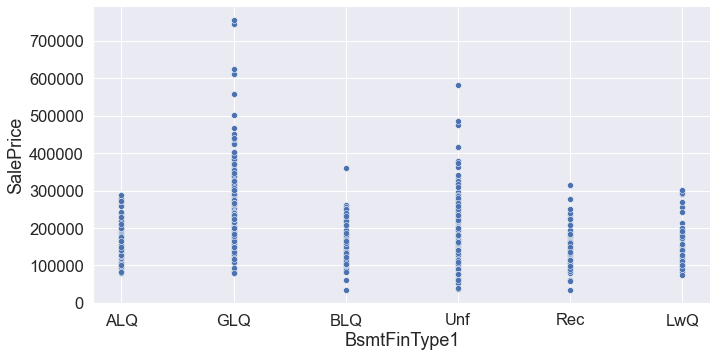

In [975]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtFinType1',y='SalePrice',data=df,aspect=2,palette='Set1')

Rating of basement finished area is either good living quaters to live in or either unfinished, maximum house have average Rating of basement finished area and few have low qualiy only

__BsmtFinSF1: Type 1 finished square feet__

In [976]:
df.BsmtFinSF1.value_counts()


0       342
24       10
16        8
20        5
616       5
       ... 
617       1
1064      1
620       1
622       1
1904      1
Name: BsmtFinSF1, Length: 548, dtype: int64

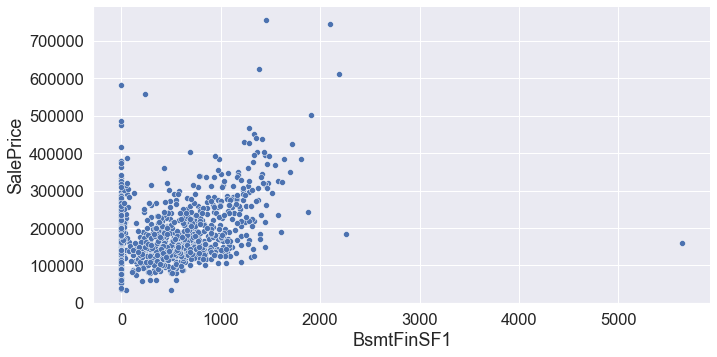

In [977]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtFinSF1',y='SalePrice',data=df,aspect=2,palette='Set1')

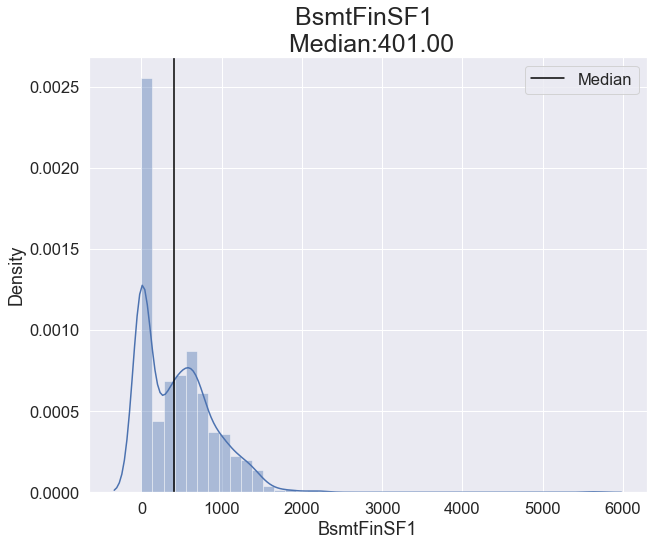

In [978]:
plt.figure(figsize=(10,8))
sns.distplot(df['BsmtFinSF1'])
plt.title('BsmtFinSF1 \n Median:{0:.2f}'.format(df['BsmtFinSF1'].median()),size=25)
plt.axvline(df["BsmtFinSF1"].median(),color='black',label='Median')
plt.legend()

the basement finished for type1  square feet area have median of 400sq feet and maximum value for basement square feet is between 0-1000 sq feet only.

__BsmtUnfSF: Unfinished square feet of basement area__

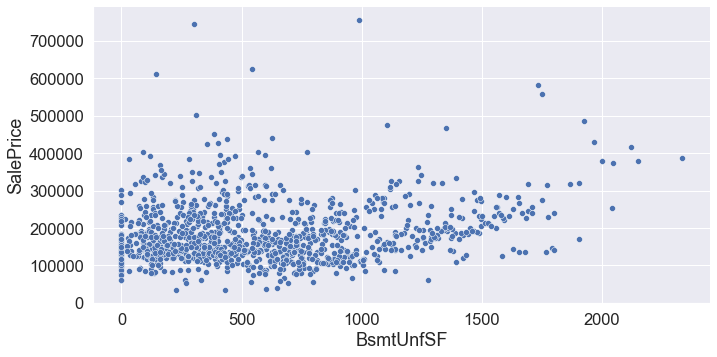

In [979]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtUnfSF',y='SalePrice',data=df,aspect=2,palette='Set1')

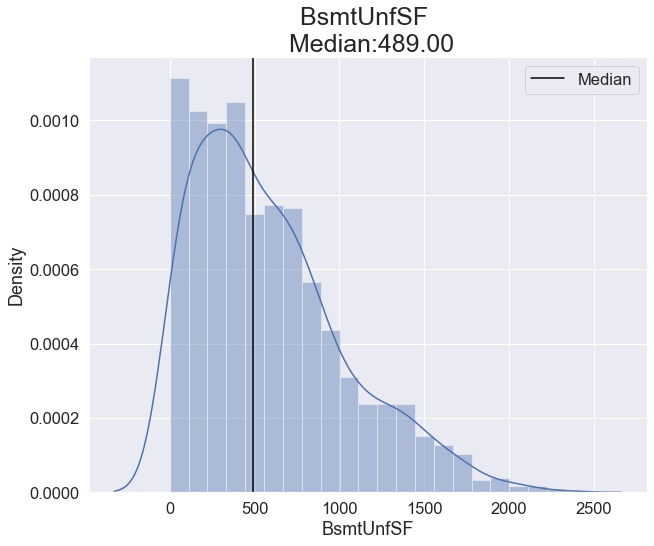

In [980]:
plt.figure(figsize=(10,8))
sns.distplot(df['BsmtUnfSF'])
plt.title('BsmtUnfSF \n Median:{0:.2f}'.format(df['BsmtUnfSF'].median()),size=25)
plt.axvline(df["BsmtUnfSF"].median(),color='black',label='Median')
plt.legend()

the basement unfinished for type1  square feet area have median of 500sq feet and maximum value for basement unfinished square feet is between 0-1000 sq feet only.

__TotalBsmtSF: Total square feet of basement area__

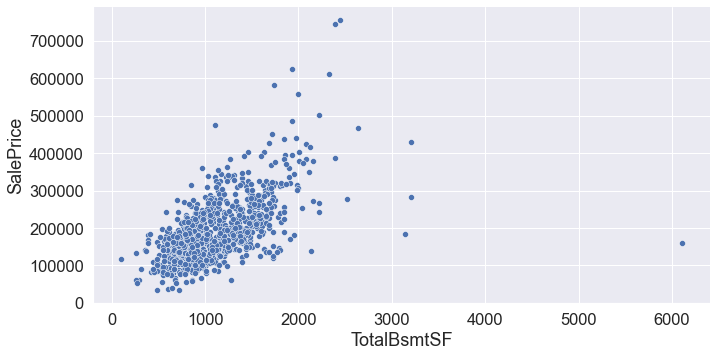

In [981]:
sns.set(font_scale=1.5)
sns.relplot(x='TotalBsmtSF',y='SalePrice',data=df,aspect=2,palette='Set1')

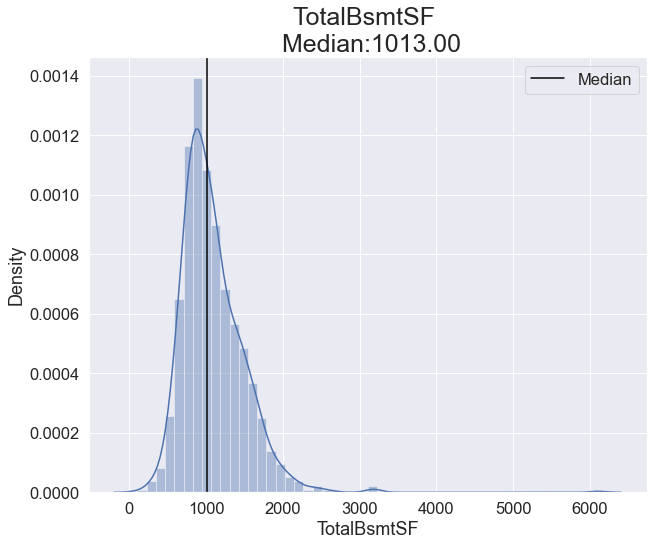

In [982]:
plt.figure(figsize=(10,8))
sns.distplot(df['TotalBsmtSF'])
plt.title('TotalBsmtSF \n Median:{0:.2f}'.format(df['TotalBsmtSF'].median()),size=25)
plt.axvline(df["TotalBsmtSF"].median(),color='black',label='Median')
plt.legend()

the total square feet of basement area of all houses lies between 0-2000 square feet and also with median of almost 1000 square feet of maximum houses

__Heating__

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [983]:
df.Heating.value_counts()


GasA    1110
GasW      14
Grav       5
OthW       1
Name: Heating, dtype: int64

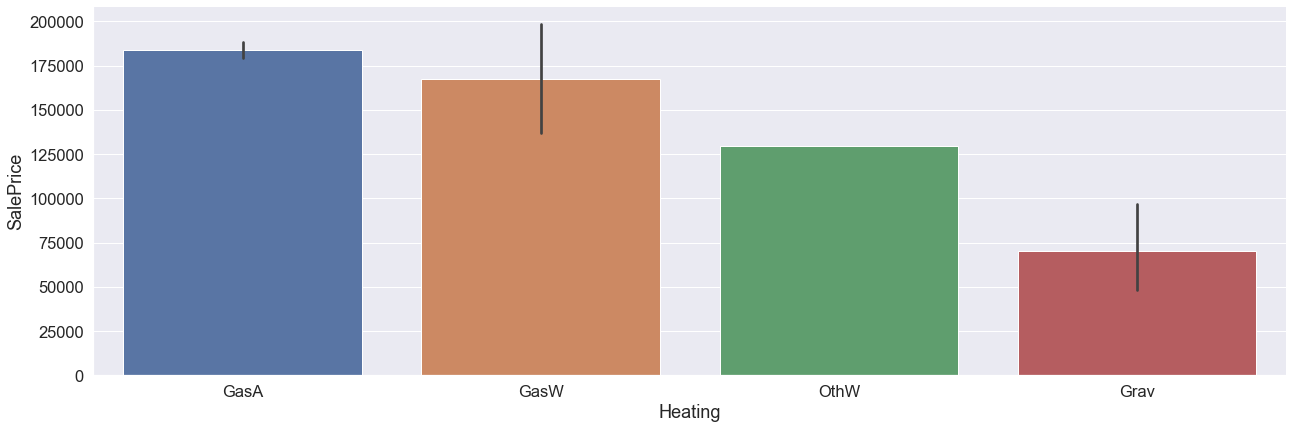

In [984]:
sns.catplot(y='SalePrice',x='Heating',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Heating', ylabel='count'>

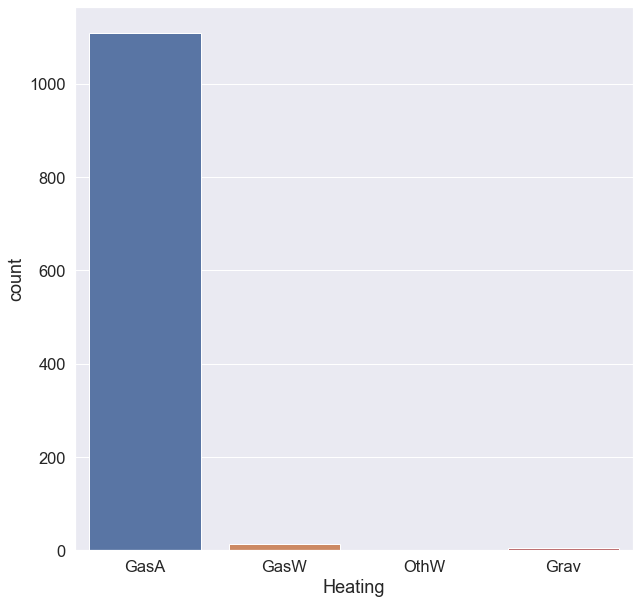

In [985]:
plt.figure(figsize=(10,10))
sns.countplot(df.Heating)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'GasA'),
  Text(1, 0, 'GasW'),
  Text(2, 0, 'OthW'),
  Text(3, 0, 'Grav')])

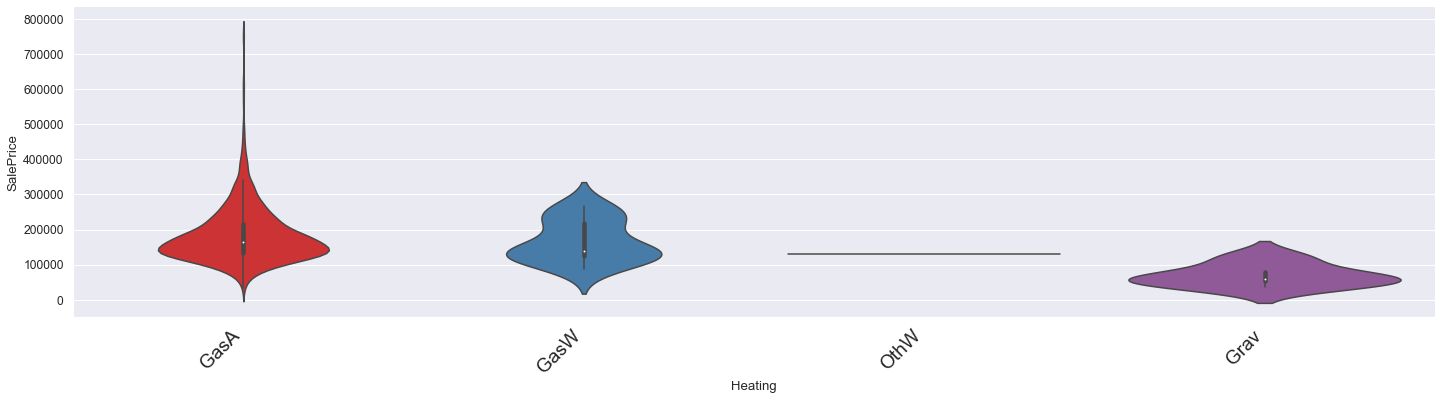

In [986]:
sns.set(font_scale=1.1)
sns.catplot(x='Heating',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

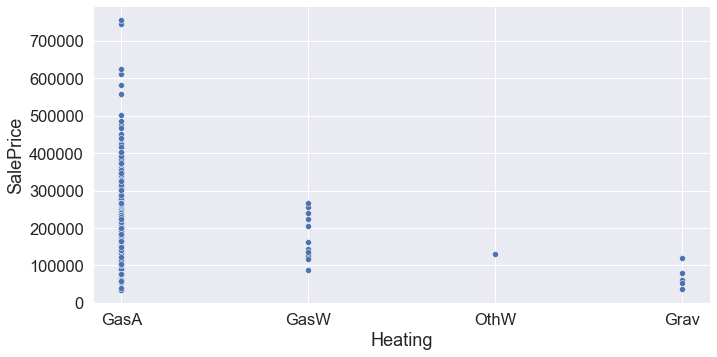

In [987]:
sns.set(font_scale=1.5)
sns.relplot(x='Heating',y='SalePrice',data=df,aspect=2,palette='Set1')

maximum houses have Gas forced warm air furnace and rest have others.

__HeatingQC__

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [988]:
df.HeatingQC.value_counts()


Ex    571
TA    335
Gd    189
Fa     34
Po      1
Name: HeatingQC, dtype: int64

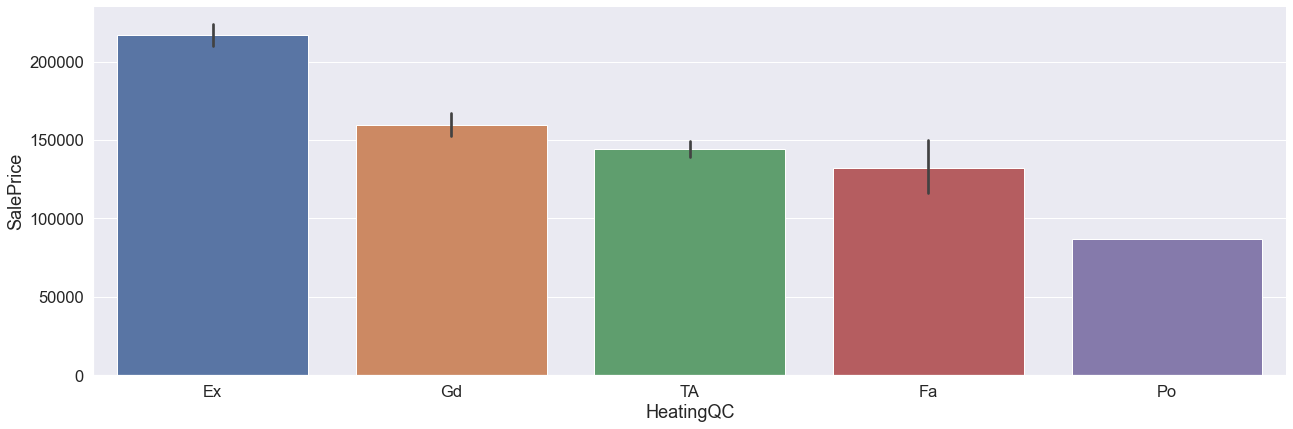

In [989]:
sns.catplot(y='SalePrice',x='HeatingQC',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

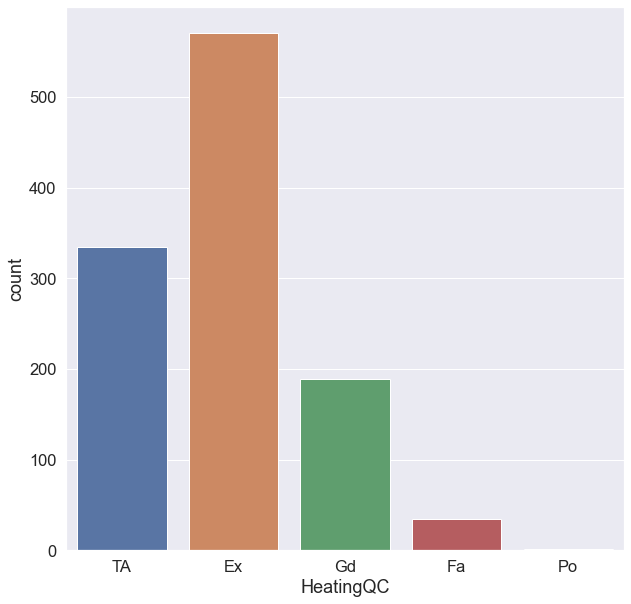

In [990]:
plt.figure(figsize=(10,10))
sns.countplot(df.HeatingQC)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Ex'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Fa'),
  Text(4, 0, 'Po')])

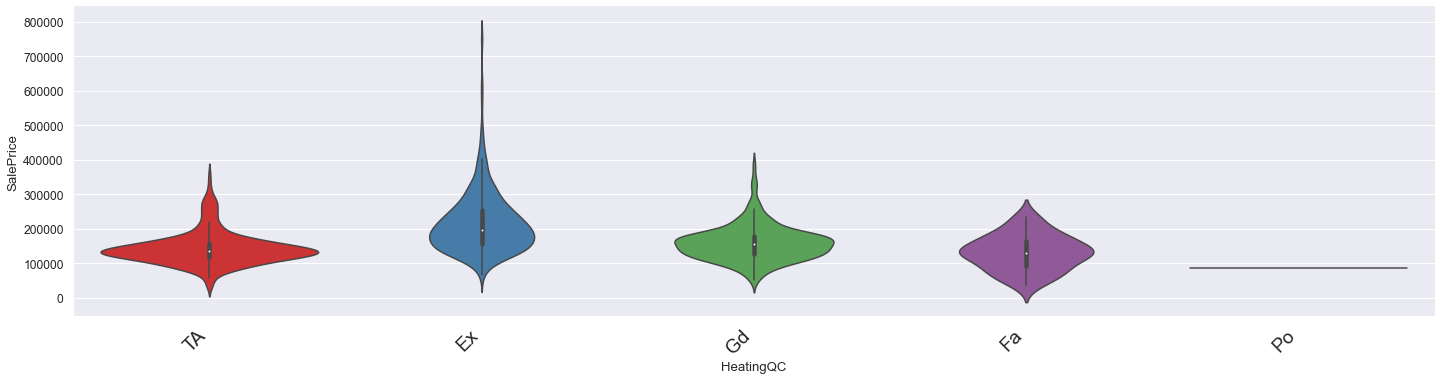

In [991]:
sns.set(font_scale=1.1)
sns.catplot(x='HeatingQC',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

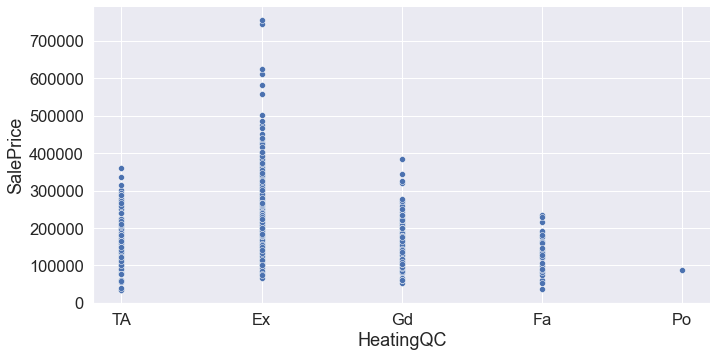

In [992]:
sns.set(font_scale=1.5)
sns.relplot(x='HeatingQC',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly the type of heating have excellent quality or good/average only

__CentralAir: Central air conditioning__

       N	No
       Y	Yes

In [993]:
df.CentralAir.value_counts()


Y    1063
N      67
Name: CentralAir, dtype: int64

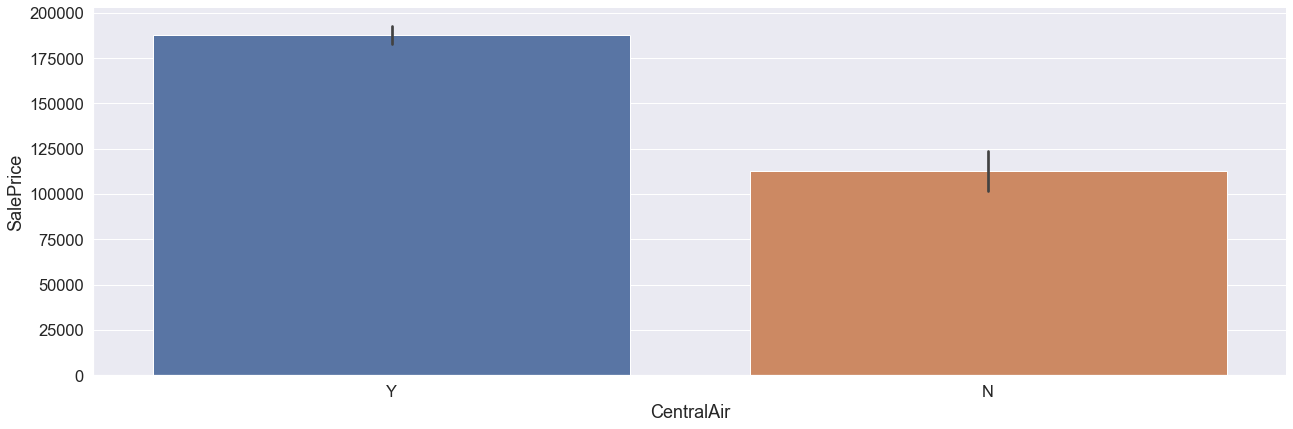

In [994]:
sns.catplot(y='SalePrice',x='CentralAir',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

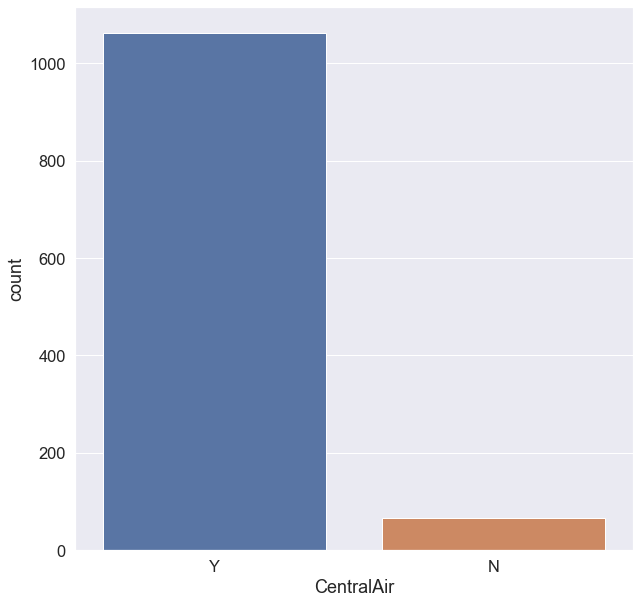

In [995]:
plt.figure(figsize=(10,10))
sns.countplot(df.CentralAir)

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

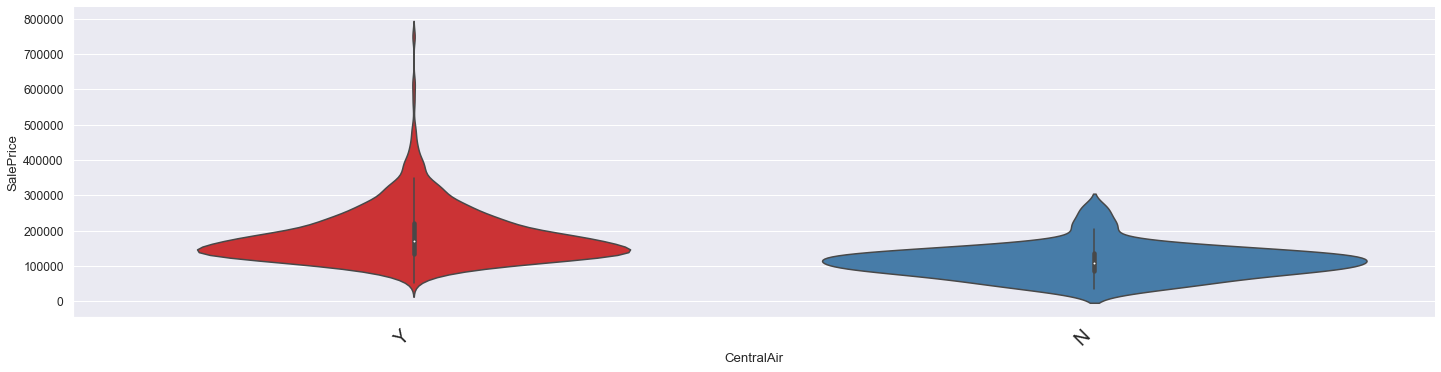

In [996]:
sns.set(font_scale=1.1)
sns.catplot(x='CentralAir',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

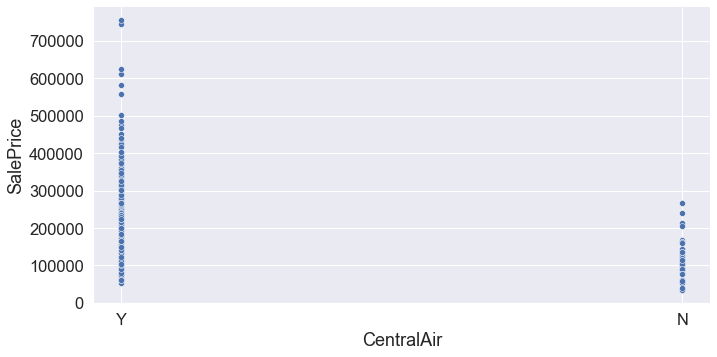

In [997]:
sns.set(font_scale=1.5)
sns.relplot(x='CentralAir',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly all houses have central air cooling system inside but house whose doesnt have central air conditioned facility have low sale price cost

__Electrical: Electrical system__


Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [998]:
df.Electrical.value_counts()


SBrkr    1042
FuseA      69
FuseF      17
Mix         1
FuseP       1
Name: Electrical, dtype: int64

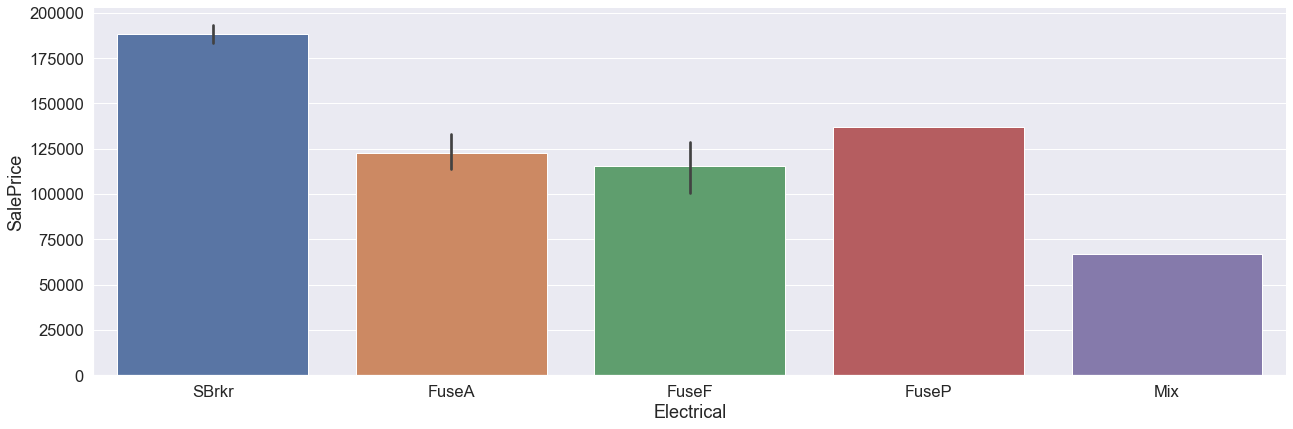

In [999]:
sns.catplot(y='SalePrice',x='Electrical',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Electrical', ylabel='count'>

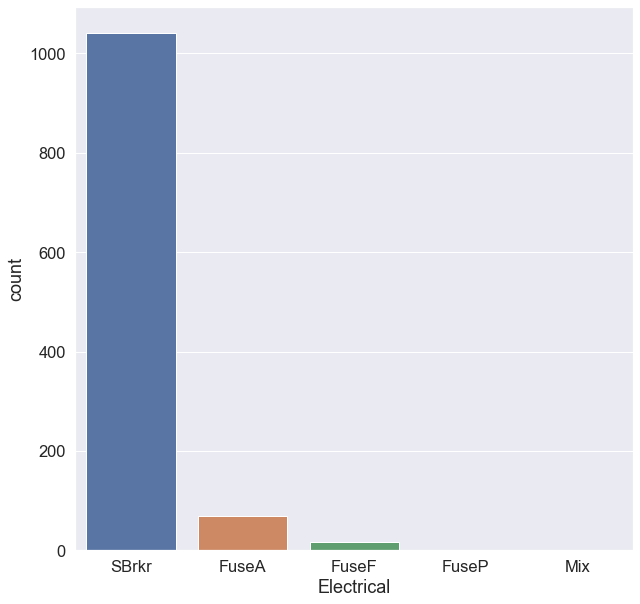

In [1000]:
plt.figure(figsize=(10,10))
sns.countplot(df.Electrical)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SBrkr'),
  Text(1, 0, 'FuseA'),
  Text(2, 0, 'FuseF'),
  Text(3, 0, 'FuseP'),
  Text(4, 0, 'Mix')])

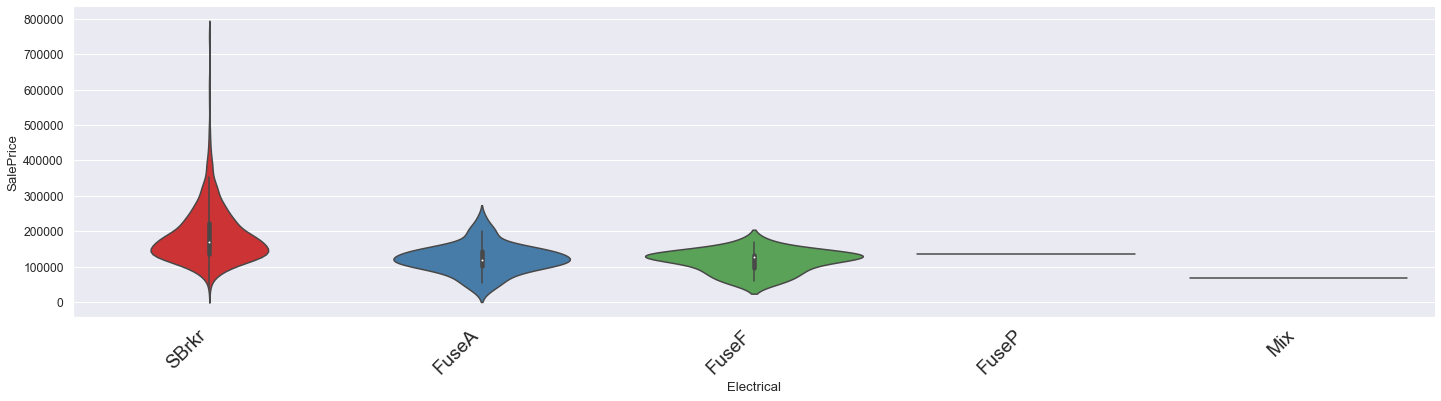

In [1001]:
sns.set(font_scale=1.1)
sns.catplot(x='Electrical',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

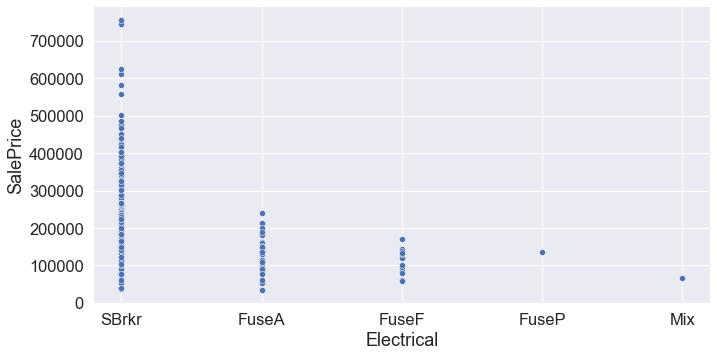

In [1002]:
sns.set(font_scale=1.5)
sns.relplot(x='Electrical',y='SalePrice',data=df,aspect=2,palette='Set1')


maximum houses have Standard Circuit Breakers & Romex in electrical system and houses having other electrical systems have lower cost of sale price of there houses.

__1stFlrSF: First Floor square feet__

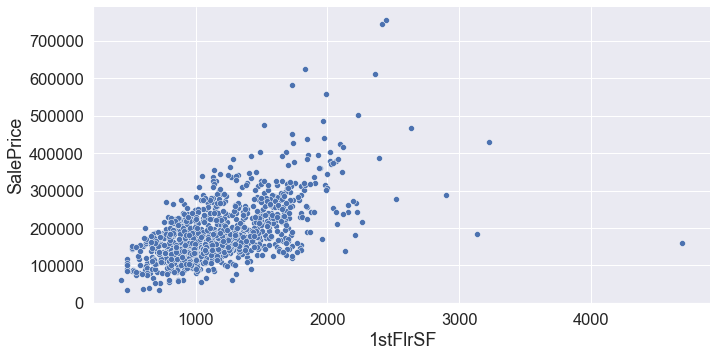

In [1003]:
sns.set(font_scale=1.5)
sns.relplot(x='1stFlrSF',y='SalePrice',data=df,aspect=2,palette='Set1')


first floor square feet is mostly between 0-1500 square foot only.

__2ndFlrSF: Second floor square feet__

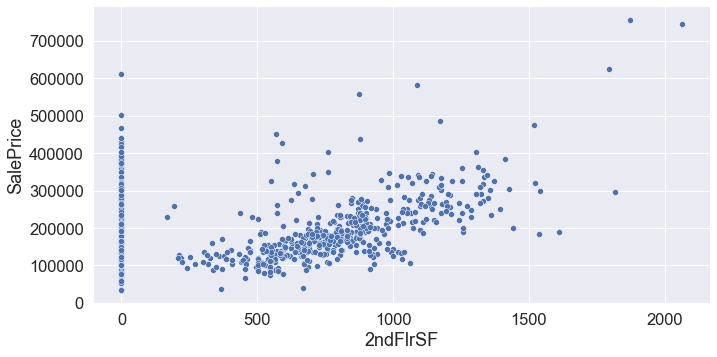

In [1004]:
sns.set(font_scale=1.5)
sns.relplot(x='2ndFlrSF',y='SalePrice',data=df,aspect=2,palette='Set1')


many houses dont have second floor but houses having second floors, its between 500-1000 square feet

__LowQualFinSF: Low quality finished square feet (all floors)__

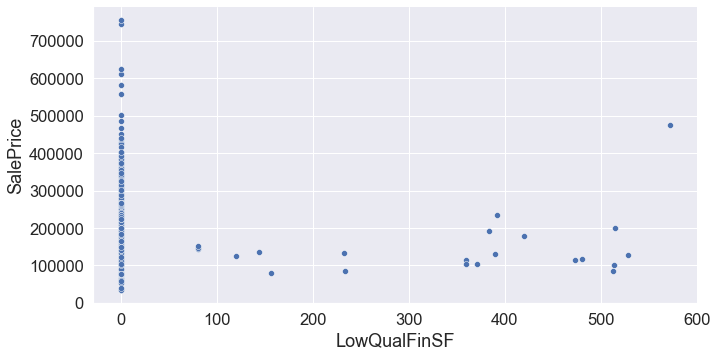

In [1005]:
sns.set(font_scale=1.5)
sns.relplot(x='LowQualFinSF',y='SalePrice',data=df,aspect=2,palette='Set1')

maximum house do not have low quality finished square feet area

__GrLivArea: Above grade (ground) living area square feet__

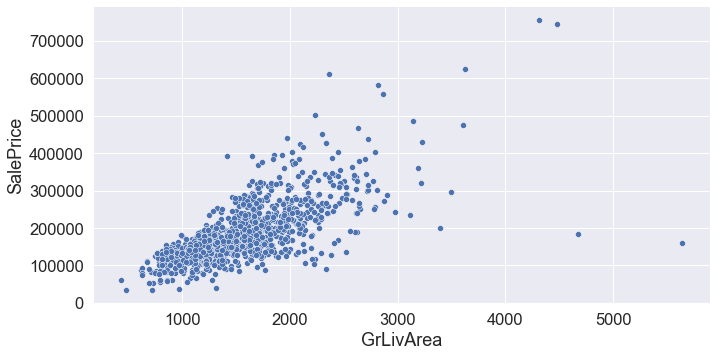

In [1006]:
sns.set(font_scale=1.5)
sns.relplot(x='GrLivArea',y='SalePrice',data=df,aspect=2,palette='Set1')

Above grade (ground) living area square feet is between 1000-2000 square feet for most houses having less than 300000 sale prices

__BsmtFullBath: Basement full bathrooms__

In [1007]:
df.BsmtFullBath.value_counts()


0    653
1    463
2     13
3      1
Name: BsmtFullBath, dtype: int64

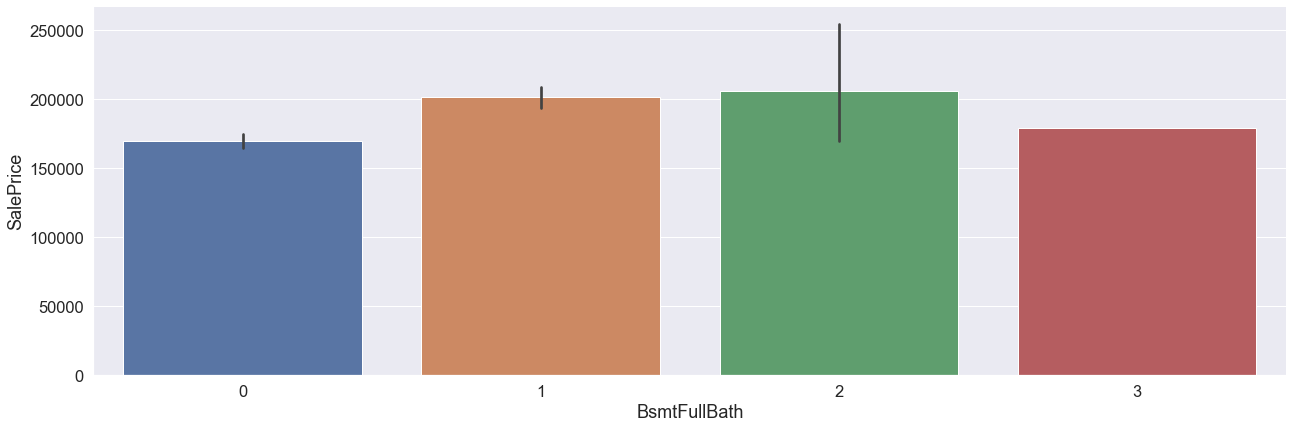

In [1008]:
sns.catplot(y='SalePrice',x='BsmtFullBath',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

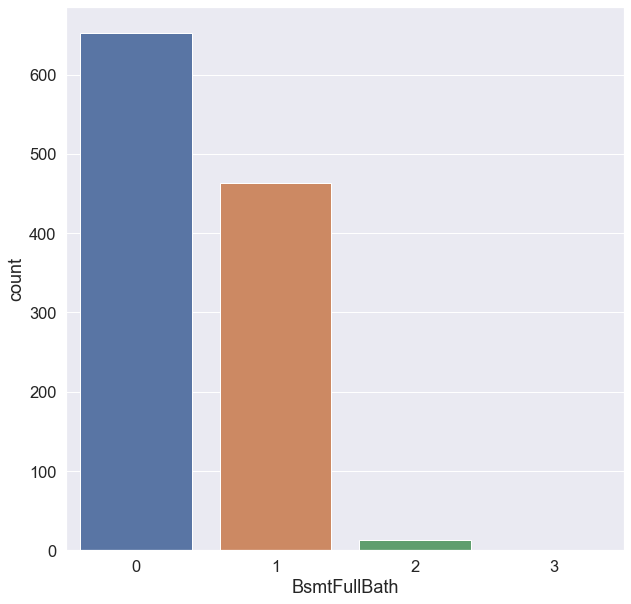

In [1009]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtFullBath)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

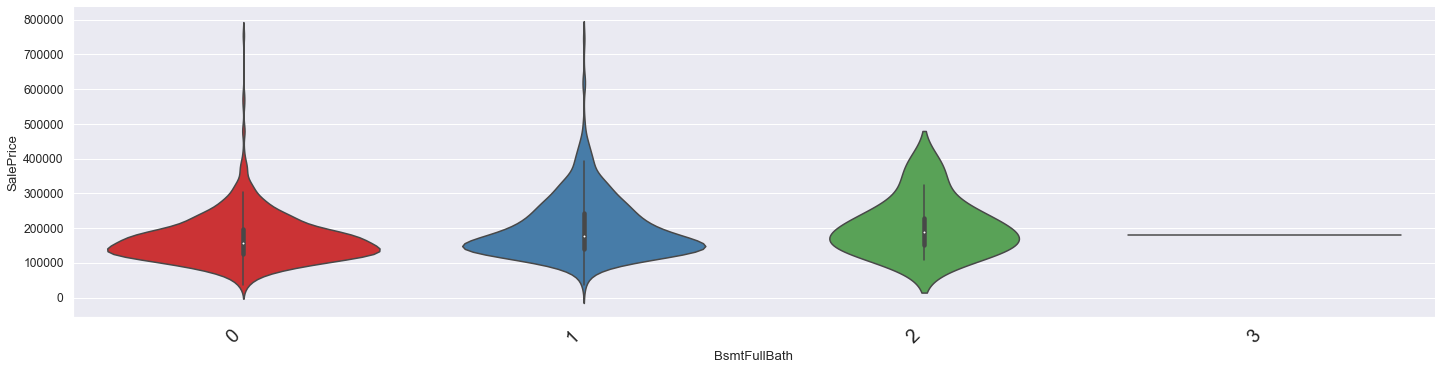

In [1010]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtFullBath',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

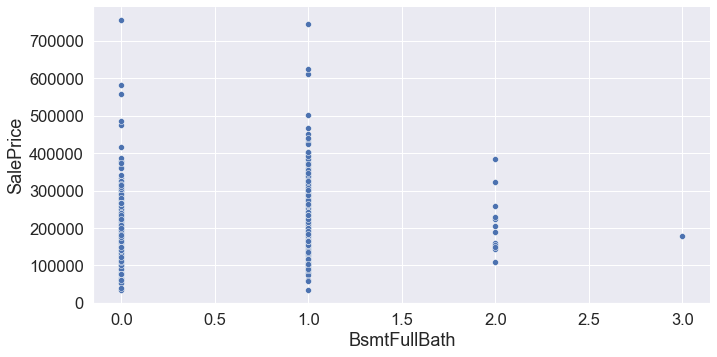

In [1011]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtFullBath',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses doesnt have basement bathroom or having either 1 basement bathroom.

__BsmtHalfBath: Basement half bathrooms__

In [1012]:
df.BsmtHalfBath.value_counts()


0    1067
1      61
2       2
Name: BsmtHalfBath, dtype: int64

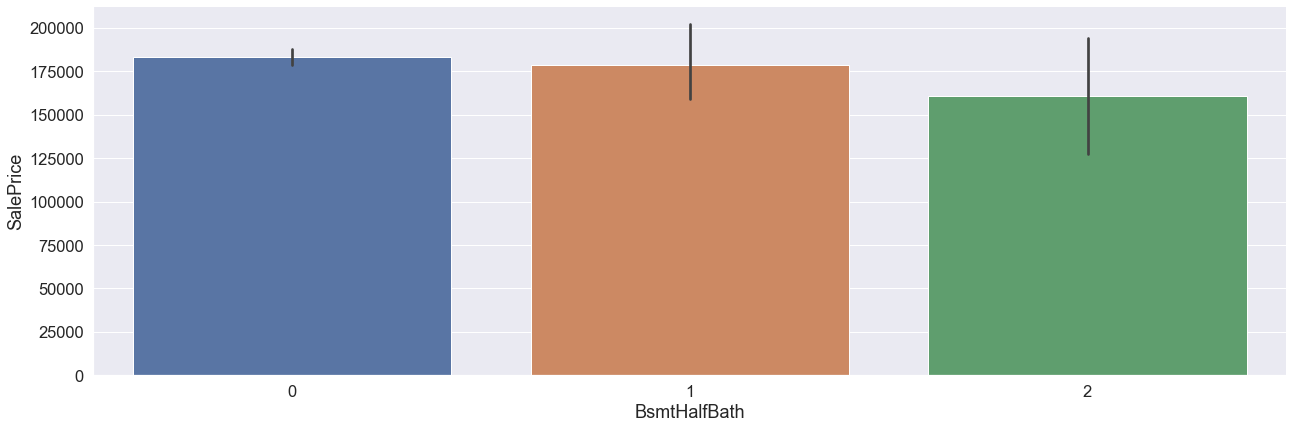

In [1013]:
sns.catplot(y='SalePrice',x='BsmtHalfBath',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

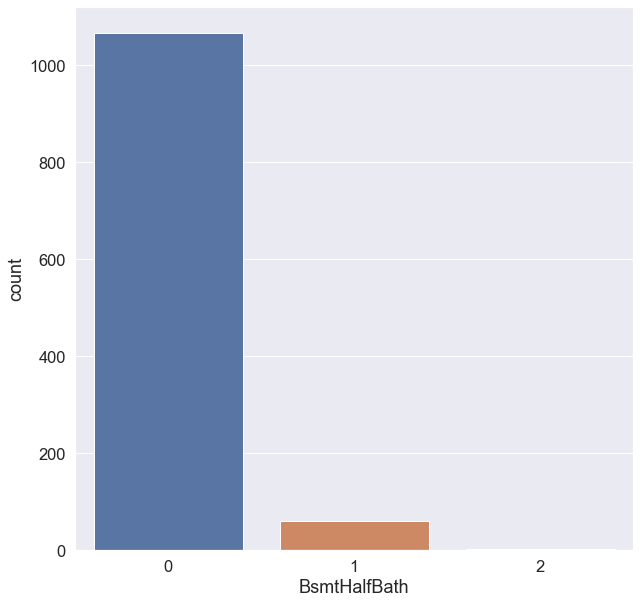

In [1014]:
plt.figure(figsize=(10,10))
sns.countplot(df.BsmtHalfBath)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

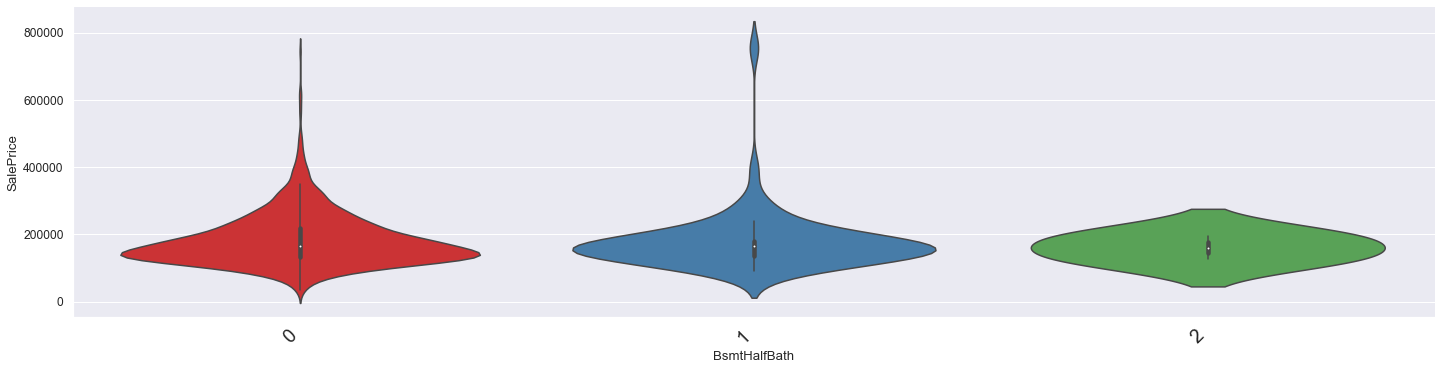

In [1015]:
sns.set(font_scale=1.1)
sns.catplot(x='BsmtHalfBath',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

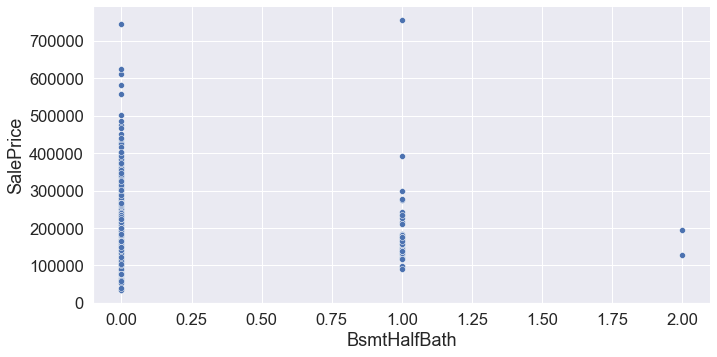

In [1016]:
sns.set(font_scale=1.5)
sns.relplot(x='BsmtHalfBath',y='SalePrice',data=df,aspect=2,palette='Set1')

over 1000 houses doesnt have basement half bathroom.

__FullBath: Full bathrooms above grade__

In [1017]:
df.FullBath.value_counts()


2    587
1    511
3     25
0      7
Name: FullBath, dtype: int64

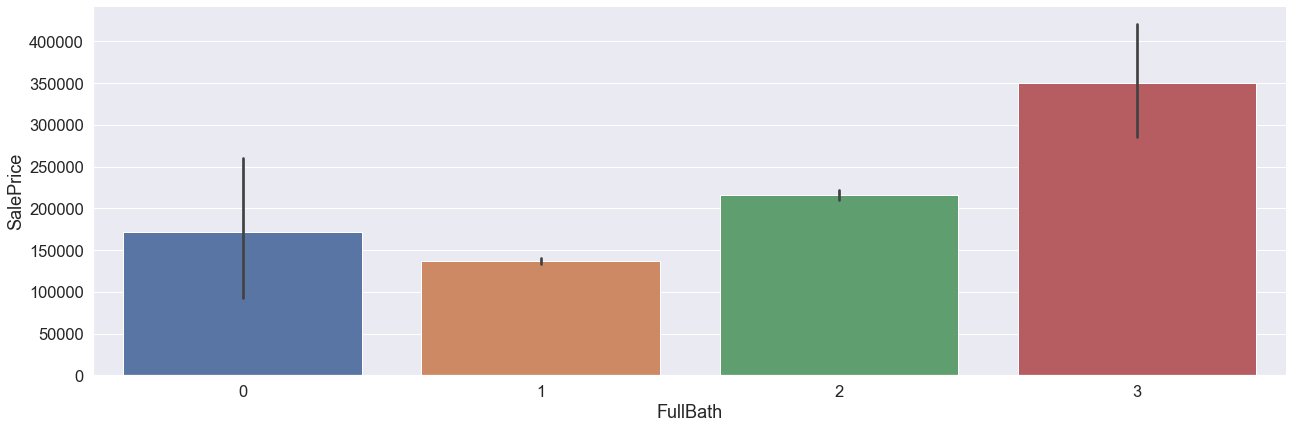

In [1018]:
sns.catplot(y='SalePrice',x='FullBath',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='FullBath', ylabel='count'>

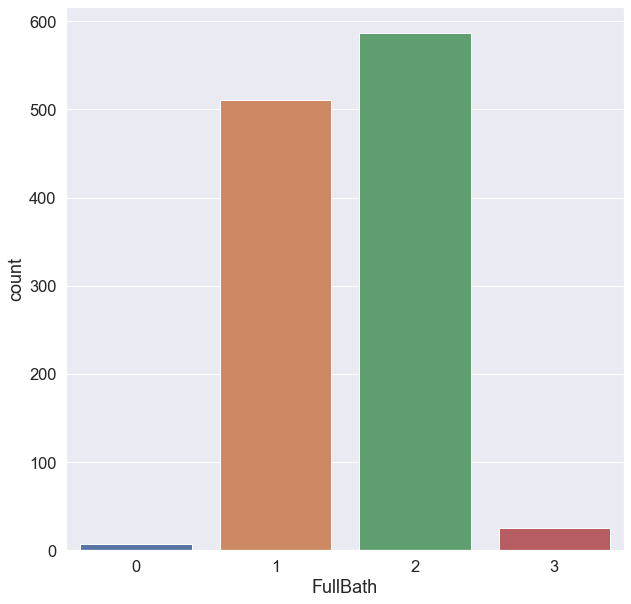

In [1019]:
plt.figure(figsize=(10,10))
sns.countplot(df.FullBath)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

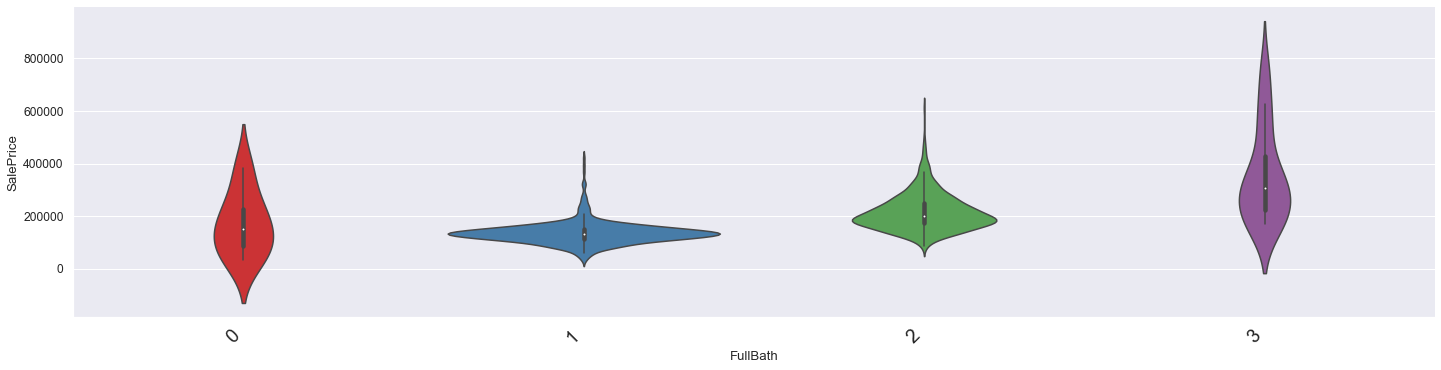

In [1020]:
sns.set(font_scale=1.1)
sns.catplot(x='FullBath',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

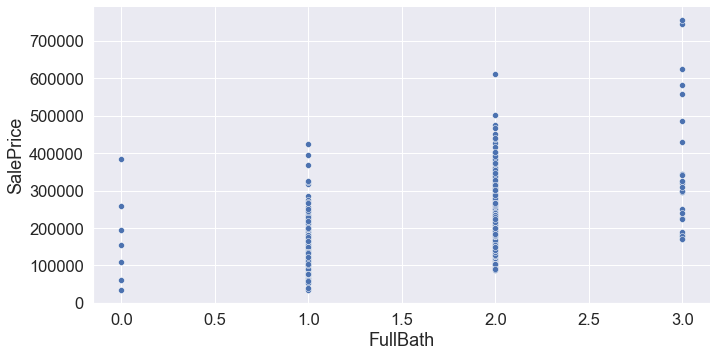

In [1021]:
sns.set(font_scale=1.5)
sns.relplot(x='FullBath',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses have 1 or either 2  Full bathrooms above grade but having 2 bathrooms converts higher sale prices of houses as compared to 1  Full bathrooms above grade.

__HalfBath: Half baths above grade__

In [1022]:
df.HalfBath.value_counts()


0    692
1    428
2     10
Name: HalfBath, dtype: int64

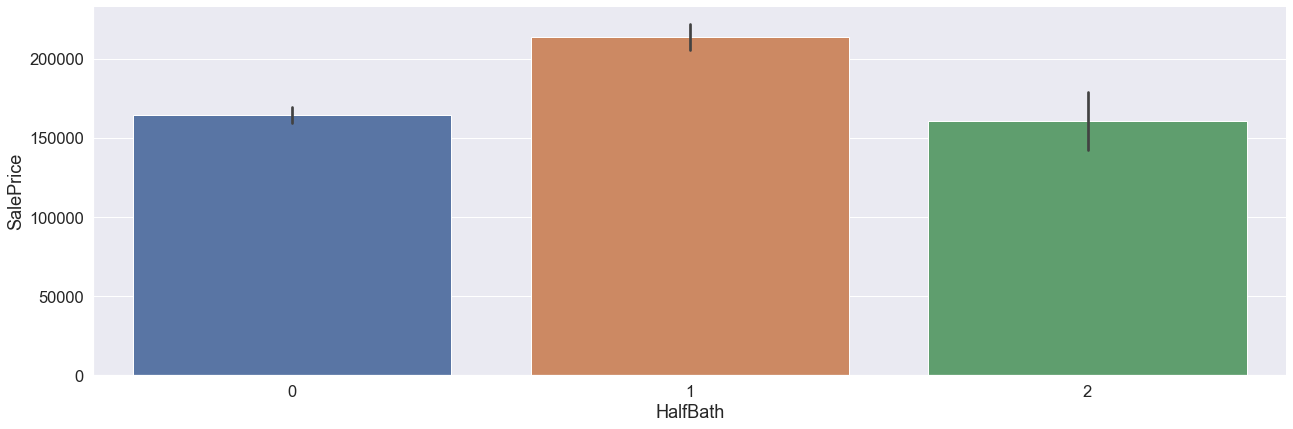

In [1023]:
sns.catplot(y='SalePrice',x='HalfBath',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

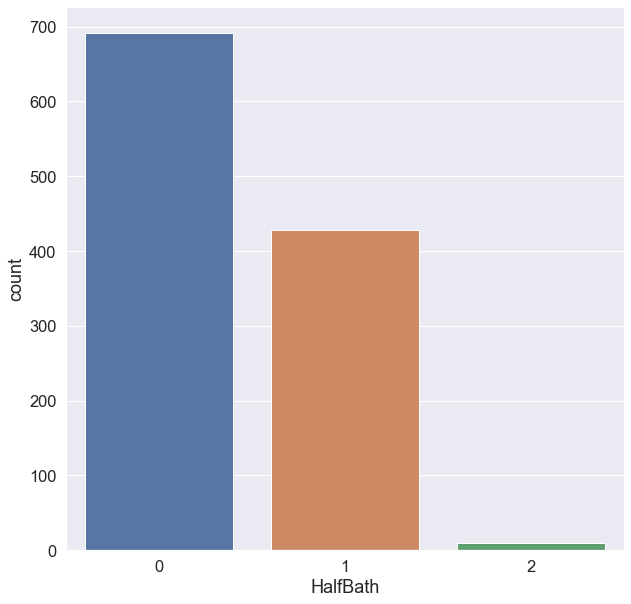

In [1024]:
plt.figure(figsize=(10,10))
sns.countplot(df.HalfBath)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

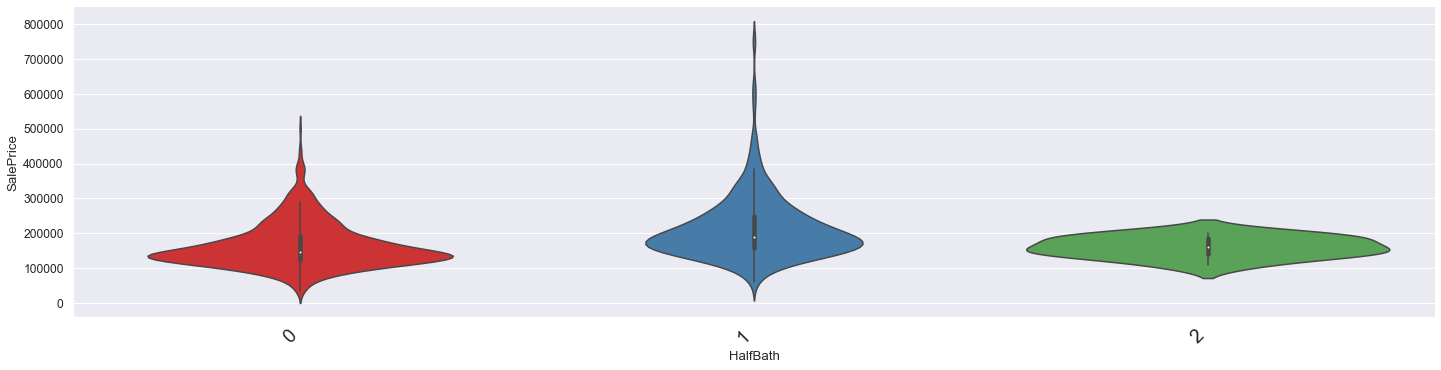

In [1025]:
sns.set(font_scale=1.1)
sns.catplot(x='HalfBath',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

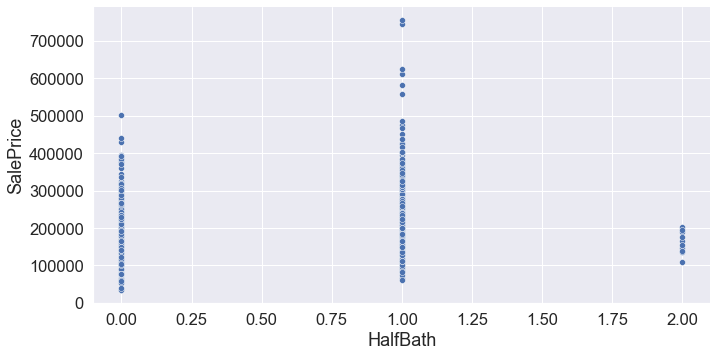

In [1026]:
sns.set(font_scale=1.5)
sns.relplot(x='HalfBath',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses have 1 or either 2 half bathrooms above grade but having 2 bathrooms converts higher sale prices of houses as compared to 1 half bathrooms above grade.

__Bedroom: Bedrooms above grade (does NOT include basement bedrooms)__

In [1027]:
df.BedroomAbvGr.value_counts()


3    630
2    266
4    170
1     37
5     18
6      4
0      4
8      1
Name: BedroomAbvGr, dtype: int64

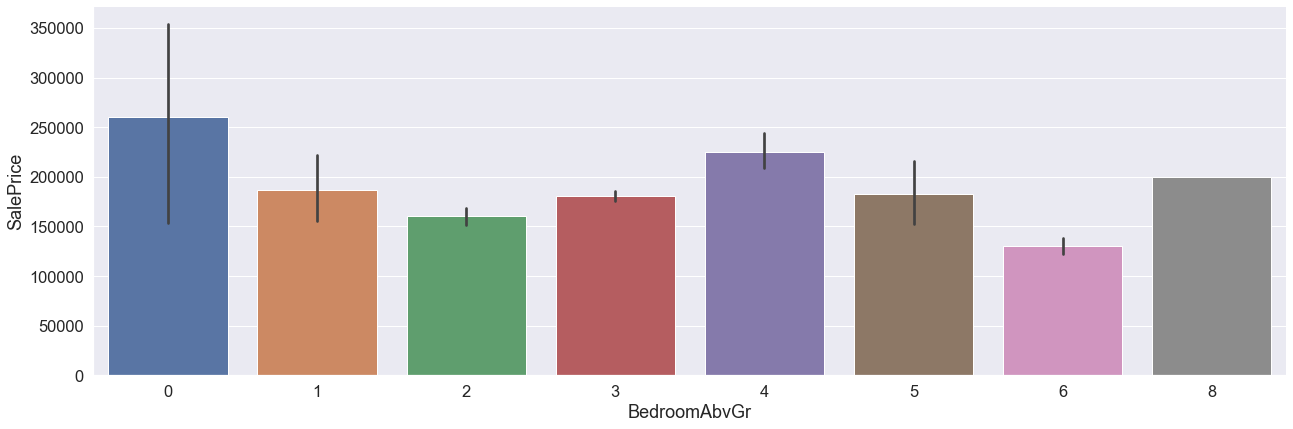

In [1028]:
sns.catplot(y='SalePrice',x='BedroomAbvGr',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

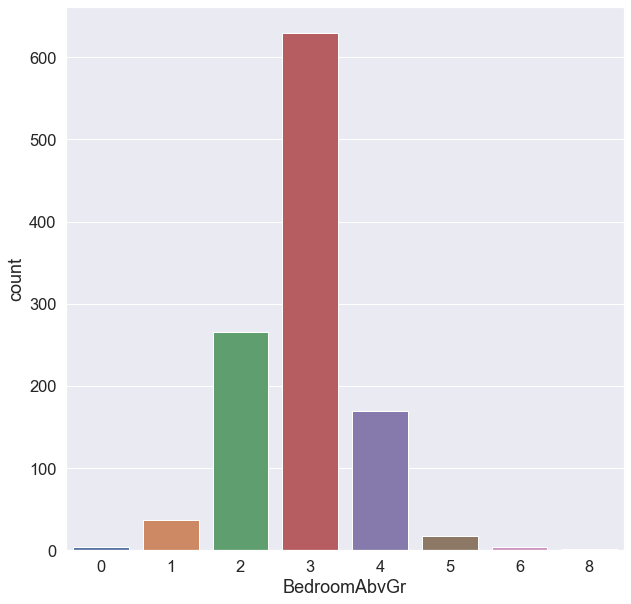

In [1029]:
plt.figure(figsize=(10,10))
sns.countplot(df.BedroomAbvGr)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '8')])

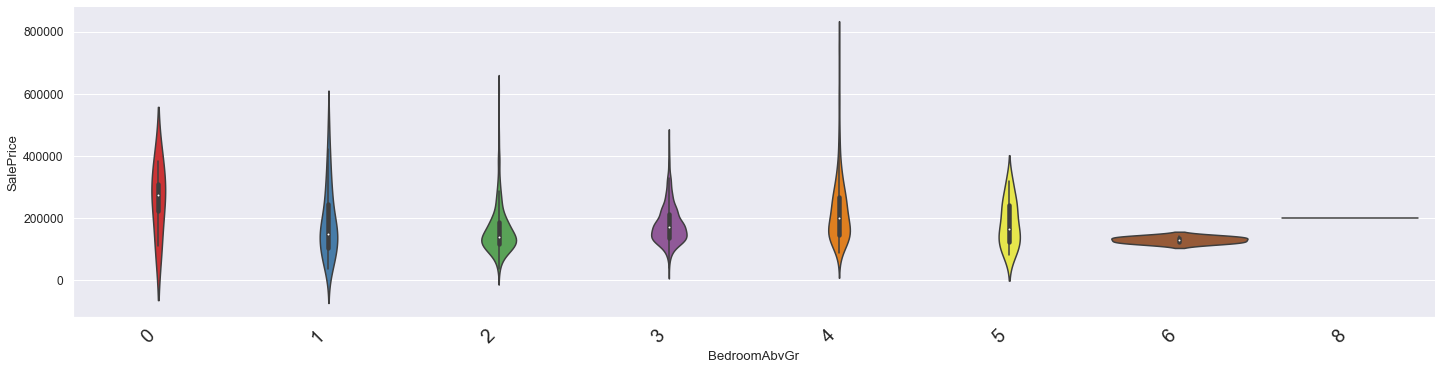

In [1030]:
sns.set(font_scale=1.1)
sns.catplot(x='BedroomAbvGr',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

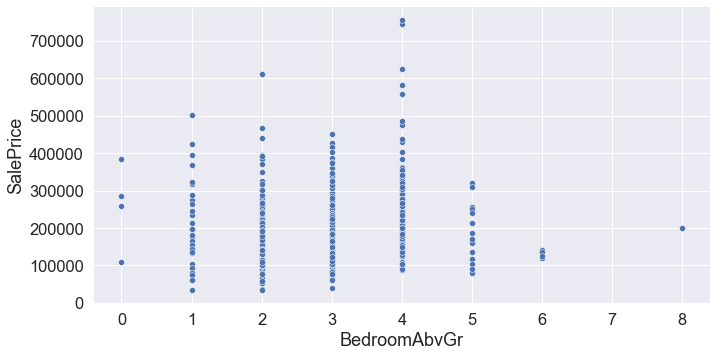

In [1031]:
sns.set(font_scale=1.5)
sns.relplot(x='BedroomAbvGr',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses around 50% have 3 bedroom, rest others have 2 or 4 bedrooms , 4 bedrooms houses have higher cost, strangly having 5 bedrooms have lower sale prices of houses

__Kitchen: Kitchens above grade__

In [1032]:
df.KitchenAbvGr.value_counts()


1    1090
2      38
3       1
0       1
Name: KitchenAbvGr, dtype: int64

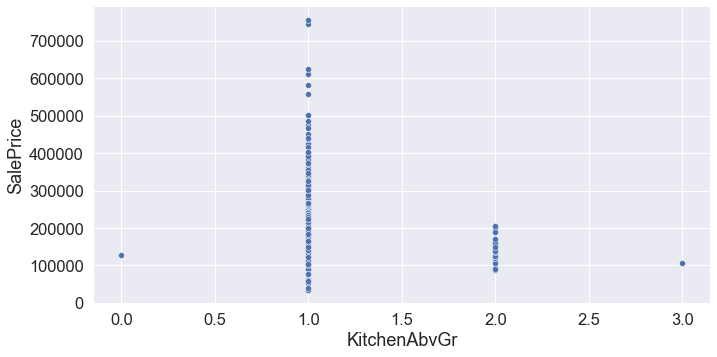

In [1033]:
sns.set(font_scale=1.5)
sns.relplot(x='KitchenAbvGr',y='SalePrice',data=df,aspect=2,palette='Set1')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

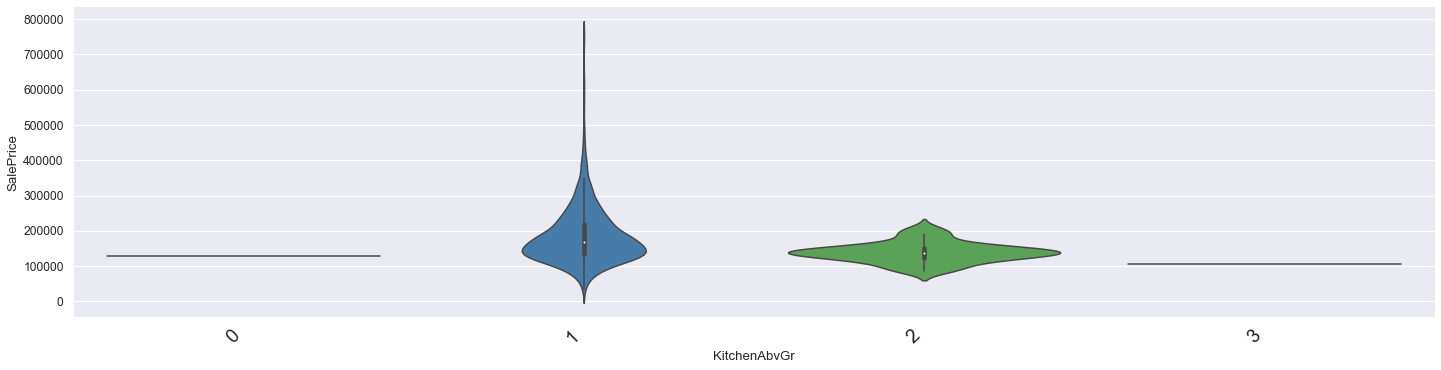

In [1034]:
sns.set(font_scale=1.1)
sns.catplot(x='KitchenAbvGr',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

mostly kitchen in houses have only count 1

__KitchenQual__

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [1035]:
df.KitchenQual.value_counts()


TA    553
Gd    468
Ex     81
Fa     28
Name: KitchenQual, dtype: int64

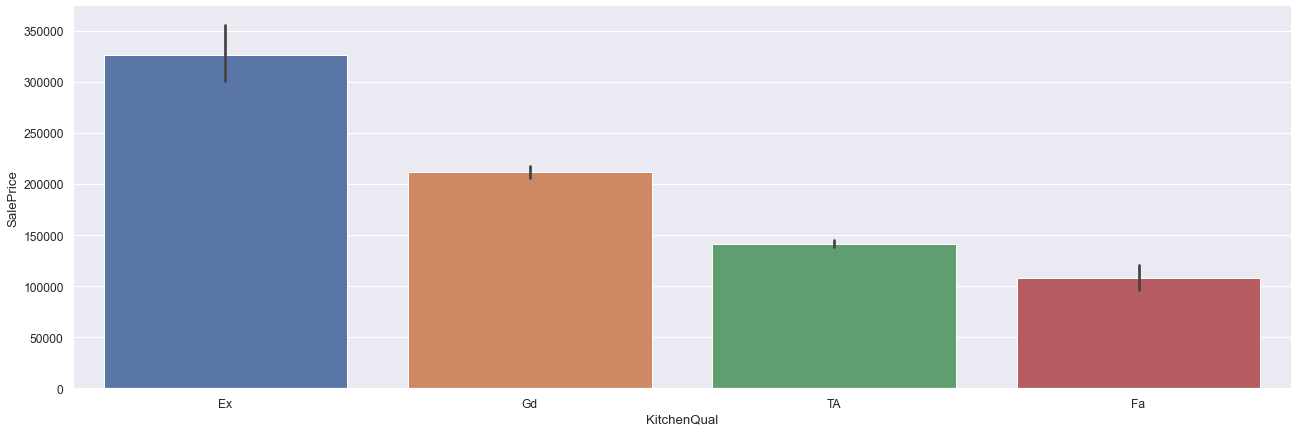

In [1036]:
sns.catplot(y='SalePrice',x='KitchenQual',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

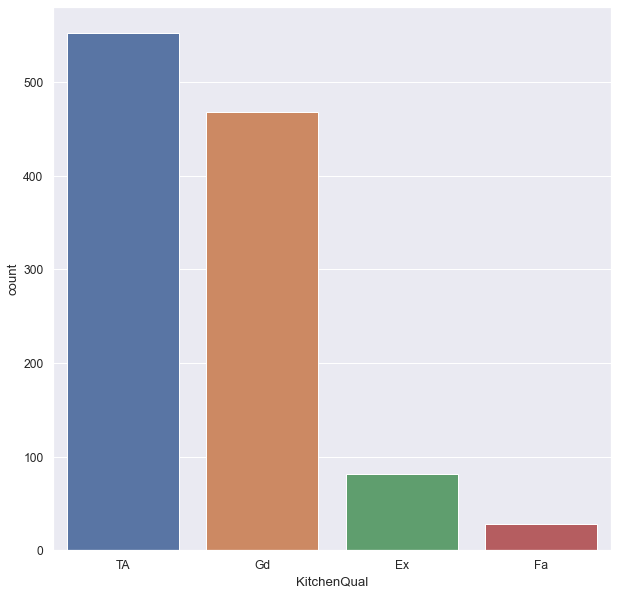

In [1037]:
plt.figure(figsize=(10,10))
sns.countplot(df.KitchenQual)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

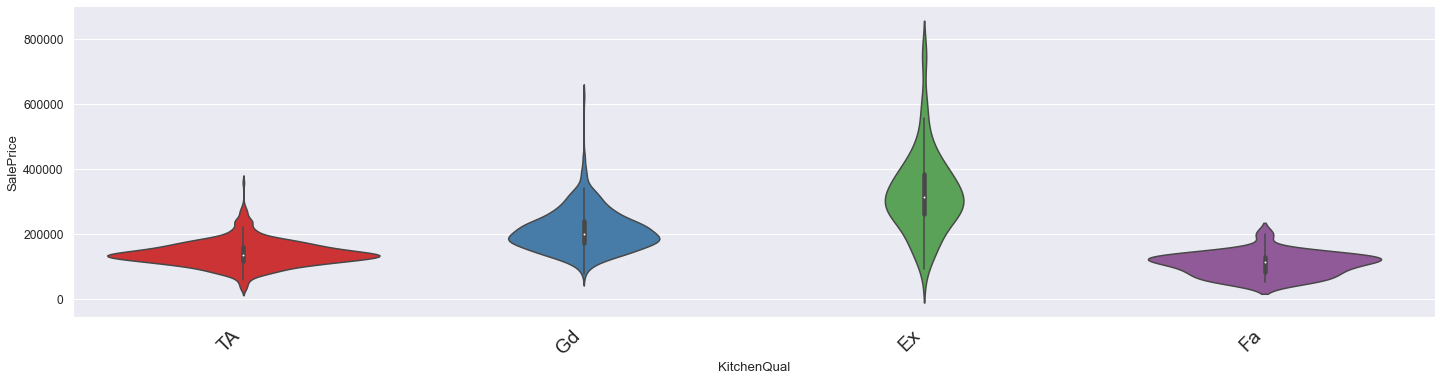

In [1038]:
sns.set(font_scale=1.1)
sns.catplot(x='KitchenQual',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

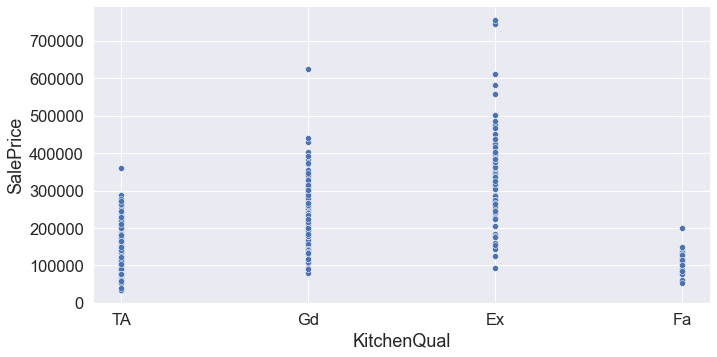

In [1039]:
sns.set(font_scale=1.5)
sns.relplot(x='KitchenQual',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have typically avergae kitchen quality or good, having excellent quality will have higher range on sale price of houses.

__TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)__

In [1040]:
df.TotRmsAbvGrd.value_counts()


6     317
7     260
5     211
8     142
4      69
9      62
10     40
11     13
3      10
12      5
14      1
Name: TotRmsAbvGrd, dtype: int64

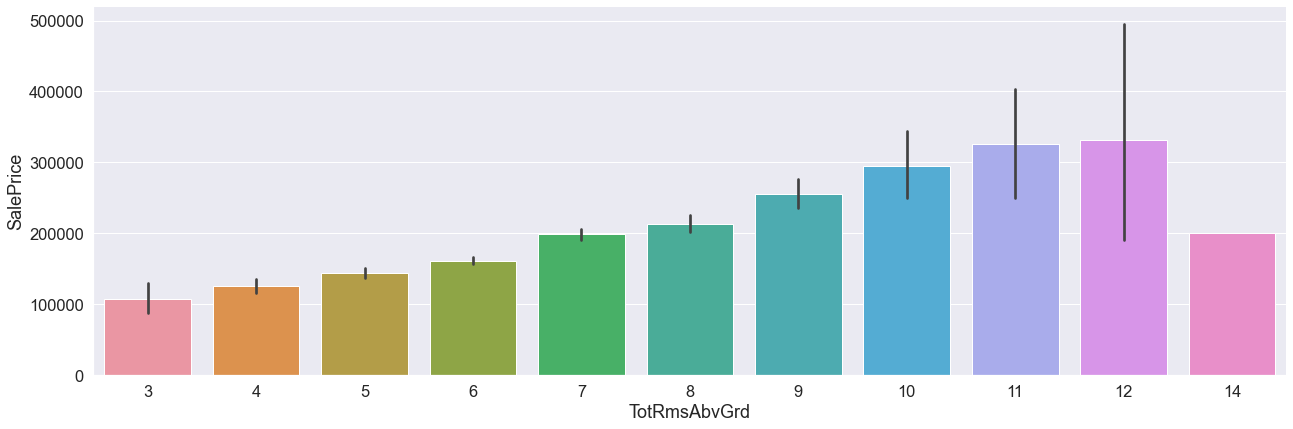

In [1041]:
sns.catplot(y='SalePrice',x='TotRmsAbvGrd',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

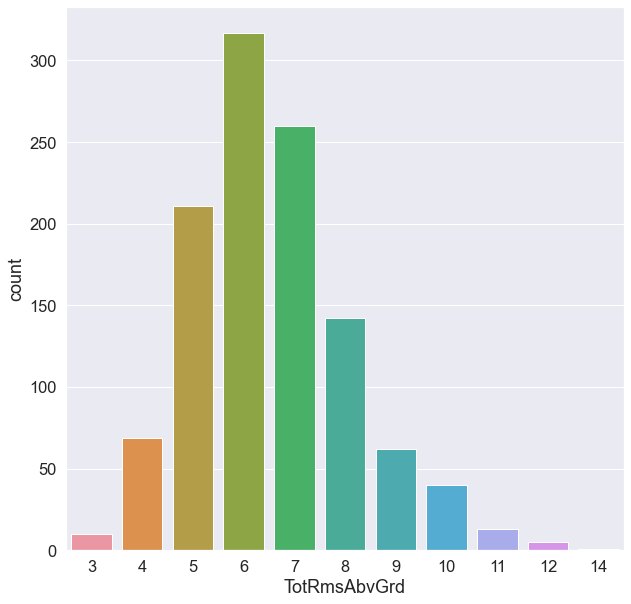

In [1042]:
plt.figure(figsize=(10,10))
sns.countplot(df.TotRmsAbvGrd)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '14')])

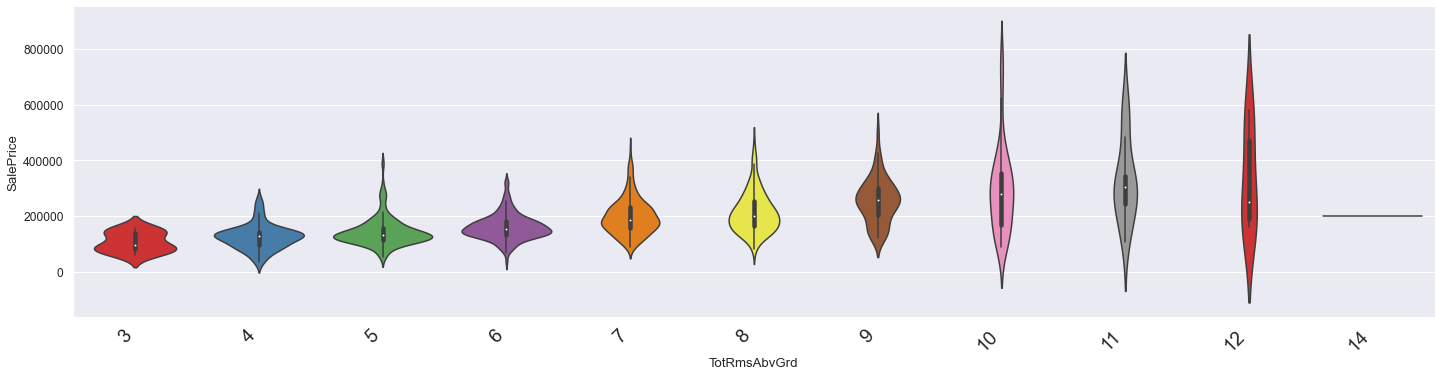

In [1043]:
sns.set(font_scale=1.1)
sns.catplot(x='TotRmsAbvGrd',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

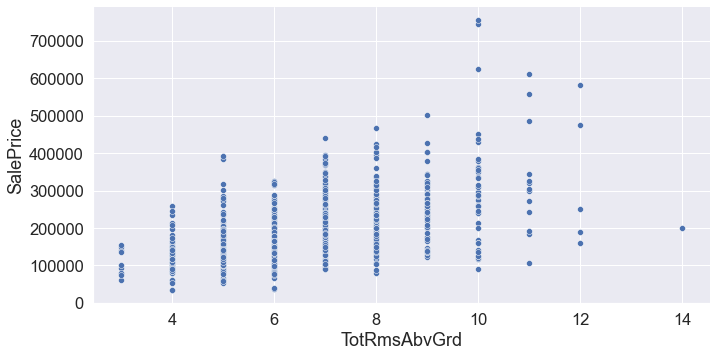

In [1044]:
sns.set(font_scale=1.5)
sns.relplot(x='TotRmsAbvGrd',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have total rooms 5-8 rooms and more the numbers of total rooms, more is the sale prices of houses.

__Functional__

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [1045]:
df.Functional.value_counts()


Typ     1053
Min2      28
Min1      24
Maj1      10
Mod       10
Maj2       4
Sev        1
Name: Functional, dtype: int64

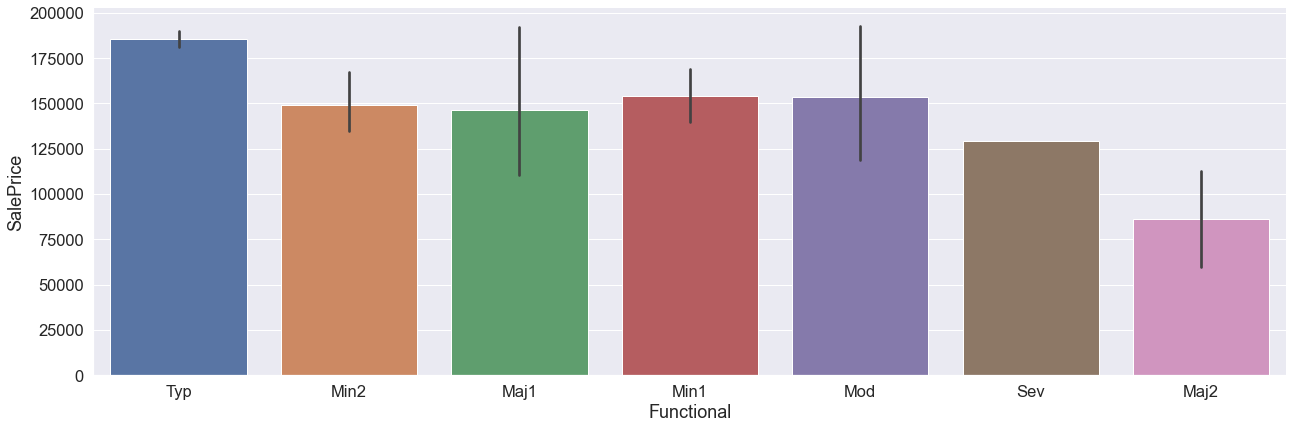

In [1046]:
sns.catplot(y='SalePrice',x='Functional',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Functional', ylabel='count'>

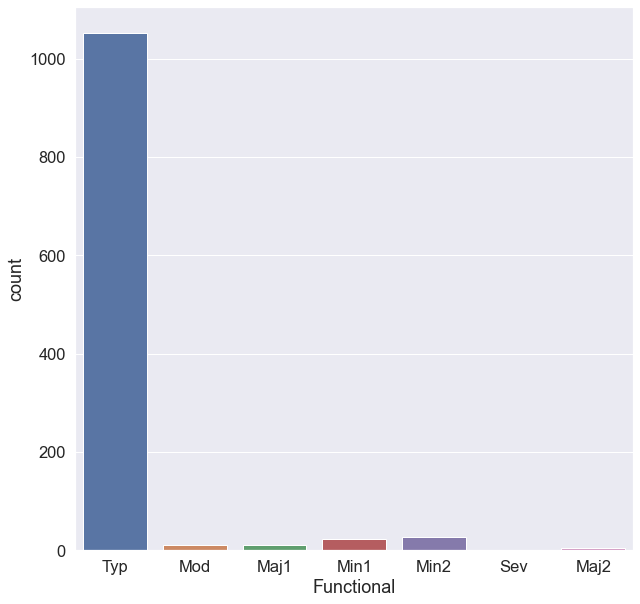

In [1047]:
plt.figure(figsize=(10,10))
sns.countplot(df.Functional)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Typ'),
  Text(1, 0, 'Mod'),
  Text(2, 0, 'Maj1'),
  Text(3, 0, 'Min1'),
  Text(4, 0, 'Min2'),
  Text(5, 0, 'Sev'),
  Text(6, 0, 'Maj2')])

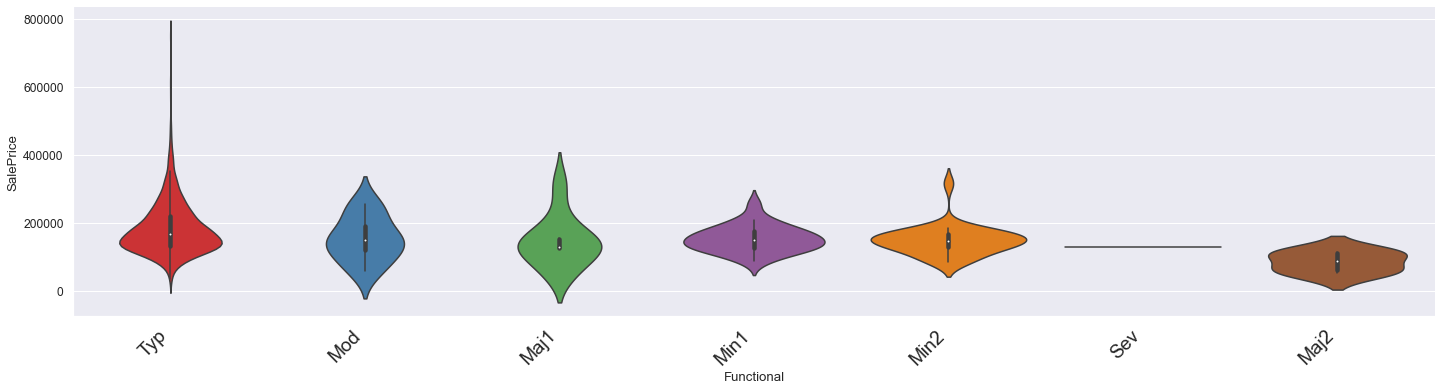

In [1048]:
sns.set(font_scale=1.1)
sns.catplot(x='Functional',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

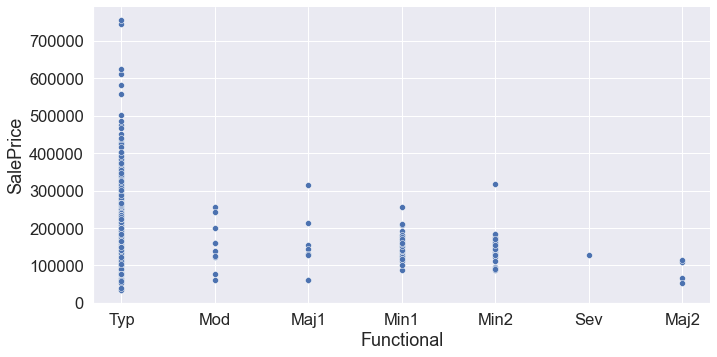

In [1049]:
sns.set(font_scale=1.5)
sns.relplot(x='Functional',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have typical functionality

__Fireplaces: Number of fireplaces__

In [1050]:
df.Fireplaces.value_counts()


0    526
1    508
2     91
3      5
Name: Fireplaces, dtype: int64

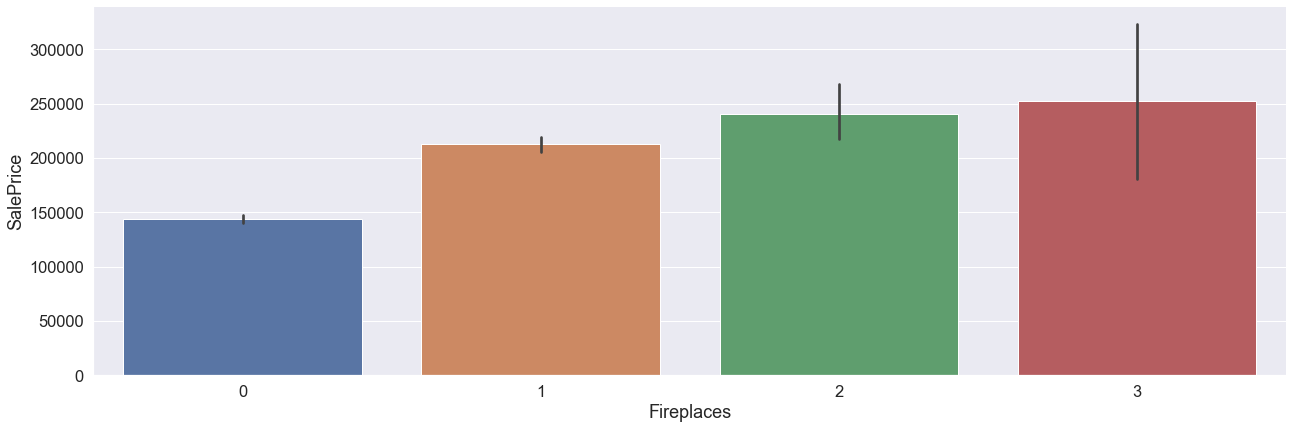

In [1051]:
sns.catplot(y='SalePrice',x='Fireplaces',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

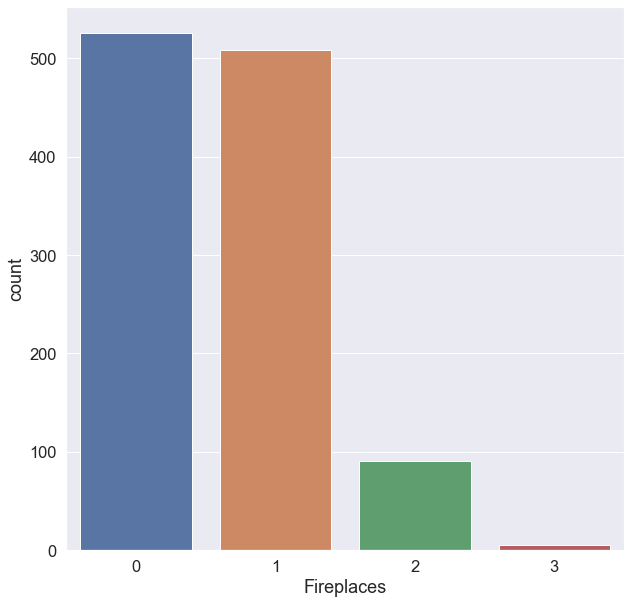

In [1052]:
plt.figure(figsize=(10,10))
sns.countplot(df.Fireplaces)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

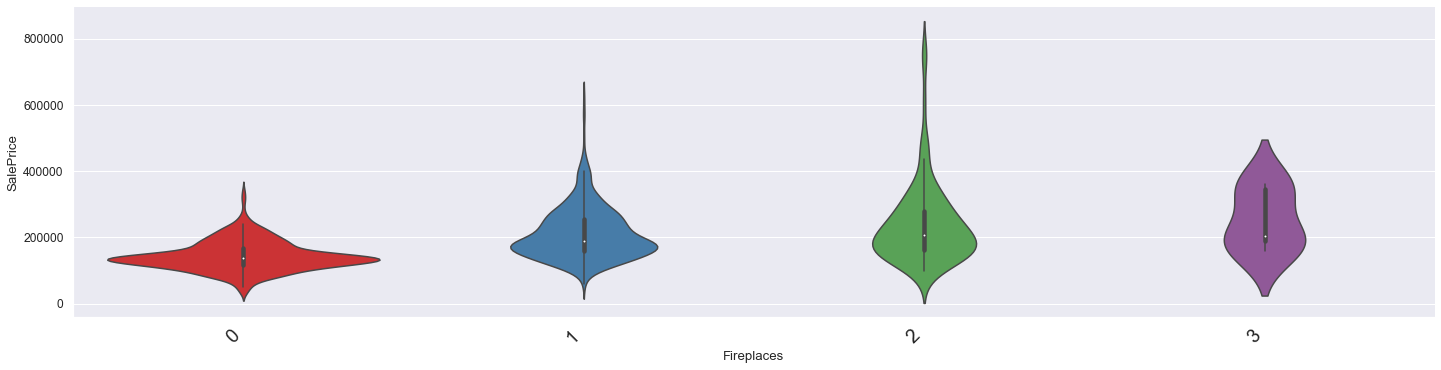

In [1053]:
sns.set(font_scale=1.1)
sns.catplot(x='Fireplaces',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

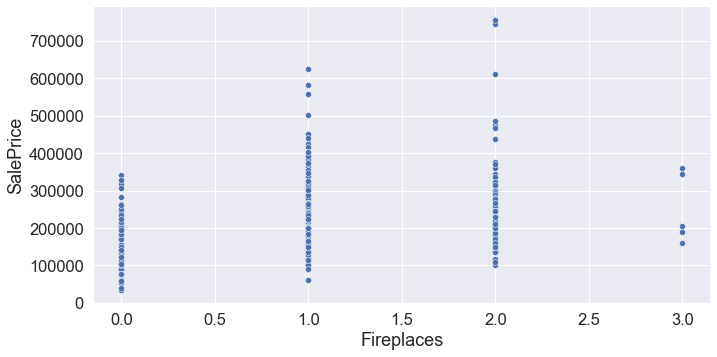

In [1054]:
sns.set(font_scale=1.5)
sns.relplot(x='Fireplaces',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses have either 1 fireplaces or dont, having 2 fireplaces in houses have higher sale prices in comparison.

In [1055]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]
print('Number of missing variable columns:', len(missing_values))
print("Missing values in the dataset : \n ", missing_values)
print("-"*125)
df[missing_values].head()

Number of missing variable columns: 9
Missing values in the dataset : 
  ['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  \
0          TA     Attchd       1977.0          RFn         TA         TA   
1          TA     Attchd       1970.0          Unf         TA         TA   
2          TA     Attchd       1997.0          Unf         TA         TA   
3          TA     Attchd       1977.0          RFn         TA         TA   
4          TA     Attchd       1977.0          Fin         TA         TA   

  PoolQC  Fence MiscFeature  
0    NaN    NaN         NaN  
1    NaN    NaN         NaN  
2    NaN    NaN         NaN  
3    NaN  MnPrv         NaN  
4    NaN    NaN         NaN

In [1056]:
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100,4), "% Missing Values")

FireplaceQu 46.5487 % Missing Values
GarageType 5.1327 % Missing Values
GarageYrBlt 5.1327 % Missing Values
GarageFinish 5.1327 % Missing Values
GarageQual 5.1327 % Missing Values
GarageCond 5.1327 % Missing Values
PoolQC 99.3805 % Missing Values
Fence 79.3805 % Missing Values
MiscFeature 96.2832 % Missing Values


__FireplaceQu__

In [1057]:
df.FireplaceQu .value_counts()


Gd    296
TA    246
Fa     25
Ex     20
Po     17
Name: FireplaceQu, dtype: int64

In [1058]:
df['FireplaceQu'].fillna(value='Unknown',inplace=True)
df1['FireplaceQu'].fillna(value='Unknown',inplace=True)

In [1059]:
df.FireplaceQu .value_counts()


Unknown    526
Gd         296
TA         246
Fa          25
Ex          20
Po          17
Name: FireplaceQu, dtype: int64

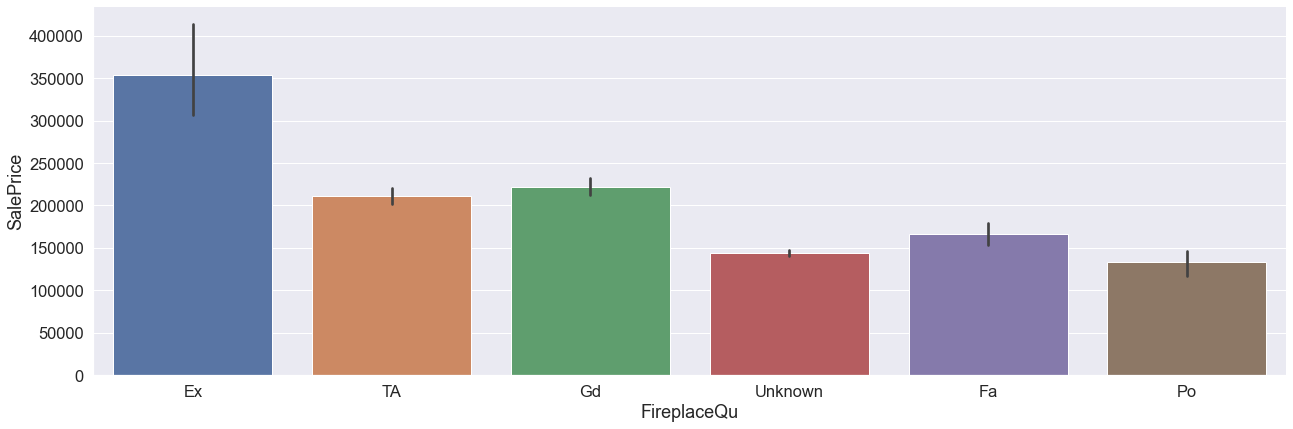

In [1060]:
sns.catplot(y='SalePrice',x='FireplaceQu',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Fa'),
  Text(4, 0, 'Ex'),
  Text(5, 0, 'Po')])

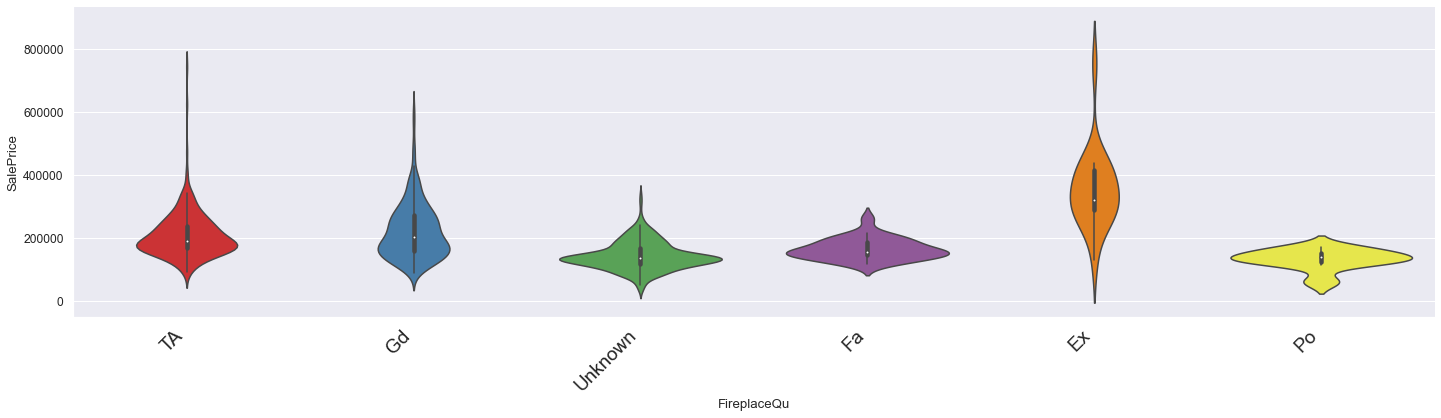

In [1061]:
sns.set(font_scale=1.1)
sns.catplot(x='FireplaceQu',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

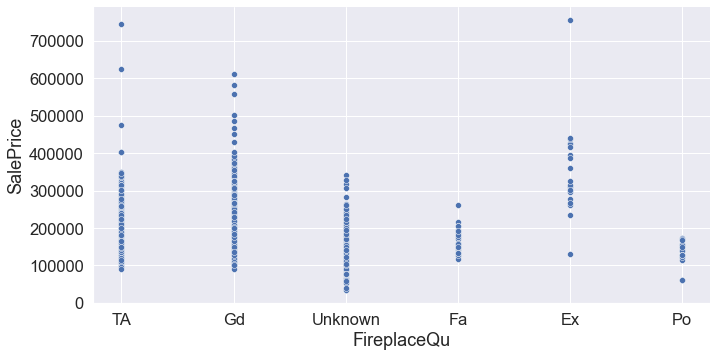

In [1062]:
sns.set(font_scale=1.5)
sns.relplot(x='FireplaceQu',y='SalePrice',data=df,aspect=2,palette='Set1')

if fireplace quality is good or typical average the house sale price is good but if its unknown the maximum range of sale price is 350000

__GarageType__

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [1063]:
#filling null values at first and dropping redundant column


In [1064]:
df['GarageType'].fillna(value='Unknown',inplace=True)
df['GarageYrBlt'].dropna(axis=0,how = 'any',inplace=True)
df['GarageFinish'].fillna(value='Unknown',inplace=True)
df['GarageQual'].fillna(value='Unknown',inplace=True)
df['GarageCond'].fillna(value='Unknown',inplace=True)
df1['GarageType'].fillna(value='Unknown',inplace=True)
df1['GarageYrBlt'].dropna(axis=0,how = 'any',inplace=True)
df1['GarageFinish'].fillna(value='Unknown',inplace=True)
df1['GarageQual'].fillna(value='Unknown',inplace=True)
df1['GarageCond'].fillna(value='Unknown',inplace=True)

In [1065]:
# these clumns dont have data, more than 75% is missing so dropping them.
df.drop(['PoolQC'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)
df.drop(['MiscFeature'],axis=1,inplace=True)
df1.drop(['PoolQC'],axis=1,inplace=True)
df1.drop(['Fence'],axis=1,inplace=True)
df1.drop(['MiscFeature'],axis=1,inplace=True)

In [1066]:
df.GarageType.value_counts()


Attchd     676
Detchd     301
BuiltIn     68
Unknown     58
Basment     16
CarPort      6
2Types       5
Name: GarageType, dtype: int64

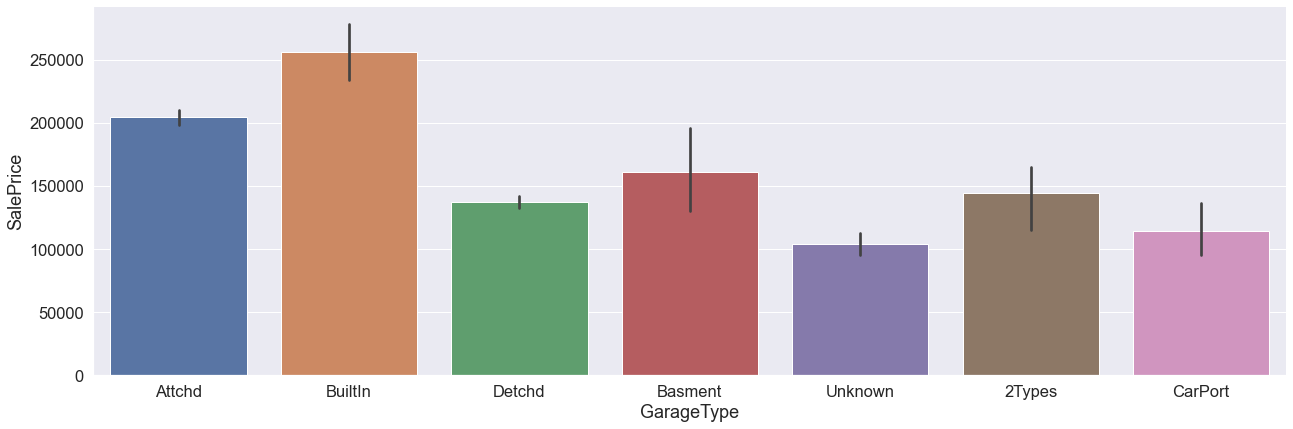

In [1067]:
sns.catplot(y='SalePrice',x='GarageType',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='GarageType', ylabel='count'>

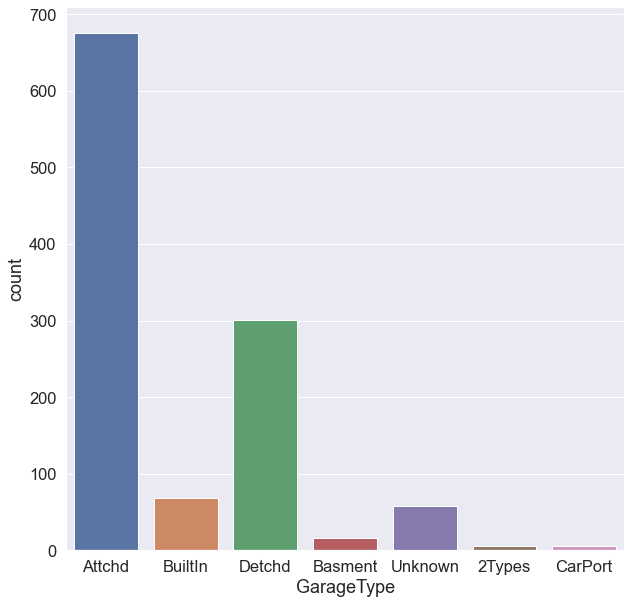

In [1068]:
plt.figure(figsize=(10,10))
sns.countplot(df.GarageType)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Attchd'),
  Text(1, 0, 'BuiltIn'),
  Text(2, 0, 'Detchd'),
  Text(3, 0, 'Basment'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, '2Types'),
  Text(6, 0, 'CarPort')])

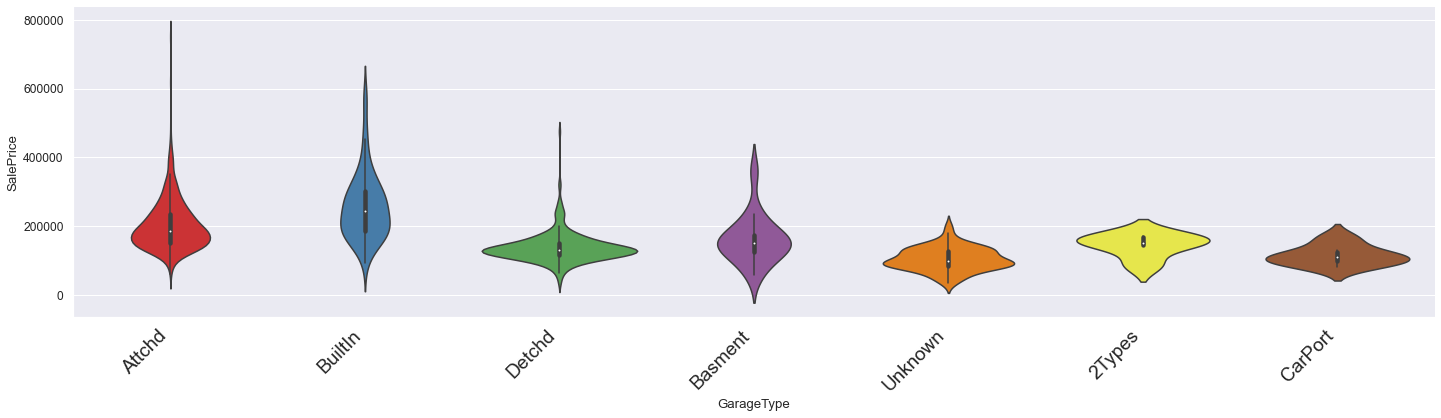

In [1069]:
sns.set(font_scale=1.1)
sns.catplot(x='GarageType',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

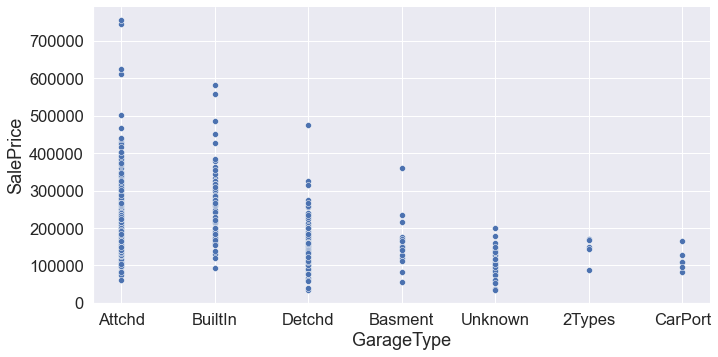

In [1070]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageType',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have either attached or detached, but house sale price is higher for attached garage or builit garage.

__GarageYrBlt: Year garage was built__

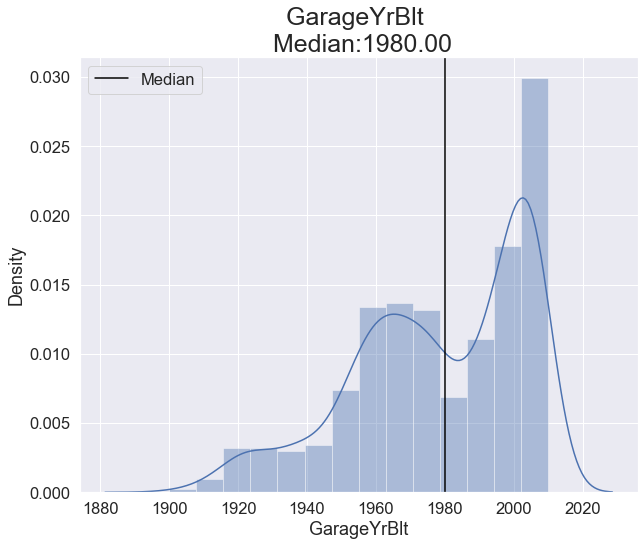

In [1071]:
plt.figure(figsize=(10,8))
sns.distplot(df['GarageYrBlt'])
plt.title('GarageYrBlt \n Median:{0:.2f}'.format(df['GarageYrBlt'].median()),size=25)
plt.axvline(df["GarageYrBlt"].median(),color='black',label='Median')
plt.legend()

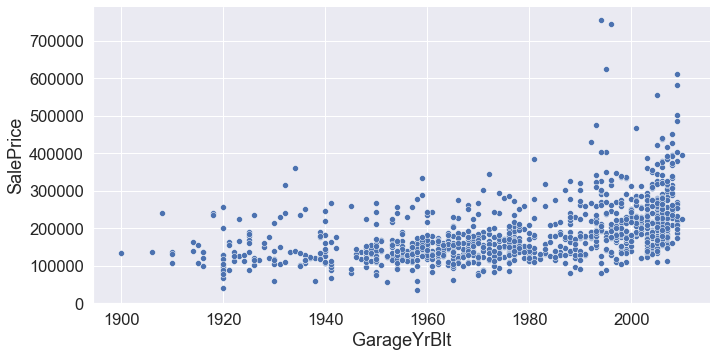

In [1072]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageYrBlt',y='SalePrice',data=df,aspect=2,palette='Set1')


median year of garage built is 1980 and maximum houses have garages built after 1980

__GarageFinish__

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [1073]:
df.GarageFinish.value_counts()


Unf        467
RFn        332
Fin        273
Unknown     58
Name: GarageFinish, dtype: int64

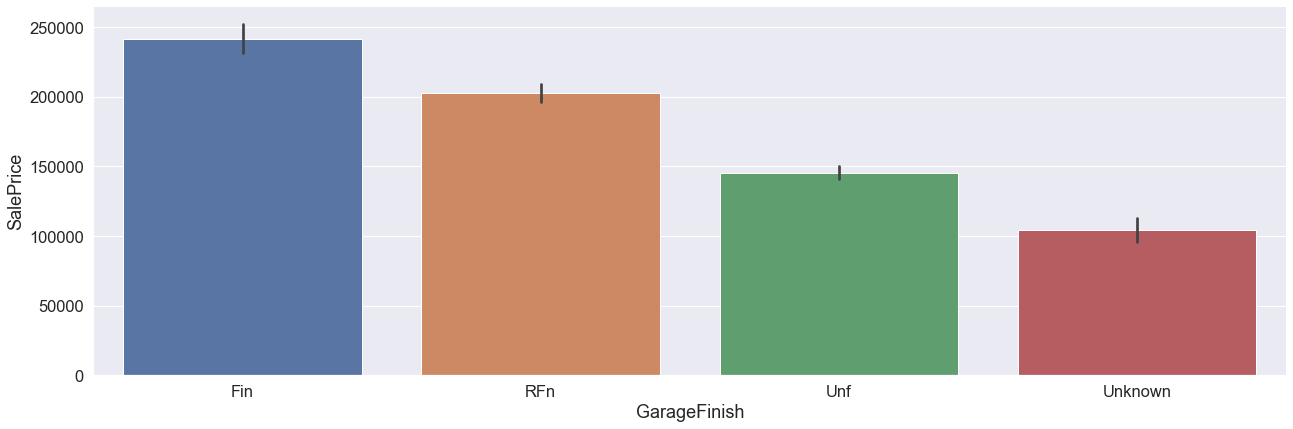

In [1074]:
sns.catplot(y='SalePrice',x='GarageFinish',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

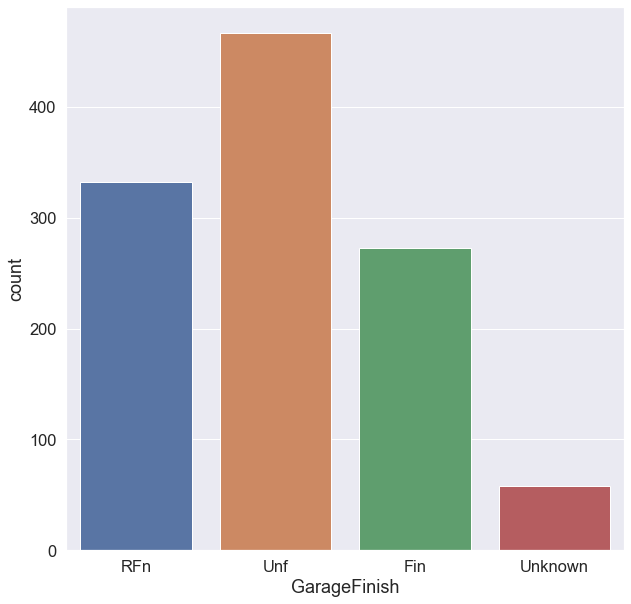

In [1075]:
plt.figure(figsize=(10,10))
sns.countplot(df.GarageFinish)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RFn'),
  Text(1, 0, 'Unf'),
  Text(2, 0, 'Fin'),
  Text(3, 0, 'Unknown')])

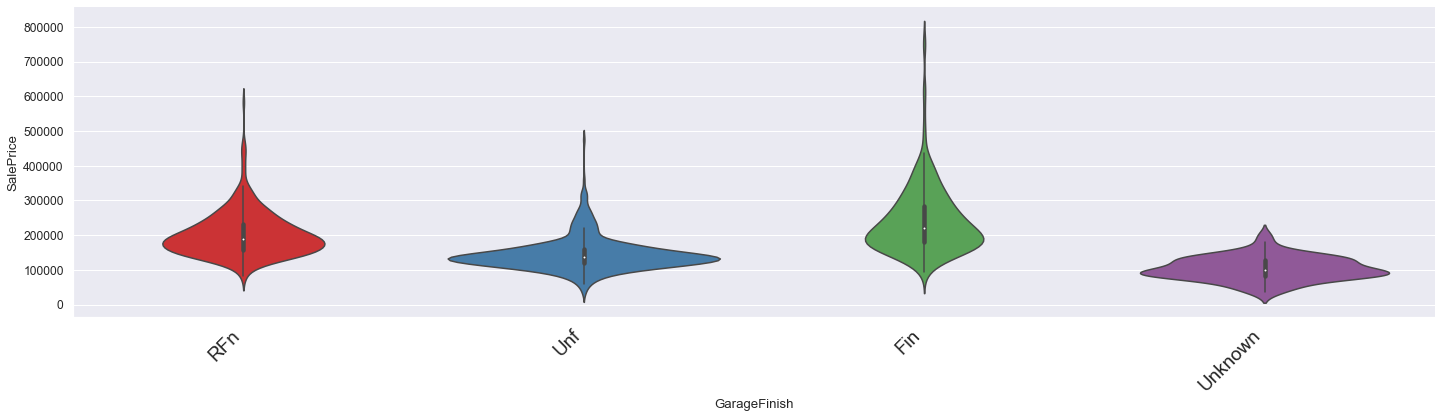

In [1076]:
sns.set(font_scale=1.1)
sns.catplot(x='GarageFinish',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

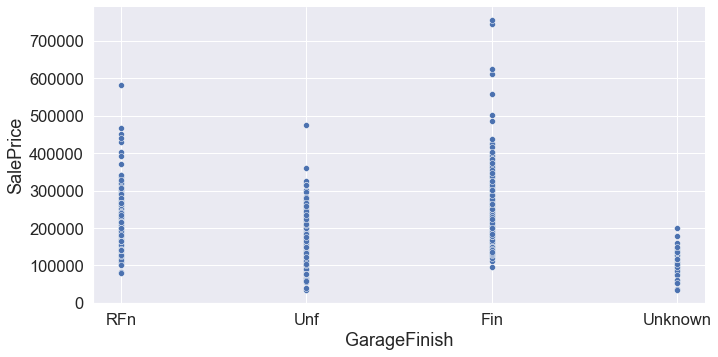

In [1077]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageFinish',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly garages are unfinished or roughly finished, houses have high sales prices with finished garage type.

__GarageCars: Size of garage in car capacity__

In [1078]:
df.GarageCars.value_counts()


2    641
1    281
3    146
0     58
4      4
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

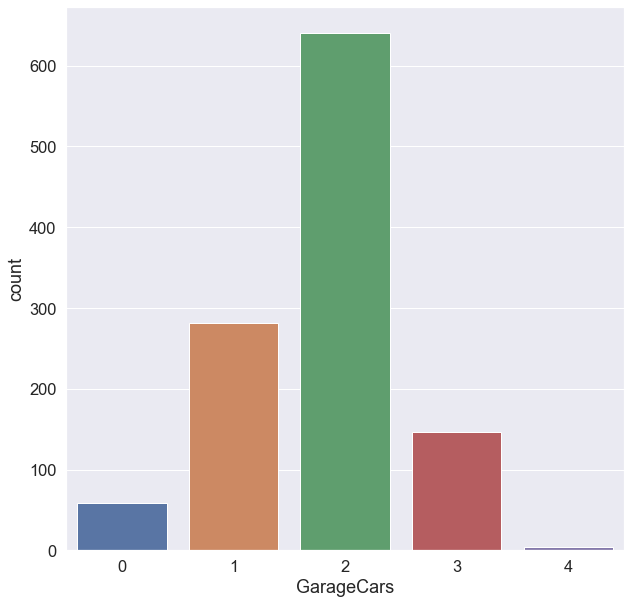

In [1079]:
plt.figure(figsize=(10,10))
sns.countplot(df.GarageCars)


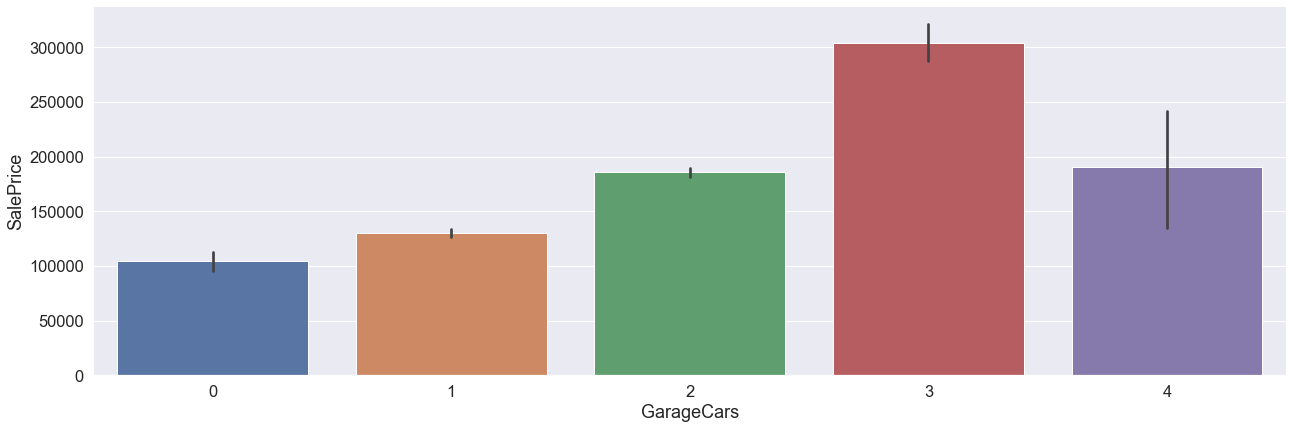

In [1080]:
sns.catplot(y='SalePrice',x='GarageCars',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

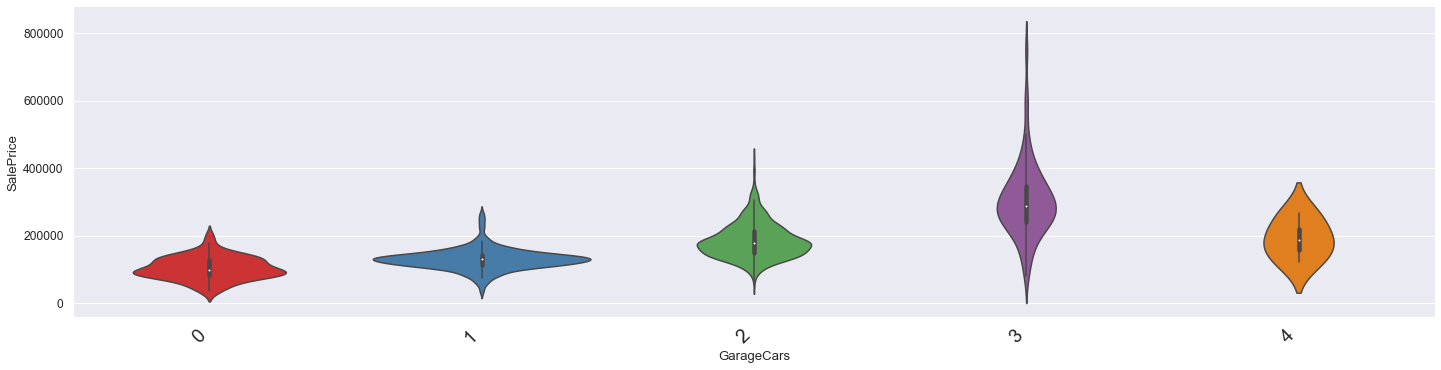

In [1081]:
sns.set(font_scale=1.1)
sns.catplot(x='GarageCars',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

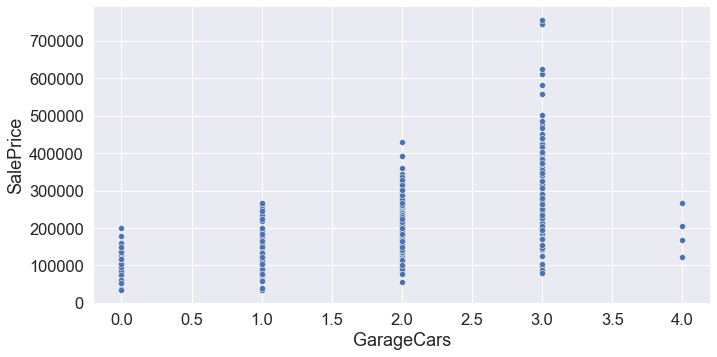

In [1082]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageCars',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have space for 2 cars, but having big garage with space of 3 cars have high sale prices of there houses.

__GarageArea: Size of garage in square feet__

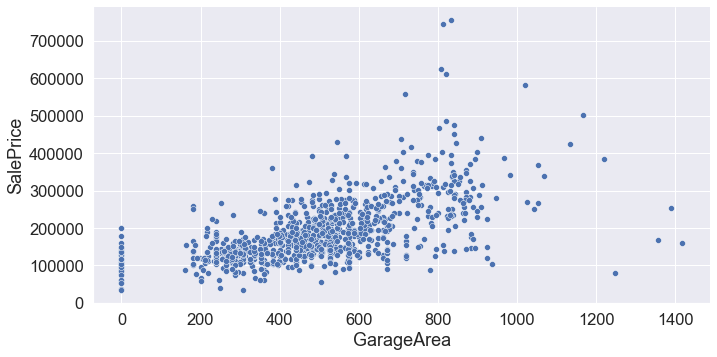

In [1083]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageArea',y='SalePrice',data=df,aspect=2,palette='Set1')

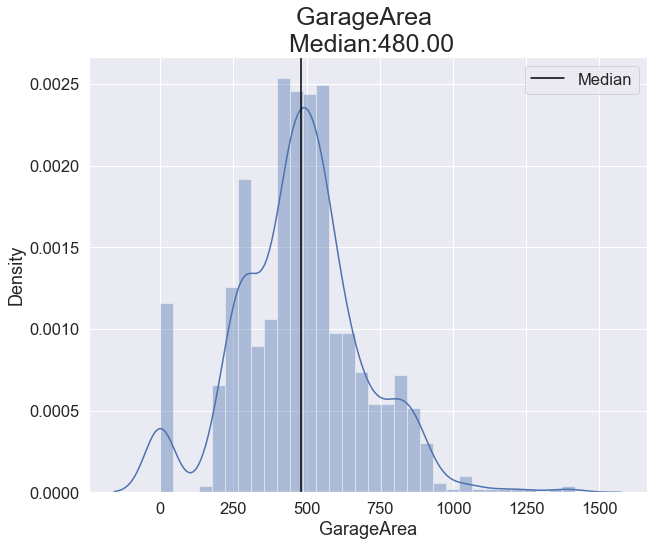

In [1084]:
plt.figure(figsize=(10,8))
sns.distplot(df['GarageArea'])
plt.title('GarageArea \n Median:{0:.2f}'.format(df['GarageArea'].median()),size=25)
plt.axvline(df["GarageArea"].median(),color='black',label='Median')
plt.legend()

graphs shows that average area of square feet of garage is 500 square feet, enough for parking 2-3 cars.

__GarageQual__

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [1085]:
df.GarageQual.value_counts()


TA         1018
Unknown      58
Fa           39
Gd           11
Po            2
Ex            2
Name: GarageQual, dtype: int64

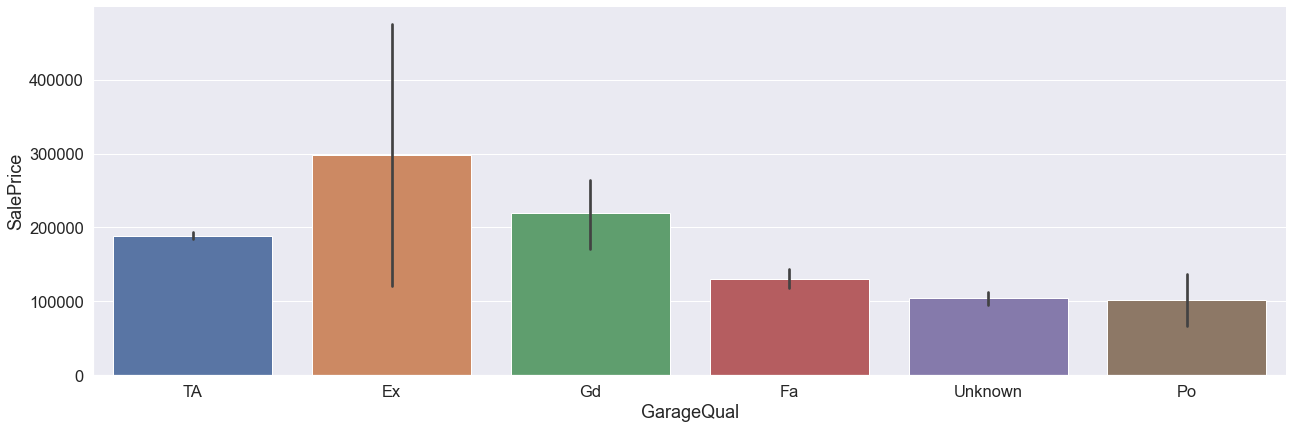

In [1086]:
sns.catplot(y='SalePrice',x='GarageQual',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

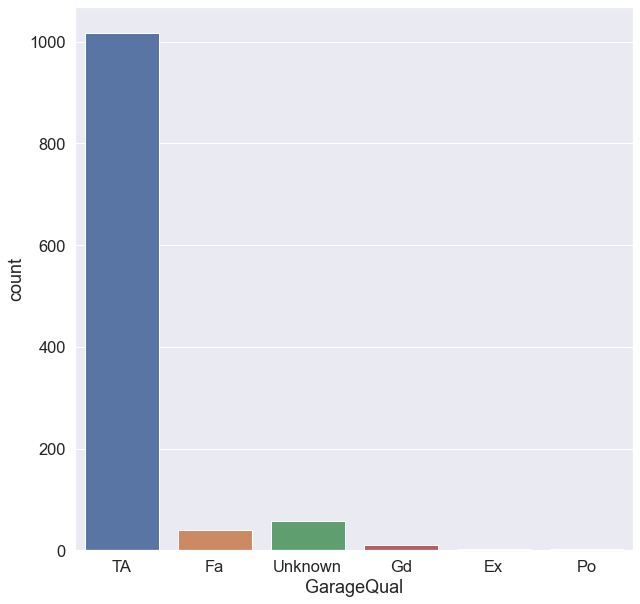

In [1087]:
plt.figure(figsize=(10,10))
sns.countplot(df.GarageQual)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Gd'),
  Text(4, 0, 'Ex'),
  Text(5, 0, 'Po')])

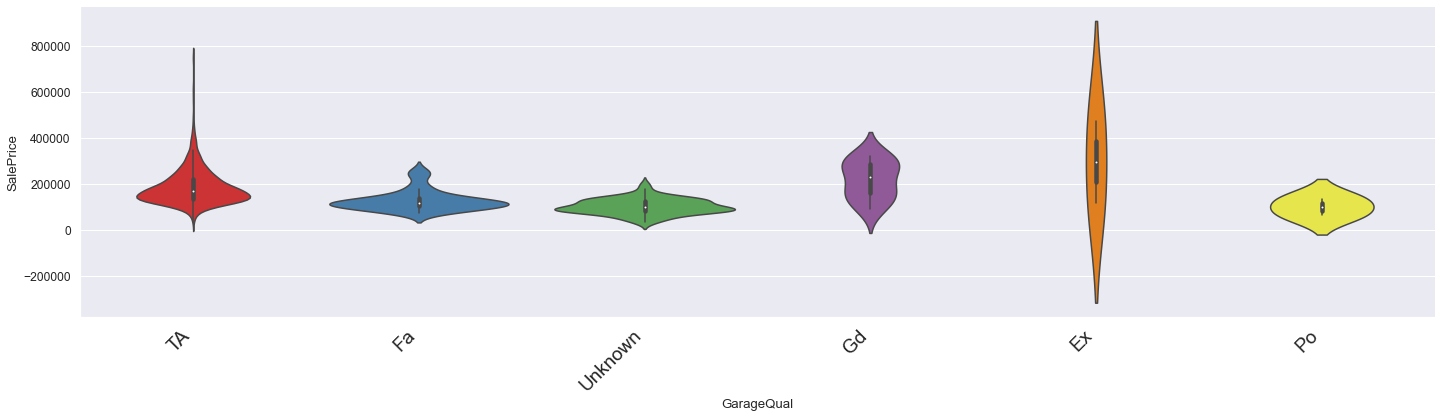

In [1088]:
sns.set(font_scale=1.1)
sns.catplot(x='GarageQual',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

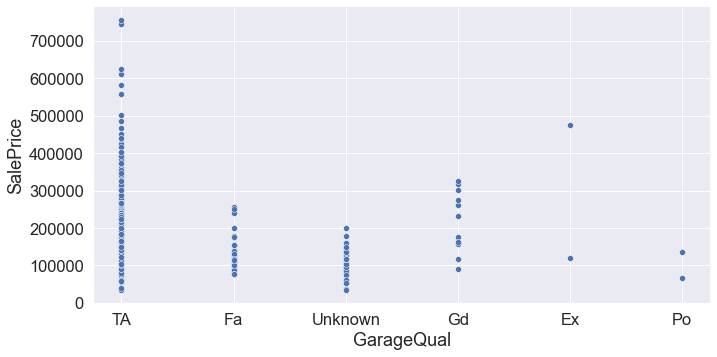

In [1089]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageQual',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses have roughly unfinished garage so have typical average garage quality

__GarageCond__

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [1090]:
df.GarageCond.value_counts()


TA         1030
Unknown      58
Fa           27
Gd            8
Po            6
Ex            1
Name: GarageCond, dtype: int64

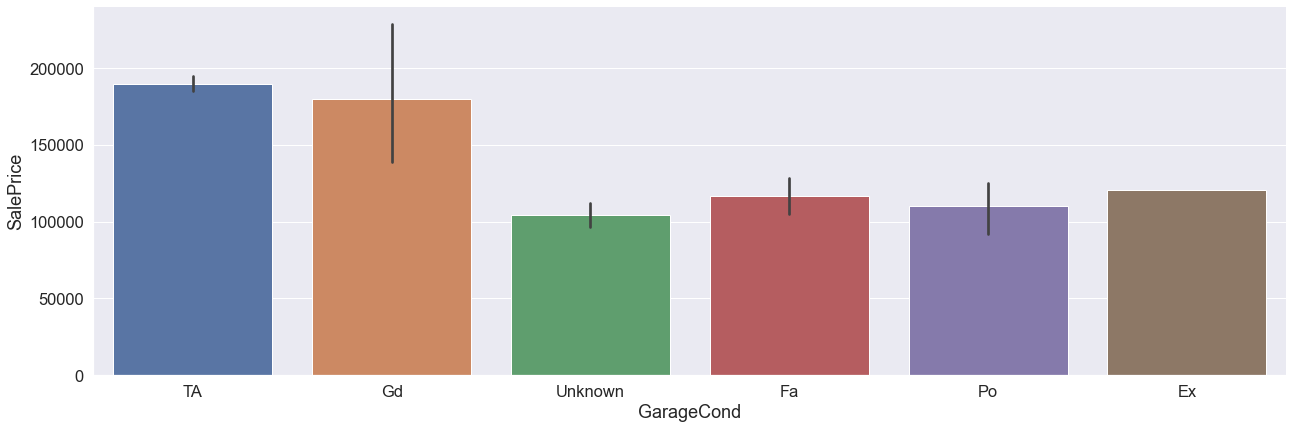

In [1091]:
sns.catplot(y='SalePrice',x='GarageCond',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

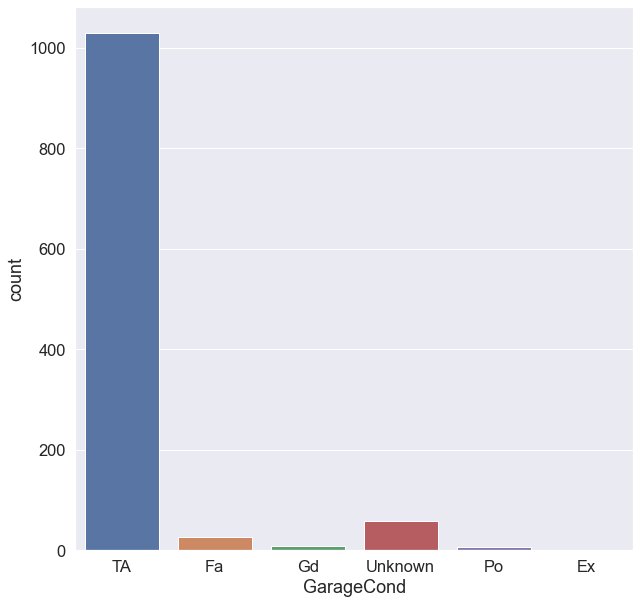

In [1092]:
plt.figure(figsize=(10,10))
sns.countplot(df.GarageCond)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Po'),
  Text(5, 0, 'Ex')])

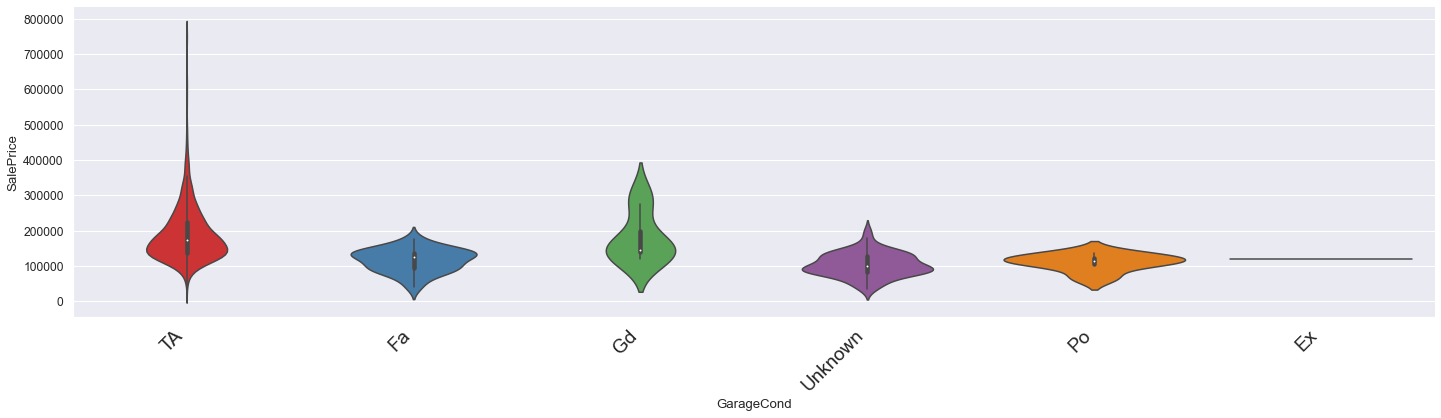

In [1093]:
sns.set(font_scale=1.1)
sns.catplot(x='GarageCond',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

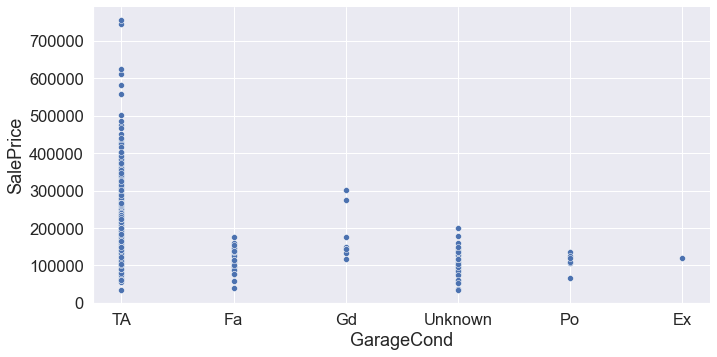

In [1094]:
sns.set(font_scale=1.5)
sns.relplot(x='GarageCond',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses have typically average garage conditions

__PavedDrive__

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [1095]:
df.PavedDrive.value_counts()


Y    1042
N      66
P      22
Name: PavedDrive, dtype: int64

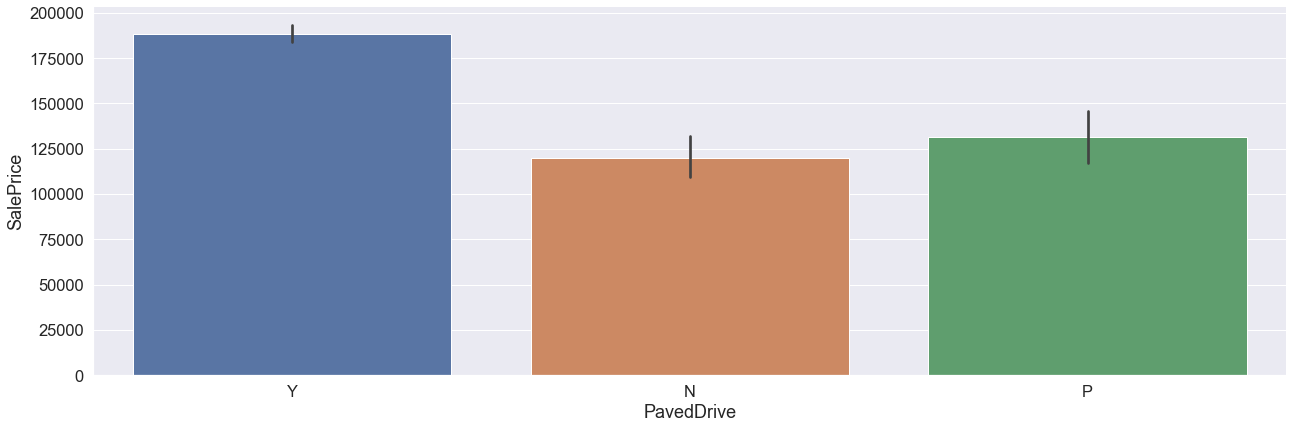

In [1096]:
sns.catplot(y='SalePrice',x='PavedDrive',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

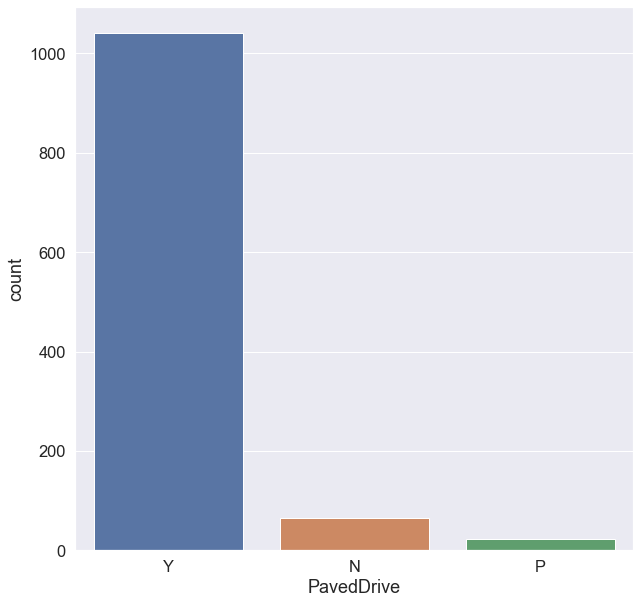

In [1097]:
plt.figure(figsize=(10,10))
sns.countplot(df.PavedDrive)

(array([0, 1, 2]), [Text(0, 0, 'Y'), Text(1, 0, 'N'), Text(2, 0, 'P')])

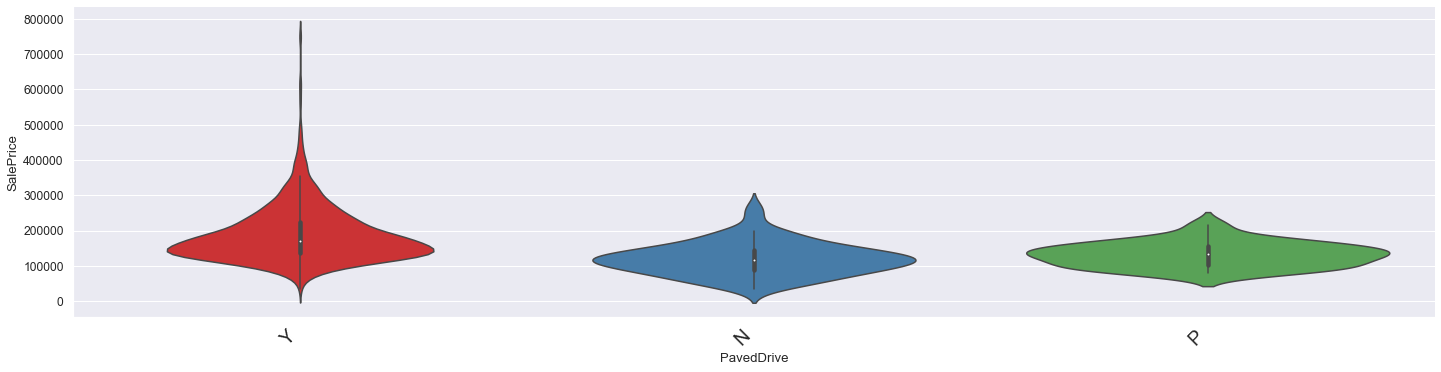

In [1098]:
sns.set(font_scale=1.1)
sns.catplot(x='PavedDrive',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

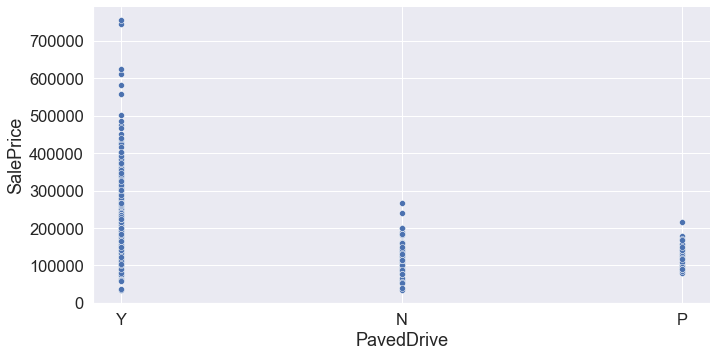

In [1099]:
sns.set(font_scale=1.5)
sns.relplot(x='PavedDrive',y='SalePrice',data=df,aspect=2,palette='Set1')

mostly houses have paved driveway

__WoodDeckSF: Wood deck area in square feet__

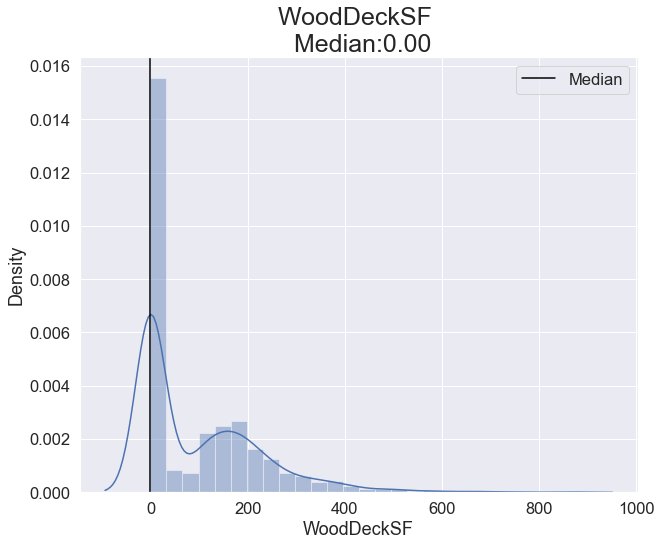

In [1100]:
plt.figure(figsize=(10,8))
sns.distplot(df['WoodDeckSF'])
plt.title('WoodDeckSF \n Median:{0:.2f}'.format(df['WoodDeckSF'].median()),size=25)
plt.axvline(df["WoodDeckSF"].median(),color='black',label='Median')
plt.legend()

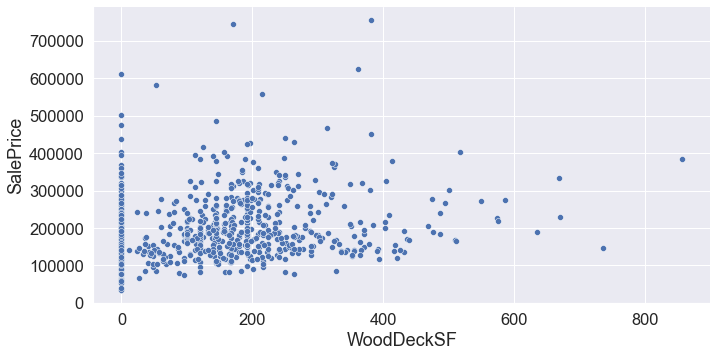

In [1101]:
sns.set(font_scale=1.5)
sns.relplot(x='WoodDeckSF',y='SalePrice',data=df,aspect=2,palette='Set1')


Wood deck area in square feet is mostly 0 as houses doest have Wood deck.

__OpenPorchSF: Open porch area in square feet__

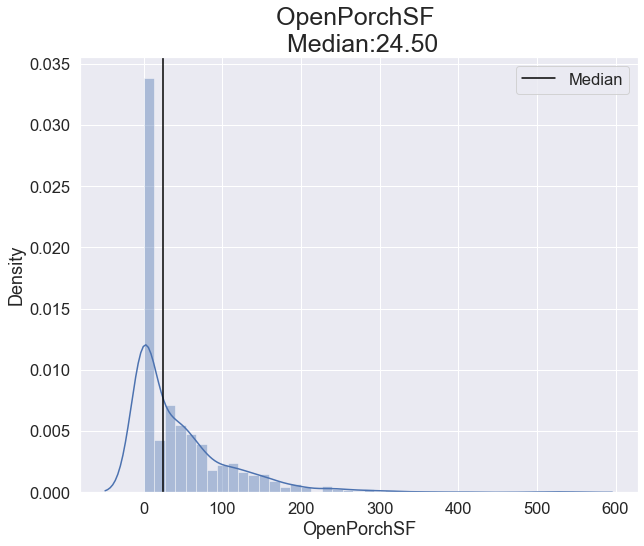

In [1102]:
plt.figure(figsize=(10,8))
sns.distplot(df['OpenPorchSF'])
plt.title('OpenPorchSF \n Median:{0:.2f}'.format(df['OpenPorchSF'].median()),size=25)
plt.axvline(df["OpenPorchSF"].median(),color='black',label='Median')
plt.legend()

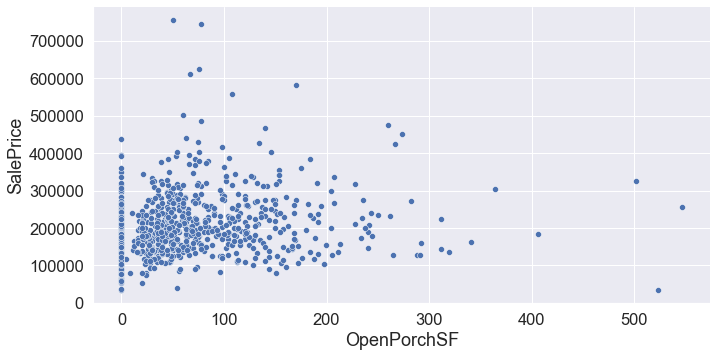

In [1103]:
sns.set(font_scale=1.5)
sns.relplot(x='OpenPorchSF',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses doesnt have  Open porch area but houses having  open porch have  Open porch area in square feet around 100-200 sq feet

__EnclosedPorch: Enclosed porch area in square feet__

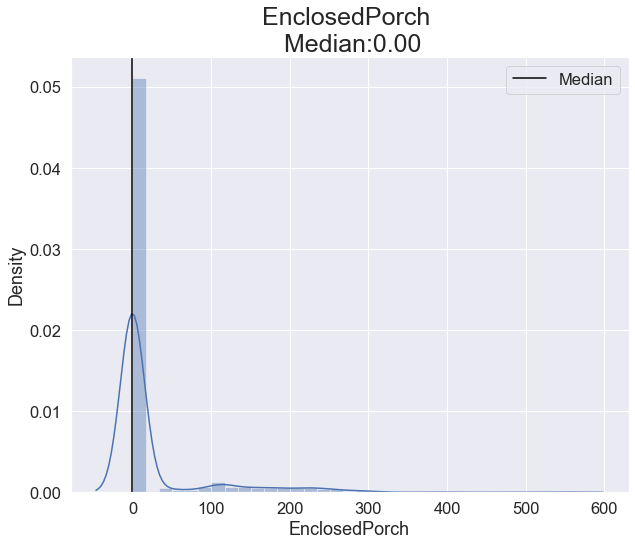

In [1104]:
plt.figure(figsize=(10,8))
sns.distplot(df['EnclosedPorch'])
plt.title('EnclosedPorch \n Median:{0:.2f}'.format(df['EnclosedPorch'].median()),size=25)
plt.axvline(df["EnclosedPorch"].median(),color='black',label='Median')
plt.legend()

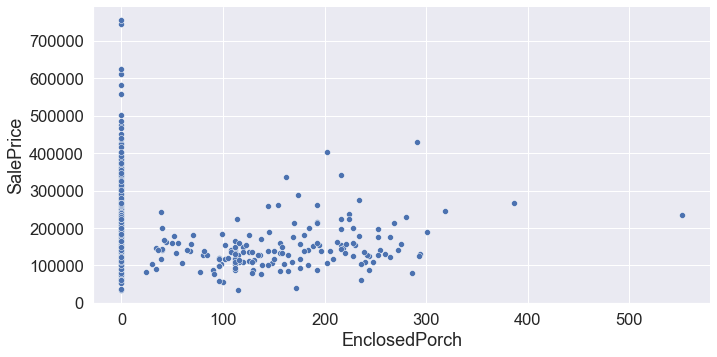

In [1105]:
sns.set(font_scale=1.5)
sns.relplot(x='EnclosedPorch',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses doesnt have  enclosed porch area.

__3SsnPorch: Three season porch area in square feet__

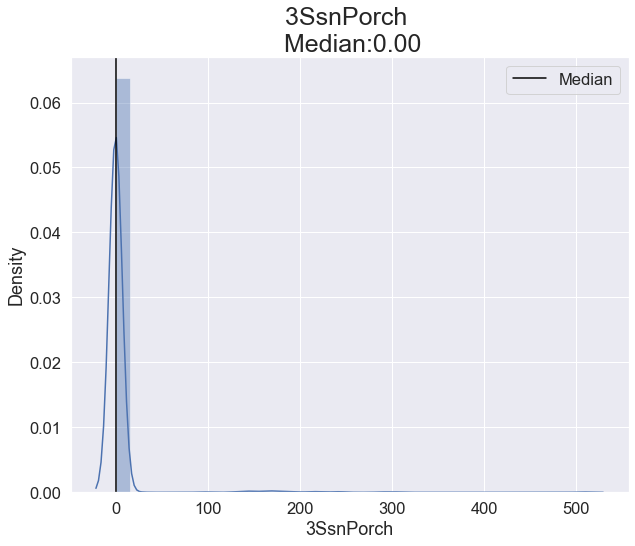

In [1106]:
plt.figure(figsize=(10,8))
sns.distplot(df['3SsnPorch'])
plt.title('3SsnPorch \n Median:{0:.2f}'.format(df['3SsnPorch'].median()),size=25)
plt.axvline(df["3SsnPorch"].median(),color='black',label='Median')
plt.legend()

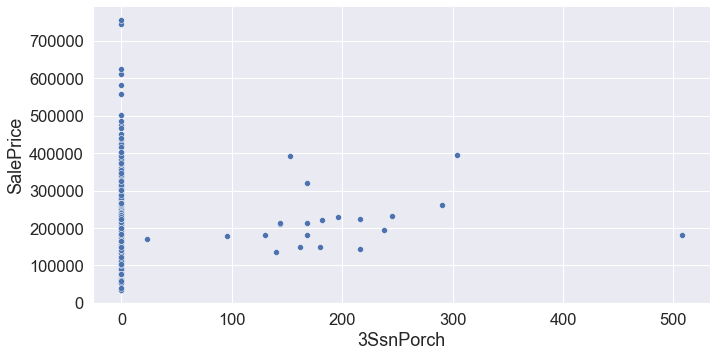

In [1107]:
sns.set(font_scale=1.5)
sns.relplot(x='3SsnPorch',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses doesnt have Three season porch area.

__ScreenPorch: Screen porch area in square feet__

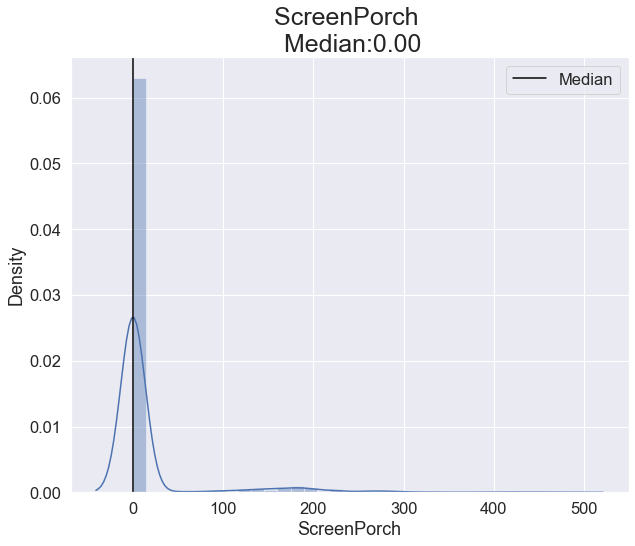

In [1108]:
plt.figure(figsize=(10,8))
sns.distplot(df['ScreenPorch'])
plt.title('ScreenPorch \n Median:{0:.2f}'.format(df['ScreenPorch'].median()),size=25)
plt.axvline(df["ScreenPorch"].median(),color='black',label='Median')
plt.legend()

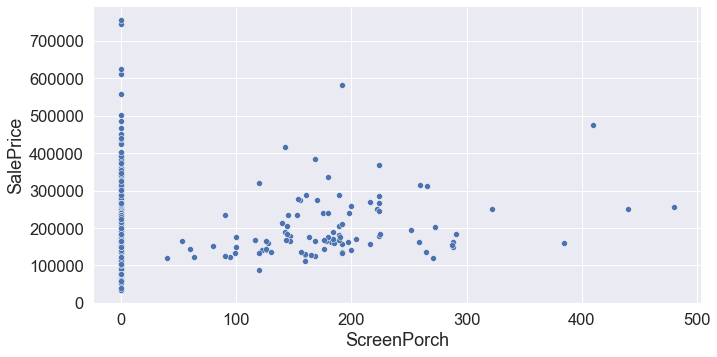

In [1109]:
sns.set(font_scale=1.5)
sns.relplot(x='ScreenPorch',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses doesnt have screen porch area

__PoolArea: Pool area in square feet__

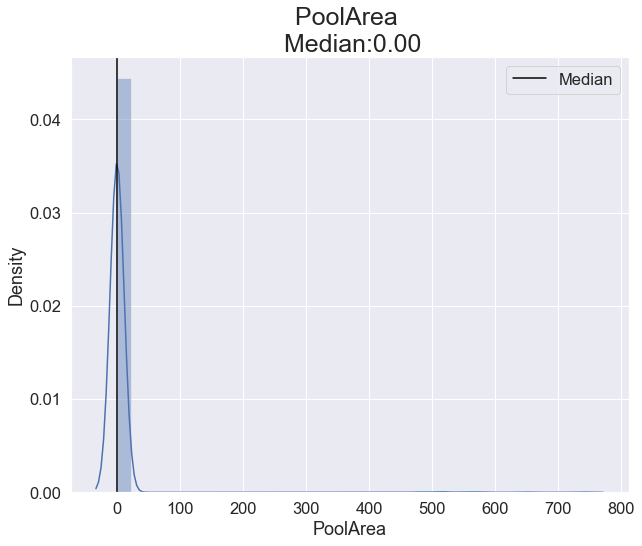

In [1110]:
plt.figure(figsize=(10,8))
sns.distplot(df['PoolArea'])
plt.title('PoolArea \n Median:{0:.2f}'.format(df['PoolArea'].median()),size=25)
plt.axvline(df["PoolArea"].median(),color='black',label='Median')
plt.legend()

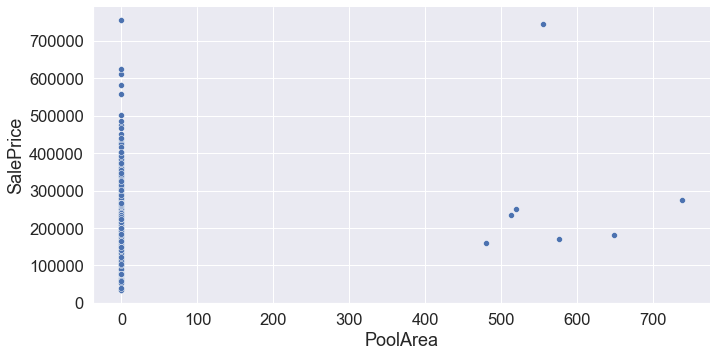

In [1111]:
sns.set(font_scale=1.5)
sns.relplot(x='PoolArea',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses doesnt have pools.

__MiscVal: $Value of miscellaneous feature__

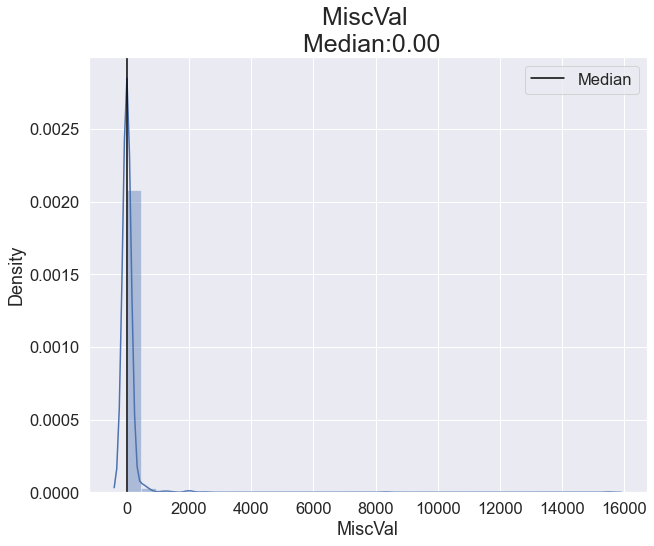

In [1112]:
plt.figure(figsize=(10,8))
sns.distplot(df['MiscVal'])
plt.title('MiscVal \n Median:{0:.2f}'.format(df['MiscVal'].median()),size=25)
plt.axvline(df["MiscVal"].median(),color='black',label='Median')
plt.legend()

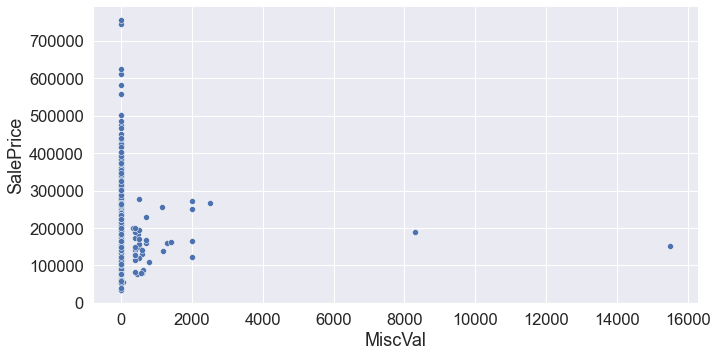

In [1113]:
sns.set(font_scale=1.5)
sns.relplot(x='MiscVal',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses dont have misceleneous features

__MoSold: Month Sold (MM)__

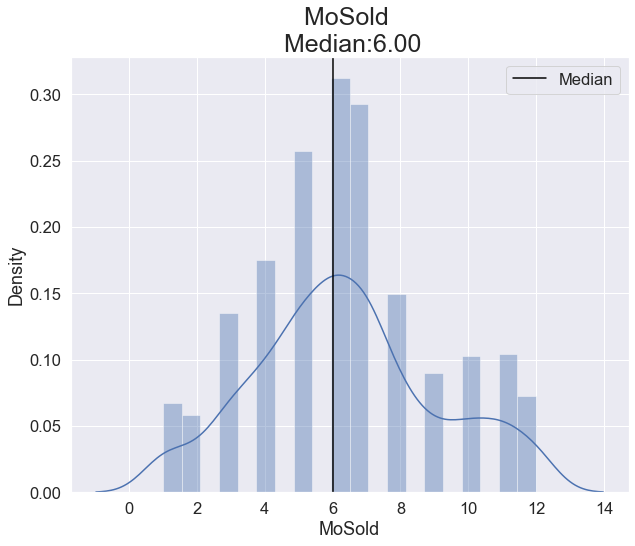

In [1114]:
plt.figure(figsize=(10,8))
sns.distplot(df['MoSold'])
plt.title('MoSold \n Median:{0:.2f}'.format(df['MoSold'].median()),size=25)
plt.axvline(df["MoSold"].median(),color='black',label='Median')
plt.legend()

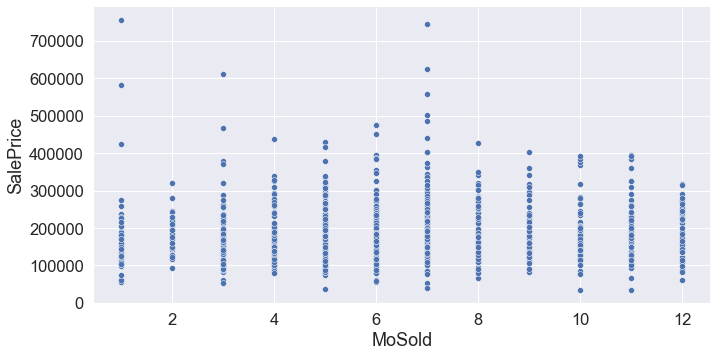

In [1115]:
sns.set(font_scale=1.5)
sns.relplot(x='MoSold',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses are sold in month of june-july with high sale prices

__YrSold: Year Sold (YYYY)__

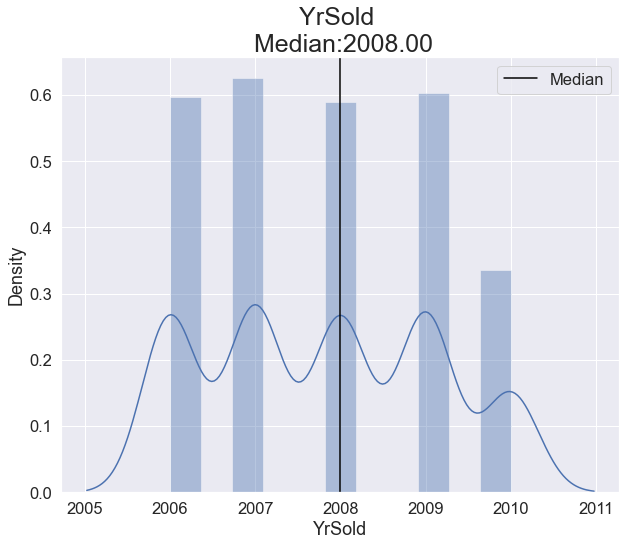

In [1116]:
plt.figure(figsize=(10,8))
sns.distplot(df['YrSold'])
plt.title('YrSold \n Median:{0:.2f}'.format(df['YrSold'].median()),size=25)
plt.axvline(df["YrSold"].median(),color='black',label='Median')
plt.legend()

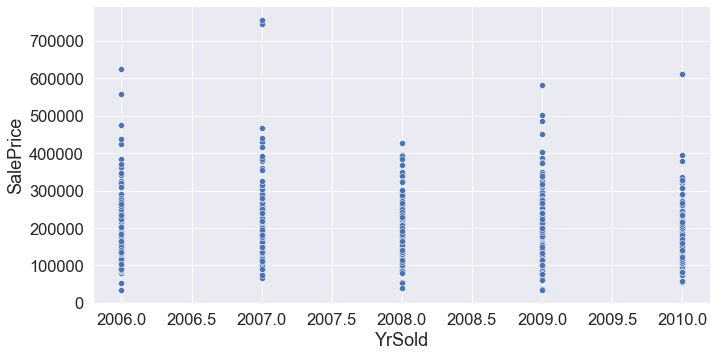

In [1117]:
sns.set(font_scale=1.5)
sns.relplot(x='YrSold',y='SalePrice',data=df,aspect=2,palette='Set1')


every year same number of houses are sold

__SaleType__

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [1118]:
df.SaleType.value_counts()


WD       966
New      103
COD       37
ConLD      7
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

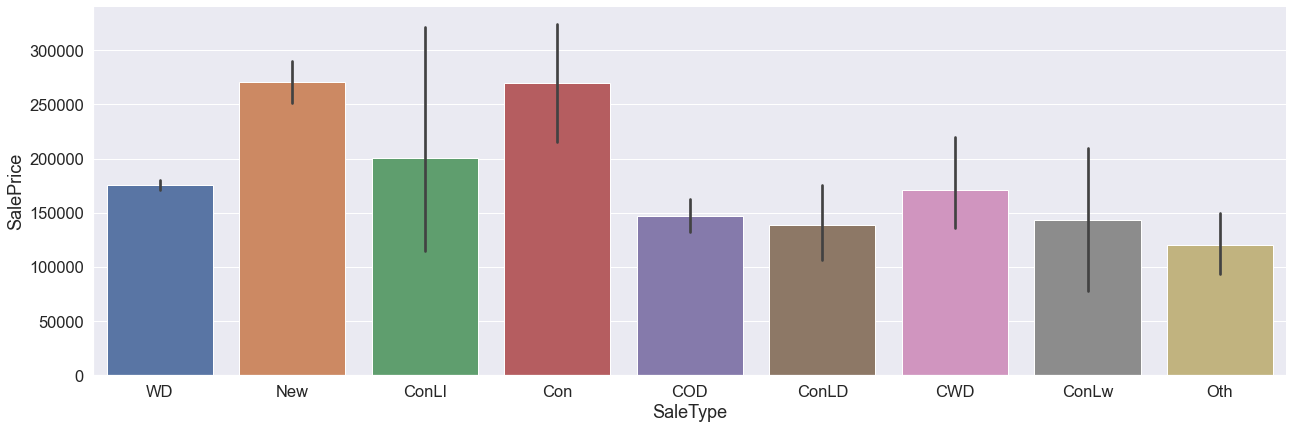

In [1119]:
sns.catplot(y='SalePrice',x='SaleType',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='SaleType', ylabel='count'>

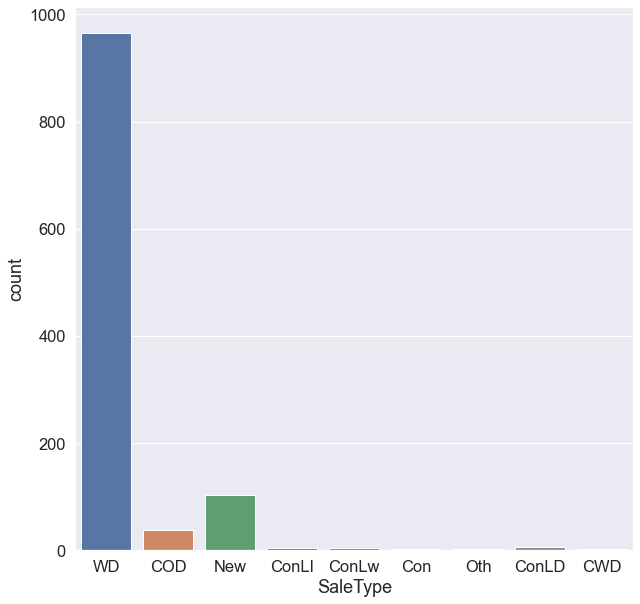

In [1120]:
plt.figure(figsize=(10,10))
sns.countplot(df.SaleType)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WD'),
  Text(1, 0, 'COD'),
  Text(2, 0, 'New'),
  Text(3, 0, 'ConLI'),
  Text(4, 0, 'ConLw'),
  Text(5, 0, 'Con'),
  Text(6, 0, 'Oth'),
  Text(7, 0, 'ConLD'),
  Text(8, 0, 'CWD')])

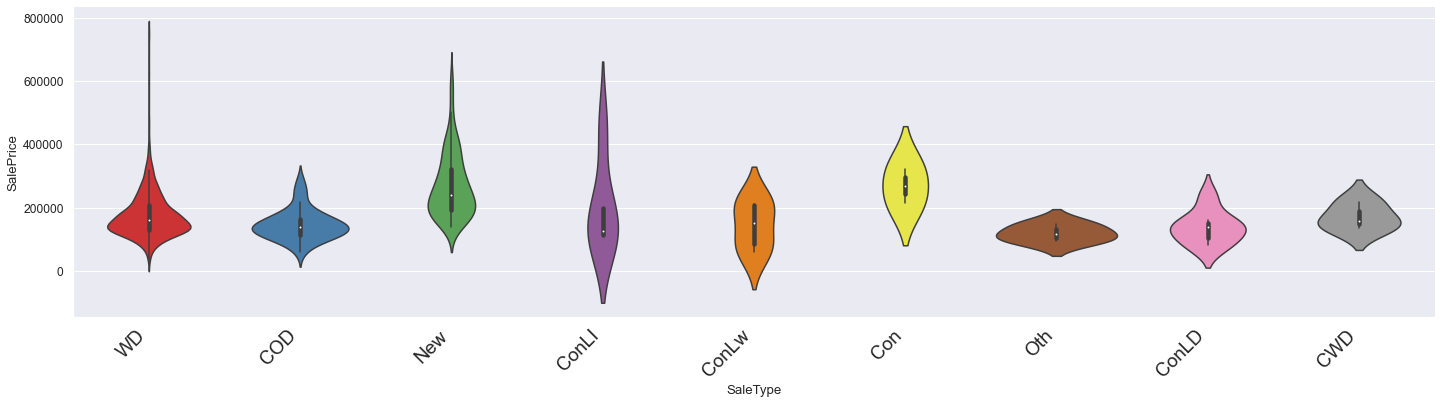

In [1121]:
sns.set(font_scale=1.1)
sns.catplot(x='SaleType',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

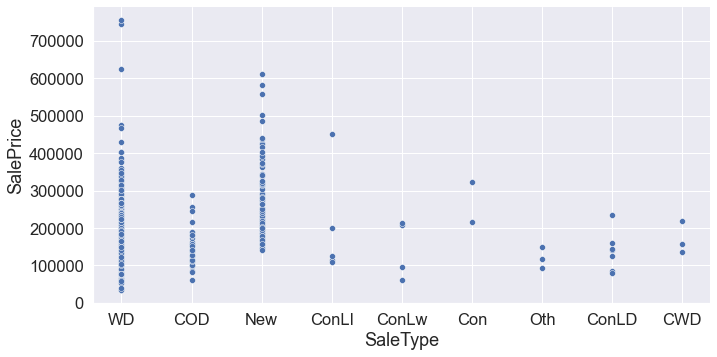

In [1122]:
sns.set(font_scale=1.5)
sns.relplot(x='SaleType',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly houses ale is with warrenty deeds only

__SaleCondition__

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [1123]:
df.SaleCondition.value_counts()


Normal     916
Partial    105
Abnorml     80
Family      18
Alloca       8
AdjLand      3
Name: SaleCondition, dtype: int64

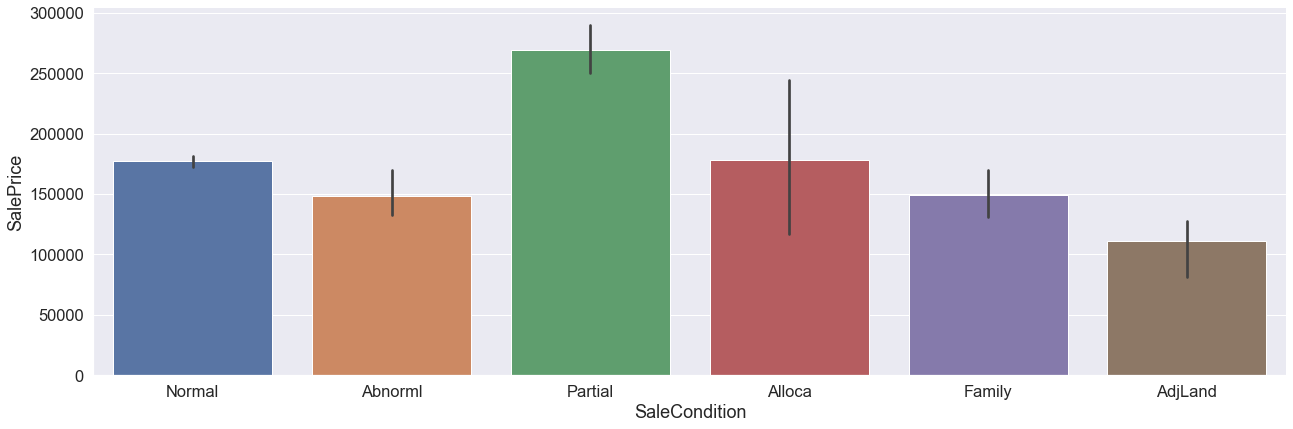

In [1124]:
sns.catplot(y='SalePrice',x='SaleCondition',data= df.sort_values('SalePrice',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

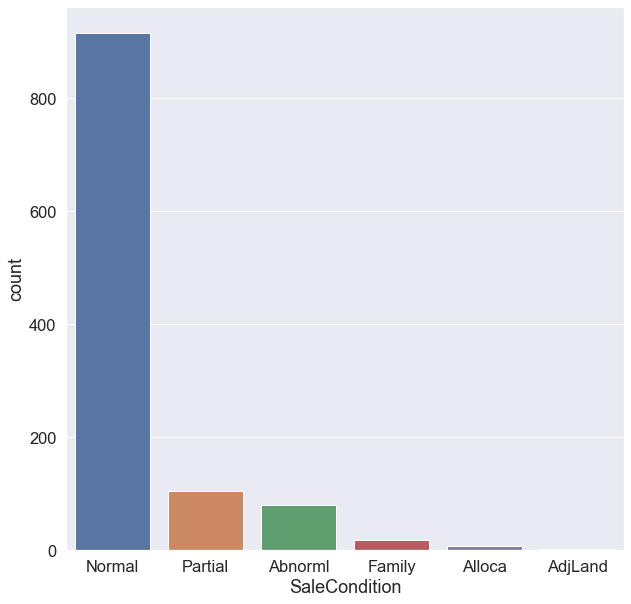

In [1125]:
plt.figure(figsize=(10,10))
sns.countplot(df.SaleCondition)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Partial'),
  Text(2, 0, 'Abnorml'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'AdjLand')])

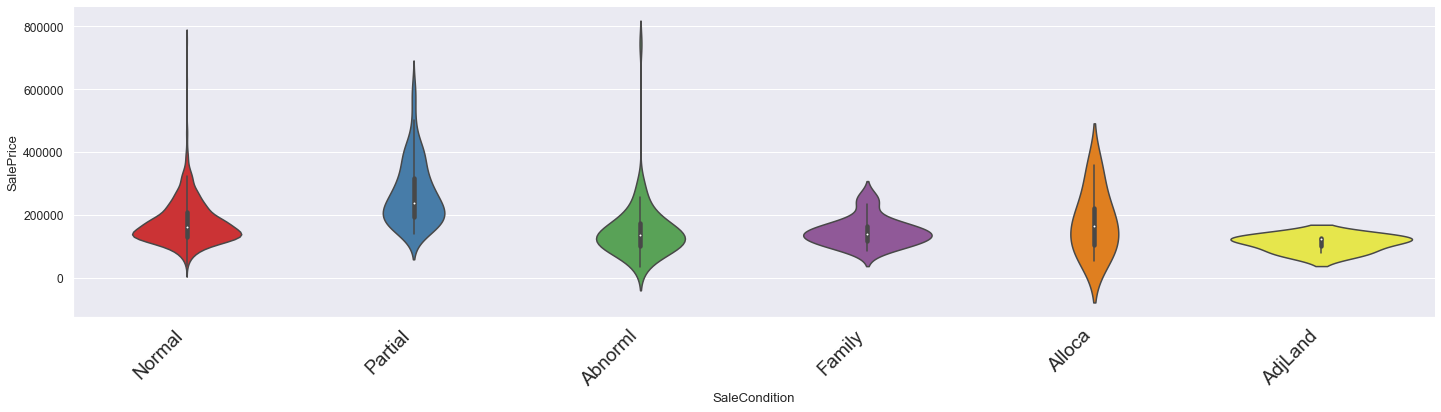

In [1126]:
sns.set(font_scale=1.1)
sns.catplot(x='SaleCondition',y='SalePrice',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

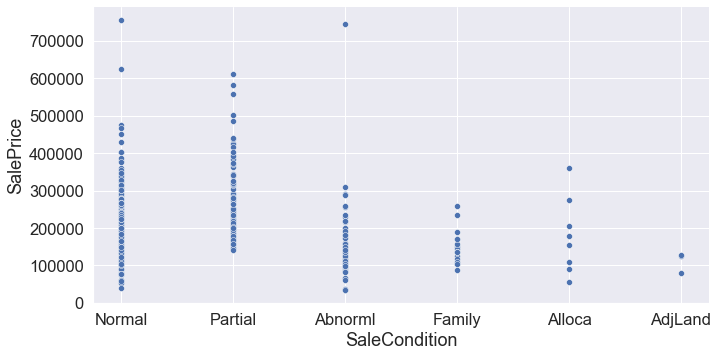

In [1127]:
sns.set(font_scale=1.5)
sns.relplot(x='SaleCondition',y='SalePrice',data=df,aspect=2,palette='Set1')


mostly sale condition is normal, having partial sale condition starts from 150000.

In [1128]:
df.shape

(1130, 75)

In [1129]:
df1.shape

(291, 74)

In [1130]:
df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [1131]:
df=pd.get_dummies(df,columns=df.columns[df.dtypes=="object"],drop_first=True)
df1=pd.get_dummies(df1,columns=df1.columns[df1.dtypes=="object"],drop_first=True)

In [1132]:
df1.shape

(291, 208)

In [1133]:
df.shape

(1130, 235)

In [1134]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         70.0     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20         70.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          1976         0.0         120           0  ...               0   
1          1970         0.0         351         823  ...               0   
2          1997         0.0         862           0  ...               0   
3          1977       480.0         705           0  ...               0   
4          2000       126.0        1246           0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            0   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 235 columns]

In [1135]:
df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 235, dtype: int64

In [1136]:
df1.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleType_New             0
SaleType_WD              0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 208, dtype: int64

In [1137]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


outlier removal will have loss of dataset so lets be with it

__X and Y spit__

In [1138]:
X = df.drop('SalePrice',1)
y = df['SalePrice']

## Train and Validation split

In [1139]:
from sklearn.model_selection import train_test_split

In [1140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [1141]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((750, 234), (750,), (322, 234), (322,))

In [1142]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Building the model

# Linear Regression with Python

Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

1. Linear Regression
2. Robust Regression
3. Ridge Regression
4. LASSO Regression
5. Elastic Net
6. Polynomial Regression
7. Stochastic Gradient Descent
8. Artificial Neaural Networks


In [1143]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparing Data For Linear Regression
Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [1144]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [1145]:
# print the intercept
print(lin_reg.intercept_)

190119.52381314244


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [1146]:
pred = lin_reg.predict(X_test)

In [1147]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5654298215795037.0
MSE: 1.9309287541672116e+33
RMSE: 4.394233441872668e+16
R2 Square -3.314273227648219e+23
Train set evaluation:
_____________________________________
MAE: 13417.914575595196
MSE: 437466009.19350743
RMSE: 20915.688111881653
R2 Square 0.9299659449536839


In [1148]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model           MAE           MSE          RMSE     R2 Square  \
0  Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16 -3.314273e+23   

   Cross Validation  
0          0.531793

## Random Sample Consensus - RANSAC

Random sample consensus (`RANSAC`) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [1149]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 8465553132291403.0
MSE: 9.440647768585423e+32
RMSE: 3.0725637126974964e+16
R2 Square -1.6204060395057984e+23
Train set evaluation:
_____________________________________
MAE: 5332891476664644.0
MSE: 7.006293238125499e+32
RMSE: 2.64694035409291e+16
R2 Square -1.1216394325449587e+23


In [1150]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE     R2 Square  \
0  Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16 -3.314273e+23   
1  Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16 -1.620406e+23   

   Cross Validation  
0          0.531793  
1          0.532925

# 3. Ridge Regression

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

In [1151]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 21627.91548382347
MSE: 1163748353.7067196
RMSE: 34113.75607737617
R2 Square 0.8002525984407258
Train set evaluation:
_____________________________________
MAE: 15795.191384070411
MSE: 629916269.2662129
RMSE: 25098.132784456553
R2 Square 0.8991565293091238


In [1152]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE     R2 Square  \
0  Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16 -3.314273e+23   
1  Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16 -1.620406e+23   
2   Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04  8.002526e-01   

   Cross Validation  
0          0.531793  
1          0.532925  
2          0.778857

# 4. LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

In [1153]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26349.369376440187
MSE: 3092313620.6137357
RMSE: 55608.57506368722
R2 Square 0.46923094794803977
Train set evaluation:
_____________________________________
MAE: 16212.931559747412
MSE: 579806600.3916348
RMSE: 24079.173581990617
R2 Square 0.9071786001319168


In [1154]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE     R2 Square  \
0  Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16 -3.314273e+23   
1  Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16 -1.620406e+23   
2   Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04  8.002526e-01   
3   Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04  4.692309e-01   

   Cross Validation  
0          0.531793  
1          0.532925  
2          0.778857  
3          0.550431

# 5. Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

In [1155]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22576.10603137892
MSE: 1350162374.5061197
RMSE: 36744.555712460584
R2 Square 0.7682562341491717
Train set evaluation:
_____________________________________
MAE: 14641.191552730044
MSE: 486102318.23398584
RMSE: 22047.728187593068
R2 Square 0.92217974471639


In [1156]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0       Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16   
1       Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16   
2        Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04   
3        Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04   
4  Elastic Net Regression  2.257611e+04  1.350162e+09  3.674456e+04   

      R2 Square  Cross Validation  
0 -3.314273e+23          0.531793  
1 -1.620406e+23          0.532925  
2  8.002526e-01          0.778857  
3  4.692309e-01          0.550431  
4  7.682562e-01          0.737108

# 6. Polynomial Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)
***
One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [1157]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 32914.05664322205
MSE: 4735609419.52736
RMSE: 68815.76432422559
R2 Square 0.1871733495155612
Train set evaluation:
_____________________________________
MAE: 4.844429592291514e-10
MSE: 4.2738797888473384e-19
RMSE: 6.537491712306286e-10
R2 Square 1.0


In [1158]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0       Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16   
1       Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16   
2        Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04   
3        Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04   
4  Elastic Net Regression  2.257611e+04  1.350162e+09  3.674456e+04   
5   Polynomail Regression  3.291406e+04  4.735609e+09  6.881576e+04   

      R2 Square  Cross Validation  
0 -3.314273e+23          0.531793  
1 -1.620406e+23          0.532925  
2  8.002526e-01          0.778857  
3  4.692309e-01          0.550431  
4  7.682562e-01          0.737108  
5  1.871733e-01          0.000000

# 7. Stochastic Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [1159]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22982.31926266606
MSE: 1517171772.5197318
RMSE: 38950.88923913974
R2 Square 0.7395905065604349
Train set evaluation:
_____________________________________
MAE: 14335.478307396384
MSE: 465669682.926806
RMSE: 21579.38096718268
R2 Square 0.9254508109838754


In [1160]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16   
1            Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16   
2             Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04   
3             Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04   
4       Elastic Net Regression  2.257611e+04  1.350162e+09  3.674456e+04   
5        Polynomail Regression  3.291406e+04  4.735609e+09  6.881576e+04   
6  Stochastic Gradient Descent  2.298232e+04  1.517172e+09  3.895089e+04   

      R2 Square  Cross Validation  
0 -3.314273e+23          0.531793  
1 -1.620406e+23          0.532925  
2  8.002526e-01          0.778857  
3  4.692309e-01          0.550431  
4  7.682562e-01          0.737108  
5  1.871733e-01          0.000000  
6  7.395905e-01          0.000000

# 8. Random Forest Regressor

In [1161]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16110.326798136646
MSE: 654194742.5022765
RMSE: 25577.23093890886
R2 Square 0.8877130957802414
Train set evaluation:
_____________________________________
MAE: 7274.464641333333
MSE: 160131841.20233497
RMSE: 12654.321048651127
R2 Square 0.97436444901832


In [1162]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16   
1            Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16   
2             Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04   
3             Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04   
4       Elastic Net Regression  2.257611e+04  1.350162e+09  3.674456e+04   
5        Polynomail Regression  3.291406e+04  4.735609e+09  6.881576e+04   
6  Stochastic Gradient Descent  2.298232e+04  1.517172e+09  3.895089e+04   
7      Random Forest Regressor  1.611033e+04  6.541947e+08  2.557723e+04   

      R2 Square  Cross Validation  
0 -3.314273e+23          0.531793  
1 -1.620406e+23          0.532925  
2  8.002526e-01          0.778857  
3  4.692309e-01          0.550431  
4  7.682562e-01          0.737108  
5  1.871733e-01          0.000000  
6  7.395905e-01          0.000000  
7  8.877131e-01          0.000000

# 9. Support Vector Machine


In [1163]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 23022.693730527375
MSE: 2006035548.9099205
RMSE: 44788.78820541945
R2 Square 0.6556812415209905
Train set evaluation:
_____________________________________
MAE: 81.20204053326226
MSE: 2256900.975644557
RMSE: 1502.2985640825716
R2 Square 0.9996386920952927


In [1164]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  5.654298e+15  1.930929e+33  4.394233e+16   
1            Robust Regression  8.465553e+15  9.440648e+32  3.072564e+16   
2             Ridge Regression  2.162792e+04  1.163748e+09  3.411376e+04   
3             Lasso Regression  2.634937e+04  3.092314e+09  5.560858e+04   
4       Elastic Net Regression  2.257611e+04  1.350162e+09  3.674456e+04   
5        Polynomail Regression  3.291406e+04  4.735609e+09  6.881576e+04   
6  Stochastic Gradient Descent  2.298232e+04  1.517172e+09  3.895089e+04   
7      Random Forest Regressor  1.611033e+04  6.541947e+08  2.557723e+04   
8                SVM Regressor  2.302269e+04  2.006036e+09  4.478879e+04   

      R2 Square  Cross Validation  
0 -3.314273e+23          0.531793  
1 -1.620406e+23          0.532925  
2  8.002526e-01          0.778857  
3  4.692309e-01          0.550431  
4  7.682562e-01          0.737108  
5  1.871733e-01          0.000000  
6  7.395905e-01          0.000000  
7  8.877131e-01          0.000000  
8  6.556812e-01          0.000000

In [1165]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [1166]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [1167]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds)) 

In [1168]:
train_n_ret_scores(LinearRegression())

MSE: 8.1110005272919705e+31
R2_Score -1.3921835199268294e+22


In [1169]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [1170]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [1171]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(X_train,y_train)
    pr=model.predict(X_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression()
R2_score =  -1.3921835199268294e+22
Mean_Squared_Error = 8.1110005272919705e+31
Mean_Absolute_Error = 1191780413382959.8
Root_Mean_Squared_Error = 9006109330500030.0
Cross_Val_Score =  0.5317928762306022


------------------------------------- Lasso -------------------------------
Lasso()
R2_score =  0.5898417231548239
Mean_Squared_Error = 2389623172.62543
Mean_Absolute_Error = 23908.407670496315
Root_Mean_Squared_Error = 48883.77207852755
Cross_Val_Score =  0.550431380236005


------------------------------------- Ridge -------------------------------
Ridge()
R2_score =  0.6610221608325548
Mean_Squared_Error = 1974918818.441369
Mean_Absolute_Error = 23036.893044234803
Root_Mean_Squared_Error = 44440.05871329795
Cross_Val_Score =  0.7788566429030499


------------------------------------- DecisionTreeRegressor -------------------------------
DecisionTreeRegressor(random_state=97)
R

In [1172]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

Model      R2_score  Mean_Squared_Error  \
0           LinearRegression -1.392184e+22        8.111001e+31   
1                      Lasso  5.898417e-01        2.389623e+09   
2                      Ridge  6.610222e-01        1.974919e+09   
3      DecisionTreeRegressor  7.577813e-01        1.411190e+09   
4          AdaBoostRegressor  8.268037e-01        1.009059e+09   
5      RandomForestRegressor  8.770132e-01        7.165334e+08   
6  GradientBoostingRegressor  8.920246e-01        6.290754e+08   

   Mean_Absolute_Error  Root_Mean_Squared_Error  Cross_val_score  
0         1.191780e+15             9.006109e+15         0.531793  
1         2.390841e+04             4.888377e+04         0.550431  
2         2.303689e+04             4.444006e+04         0.778857  
3         2.556679e+04             3.756581e+04         0.616174  
4         2.274051e+04             3.176569e+04         0.744586  
5         1.652584e+04             2.676814e+04         0.819199  
6         1.576952e+04             2.508138e+04         0.853080

In [1173]:
from sklearn.model_selection import RandomizedSearchCV


In [1174]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1300,num=13)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_spli=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [1175]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_spli,
               'min_samples_leaf': min_samples_leaf}

In [1176]:
rf_rand = RandomizedSearchCV(estimator=GBR,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5
                            ,verbose=2,random_state=42,n_jobs=1)

In [1177]:
rf_rand.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=  16.9s
[CV] n_estimators=800, min_samples_split=100, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.3min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=97),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [1178]:
rf_rand.best_params_


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [1179]:
prediction = rf_rand.predict(X_test)


In [1180]:
from sklearn import metrics


metrics.r2_score(y_test,prediction)

0.8876269966535818

In [1181]:
print(cross_val_score(GBR,X,y,cv=10).mean())


0.8530801858328034


In [1182]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 15452.582876741406
MSE: 654696364.6316432
RMSE: 25587.035088724977


In [1183]:
best_model = GradientBoostingRegressor(random_state=97)

In [1184]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=97)

In [1185]:
best_model.score(X_test,y_test)

0.8920246067710987

##  saving model

In [1186]:
import joblib
joblib.dump(best_model,'Sale_price.pkl')

['Sale_price.pkl']

# Summary
In this notebook I discovered that Gradient boosting regression algorithm for machine learning.

You covered a lot of ground including:

- The common linear regression models (Ridge, Lasso, ElasticNet, ...).
- The representation used by the model.
- Learning algorithms used to estimate the coefficients in the model.
- Rules of thumb to consider when preparing data for use with regression.
- How to evaluate a regression model.
